___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
#Importing the important libraries
#Importing numpy
import numpy as np
#Importing pandas
import pandas as pd
#Importing matplotlib for graphing
import matplotlib.pyplot as plt
#Importing seaborn for advanced graphs
import seaborn as sns
#Importing missingno for missing values
import missingno as msno

#Importing train test split to split the data to train and test
from sklearn.model_selection import train_test_split
#Importing a scaler to scale the data
from sklearn.preprocessing import MinMaxScaler

#Importing make_column_transformer to transform the data
from sklearn.compose import make_column_transformer

#Importing OneHotEncoder to transform the obj values 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#Importing tensorflow
import tensorflow as tf
#Importing sequential to build the model
from tensorflow.keras.models import Sequential
#Importing Dense and activation to use it to add the layers in the model
from tensorflow.keras.layers import Dense, Activation
#Importing the metrics to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
#Importing the graphs that we use it to see the graphs of the metrics
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

#Importing the class_weight to use it to find the class_weight
from sklearn.utils.class_weight import compute_class_weight
#Importing Dropout to use it for droping values
from tensorflow.keras.layers import Dropout

#Importing EarlyStopping from tensorflow
from tensorflow.keras.callbacks import EarlyStopping
#Importing Adam from tensorflow to use at optimizer
from tensorflow.keras.optimizers import Adam

#Importing the optimizers from tensorflow
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
#Importing the optuna to find the best values of the params
import optuna

#importing the pipeline from sklearn
from sklearn.pipeline import Pipeline


plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

pd.set_option('display.max_rows', None)

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
#Reading the data from a csv file
df = pd.read_csv('1-Churn_Modelling.csv')

#Printing the head of the data
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [3]:
#Seeing the columns of the data
df.columns 
#As we can see there are 14 columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
#Seeing the shape of the data
df.shape

#The shape of the data is 10000 rows and 14 columns

(10000, 14)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
#First let's see the head of the data
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [6]:
#To see the information of the data 
df.info()
#We can see that there are 10000 entries from 0 to 9999.
#Also, we have 2 float, 9 int, and 3 objects
#In all the columns, there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Checking if there is any null data
df.isnull().sum()
#As we can see there is no null data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#Checking the duplicated data
df.duplicated().sum()
#As we can see, there is no duplicated data

0

In [9]:
#Let's see the describtion of the data
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

### Checking for missing values

<Axes: >

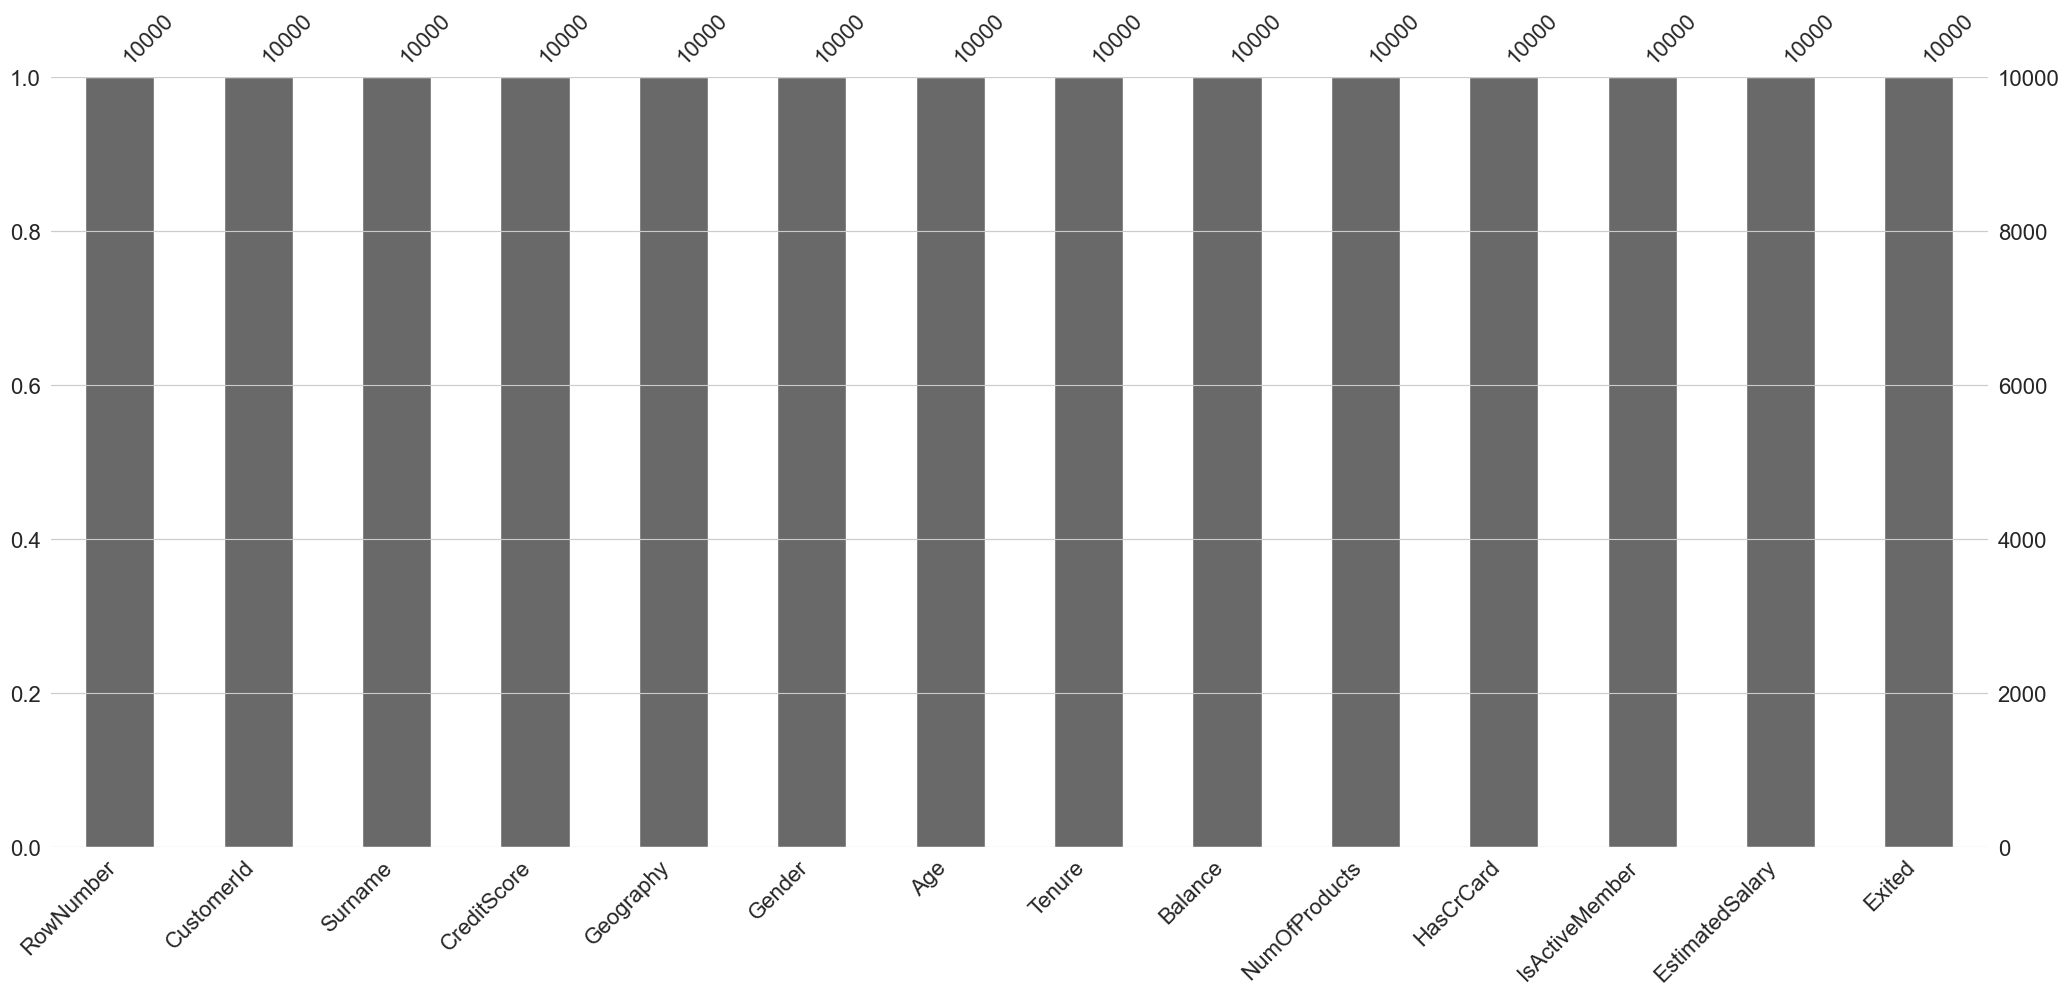

In [10]:
msno.bar(df)
#From the graph, we can see that there is no missing values

In [11]:
#The columns before deleting 
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
#The shape of the data before deleting
df.shape

(10000, 14)

### RowNumber, CustomerId, Surname

In [13]:
#First, let's see what is RowNumber: Row Numbers from 1 to 10000.
#So, this is not an important column, so I am going to drop it from the data

#CustomerId, A unique ID that identifies each customer. This is also,
#Not an important column and the model will not learn anything from the id.

#Also, I think surname which is the customer’s surname, is not an important thing as well.
#This is because the names do not make any difference. For example, if you are David, so you will
#open an account in the bank, but if you are June, you will not. Doesn't make sense, right.
#So, i will drop it as well.

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [14]:
#The shape of the data after deleting
df.shape

(10000, 11)

In [15]:
#The columns of the data after deleting
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### CreditScore

In [16]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
648     48
660     48
682     47
663     47
640     47
637     46
714     45
686     45
710     45
645     45
633     45
687     45
679     45
706     44
627     44
646     44
619     44
584     43
625     43
628     43
608     43
613     42
635     42
632     42
701     41
554     41
712     41
698     41
601     40
699     40
597     40
634     40
606     40
680     40
644     39
711     39
681     39
656     39
592     38
593     38
659     38
718     38
611     38
630     38
666     38
696     38
641     38
581     38
605     37
675     37
695     37
624     37
629     37
614     37
579     37
653     37
662     37
616     37
639     37
650     37
642     37
724     37
607     36
649     36
622     36
676     36
727     36
636     36
709     36
590     36
707     36
697     36
669     36
661     35
673     35
668     35
685     35
677     35
615     35
704     3

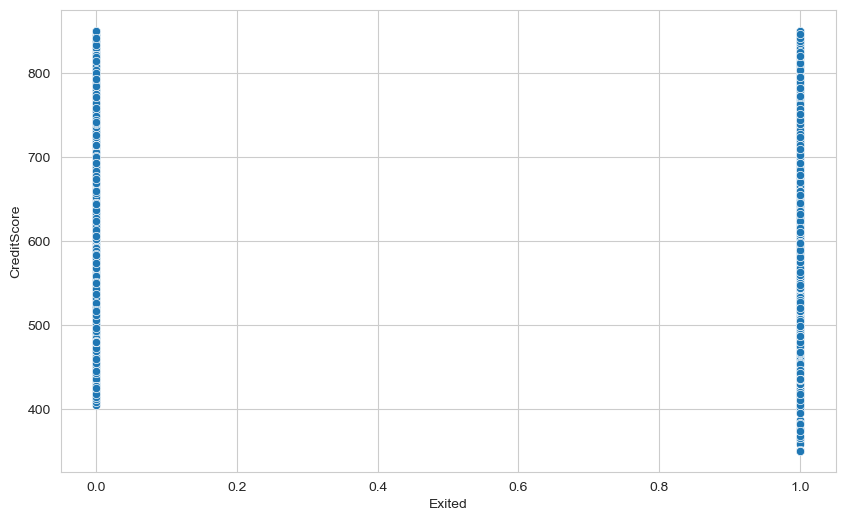

In [17]:
#Seeing the scatterplot of CreditScore with our target
sns.scatterplot(x='Exited', y='CreditScore', data=df)
plt.show()

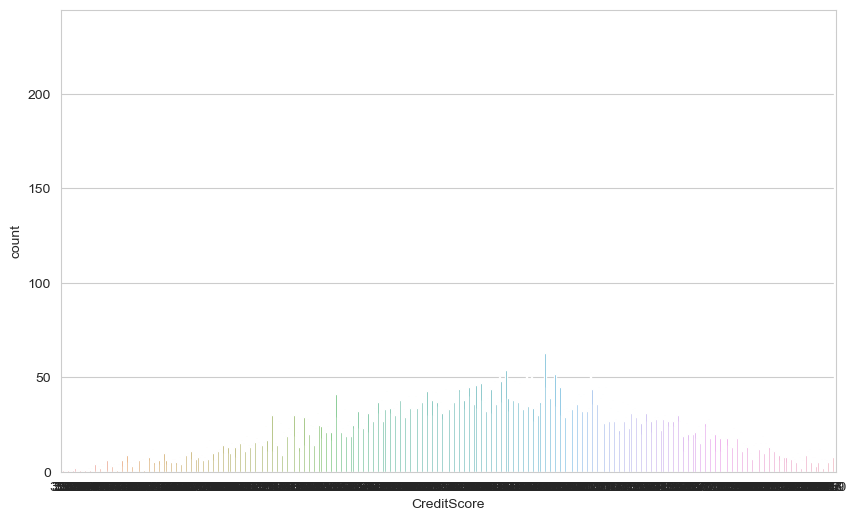

In [18]:
#Seeing the countplot of CreditScore
sns.countplot(x=df["CreditScore"])
plt.show()

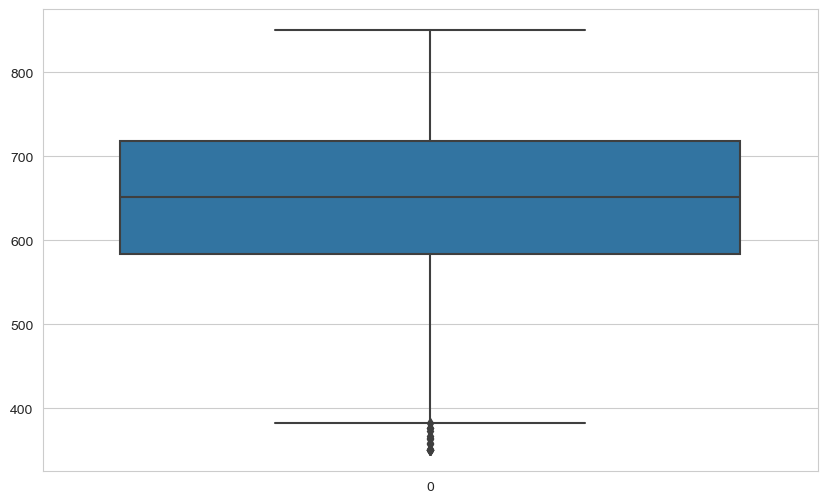

In [19]:
sns.boxplot(df['CreditScore'])
plt.show()

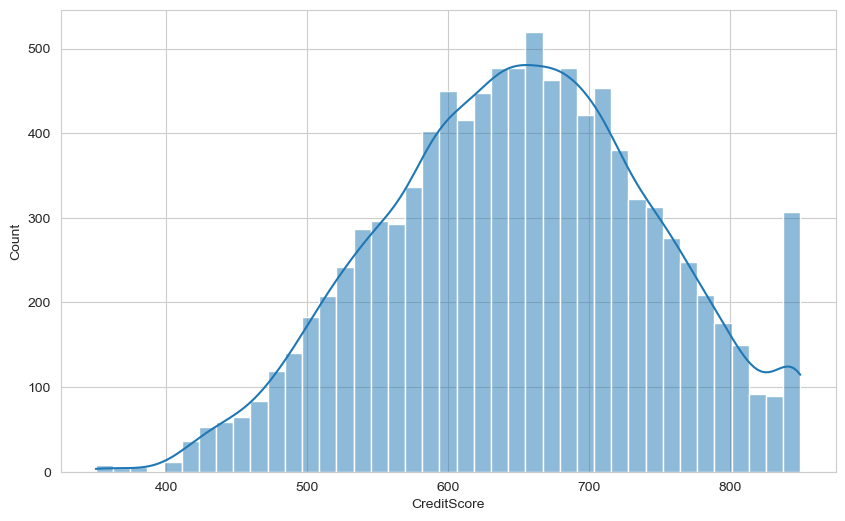

In [20]:
#Seeing the histplot of CreditScore with the target
sns.histplot(df["CreditScore"], kde=True)
plt.show()

### Geography

In [21]:
#Seeing the value counts of Geography
df['Geography'].value_counts()
#As we can see, there are three different regions here, but france has the highest number.

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

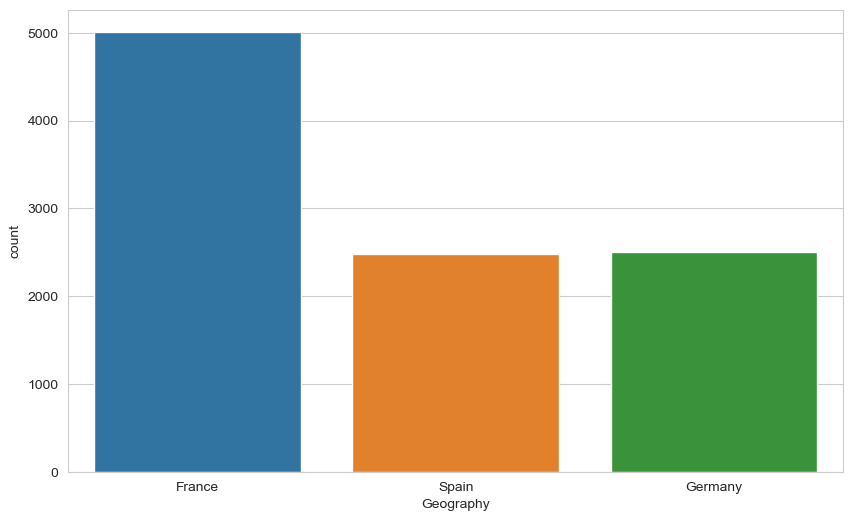

In [22]:
#Seeing the countplot of Geography
sns.countplot(x=df['Geography'])
plt.show()
#From the graph, we can see that the values of spain and Germany are nearly the same, but France is much higher

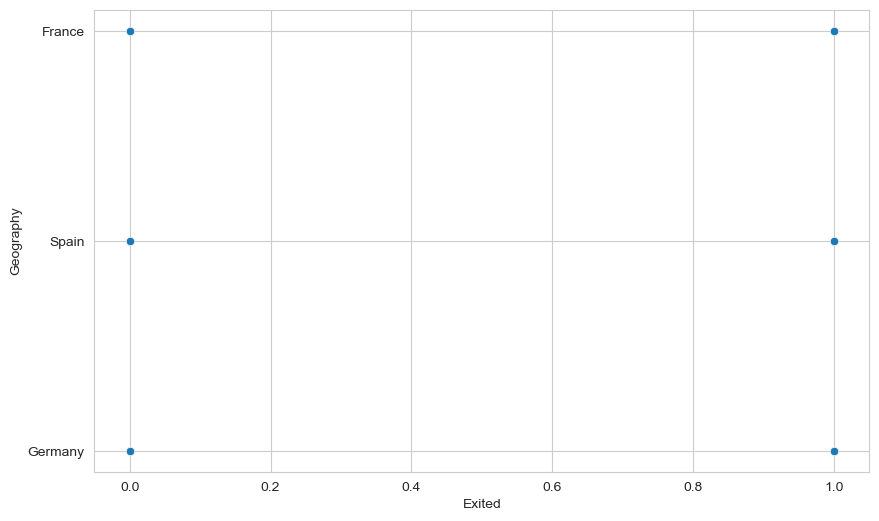

In [23]:
#Seeing the scatterplot of Geography with the target
sns.scatterplot(x='Exited', y='Geography', data=df)
plt.show()
#from the graph, we cannot get anythin from this graph, because our target is a binary.

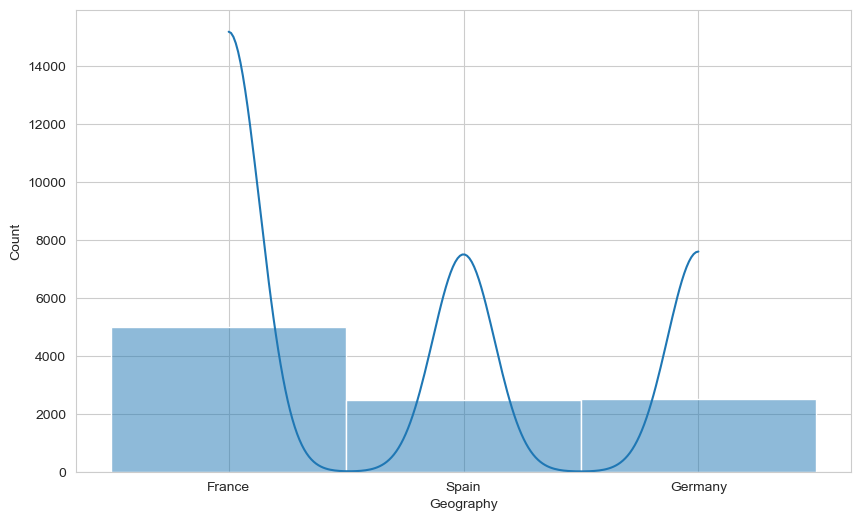

In [24]:
#Seeing the histplot of Geography
sns.histplot(df["Geography"], kde=True)
plt.show()

### Gender

In [25]:
df['Gender'].value_counts()
#As we can see, there are 5457 values in the Male, and 4543 in the Female

Gender
Male      5457
Female    4543
Name: count, dtype: int64

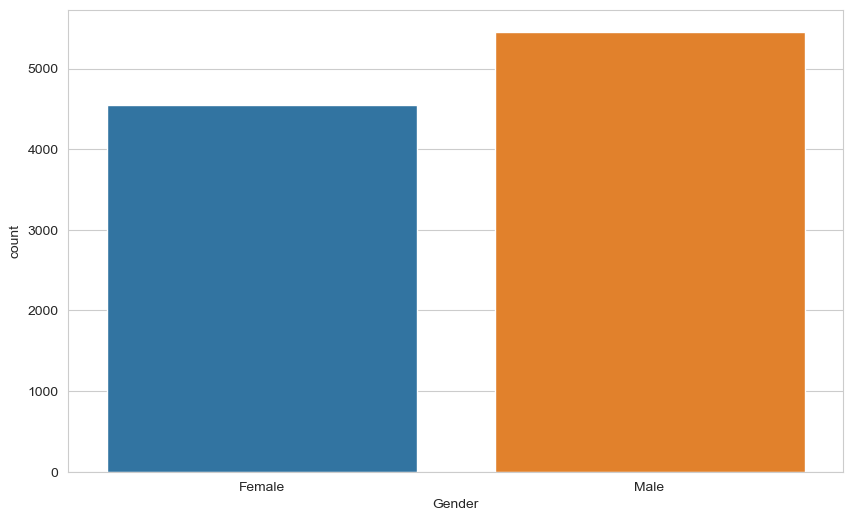

In [26]:
#Seeing the countplot of Gender
sns.countplot(x=df['Gender'])
plt.show()
#From the graph, we can say that there are more men.

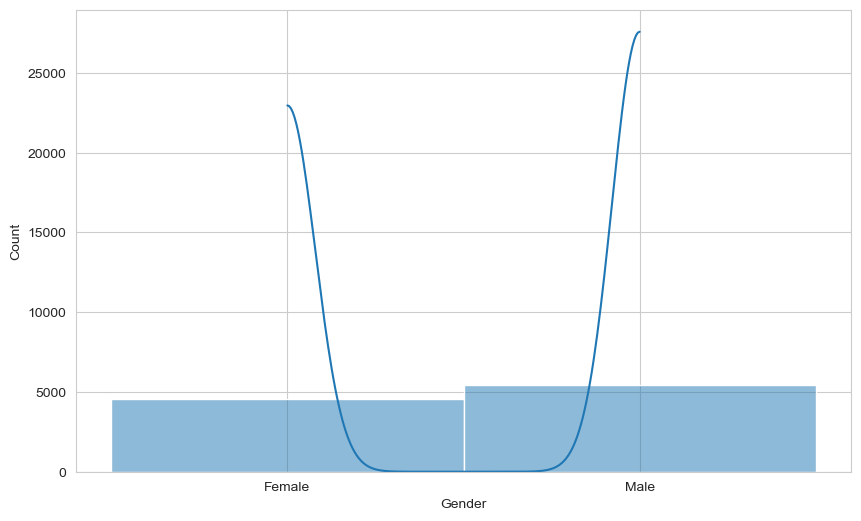

In [27]:
#Seeing the histplot of Gender
sns.histplot(df["Gender"], kde=True)
plt.show()

### Age

In [28]:
#Seeing the value counts of the age
df['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
22     84
54     84
55     82
57     75
53     74
56     70
58     67
60     62
59     62
61     53
21     53
62     52
63     40
20     40
64     37
67     37
66     35
71     27
19     27
18     22
69     22
72     21
68     19
74     18
65     18
70     18
73     13
76     11
77     10
75      9
78      5
79      4
81      4
80      3
84      2
92      2
82      1
88      1
85      1
83      1
Name: count, dtype: int64

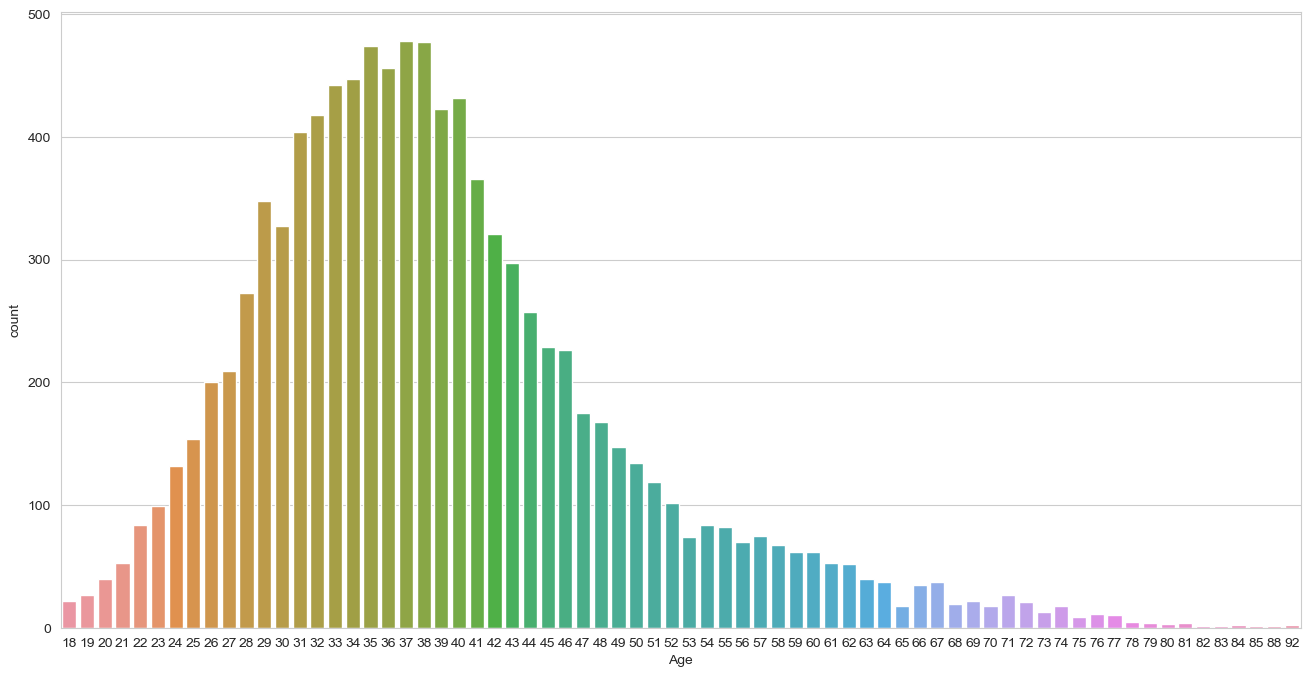

In [29]:
#Seeing the countplot of Age
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Age'])
plt.show()
#From the graph, we can say that most values are in the middle, and in the end, nearly from 70, the values are so small

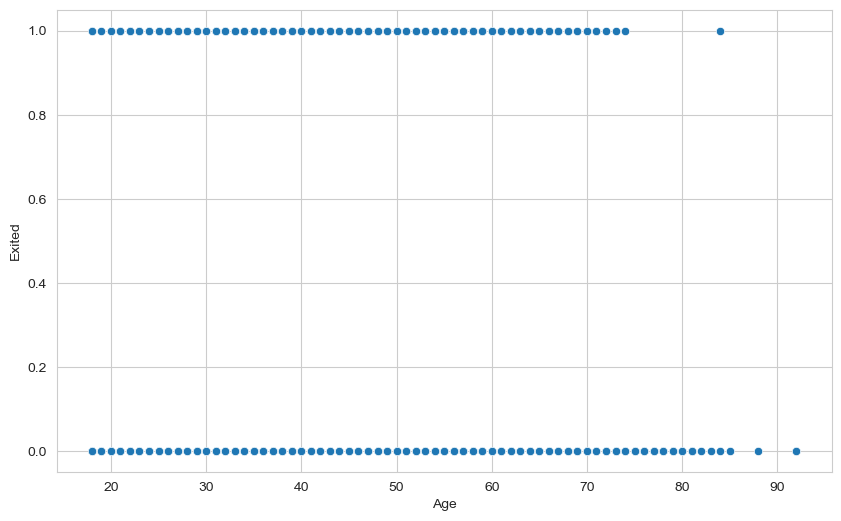

In [30]:
#Seeing the scatterplot of Age with the target
sns.scatterplot(x='Age', y='Exited', data=df)
plt.show()

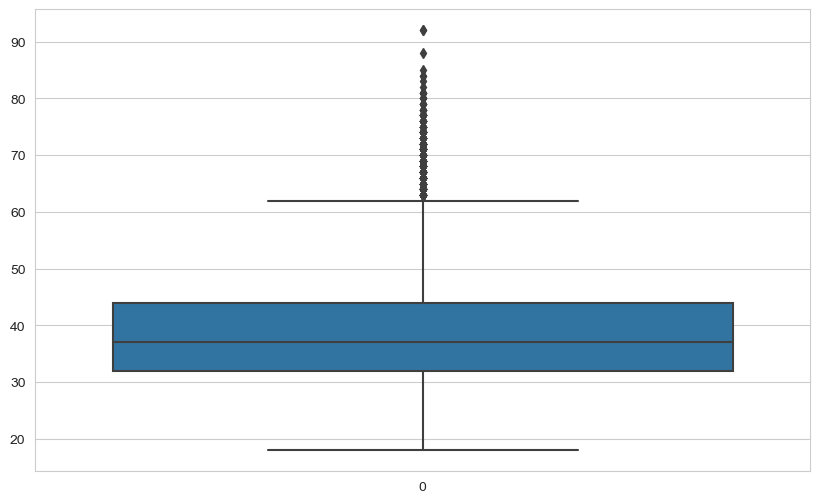

In [31]:
sns.boxplot(df['Age'])
plt.show()

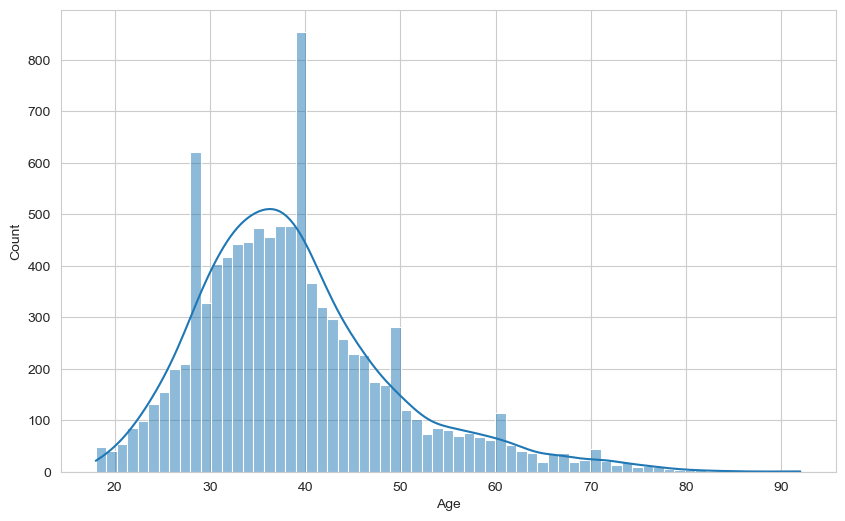

In [32]:
#Seeing the histplot of Age
sns.histplot(df["Age"], kde=True)
plt.show()
#From this graph also, we can see that the values at the end are so small

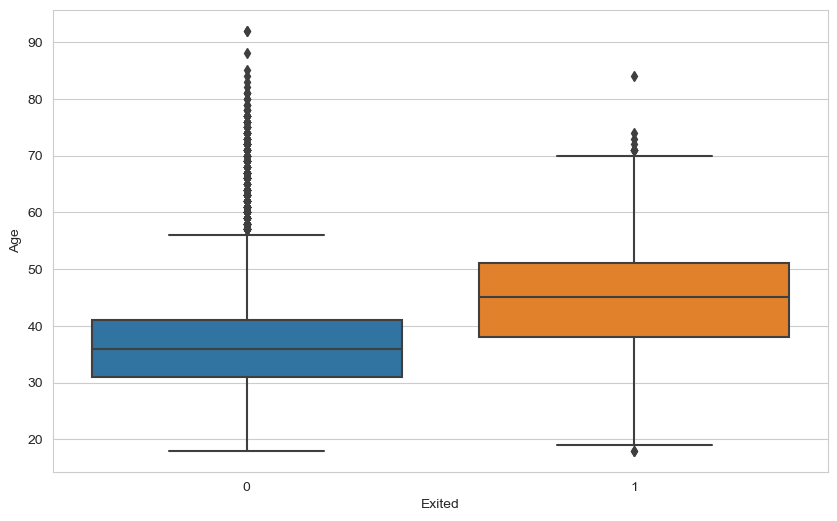

In [33]:
#Seeing the boxplot of the Age with the target
sns.boxplot(x='Exited', y='Age', data=df)
plt.show()
#From the graph, we can see that there are some outliers

### Tenure
#### The number of years for which the customer has been with the bank

In [34]:
#Seeing the value counts of Tenure
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

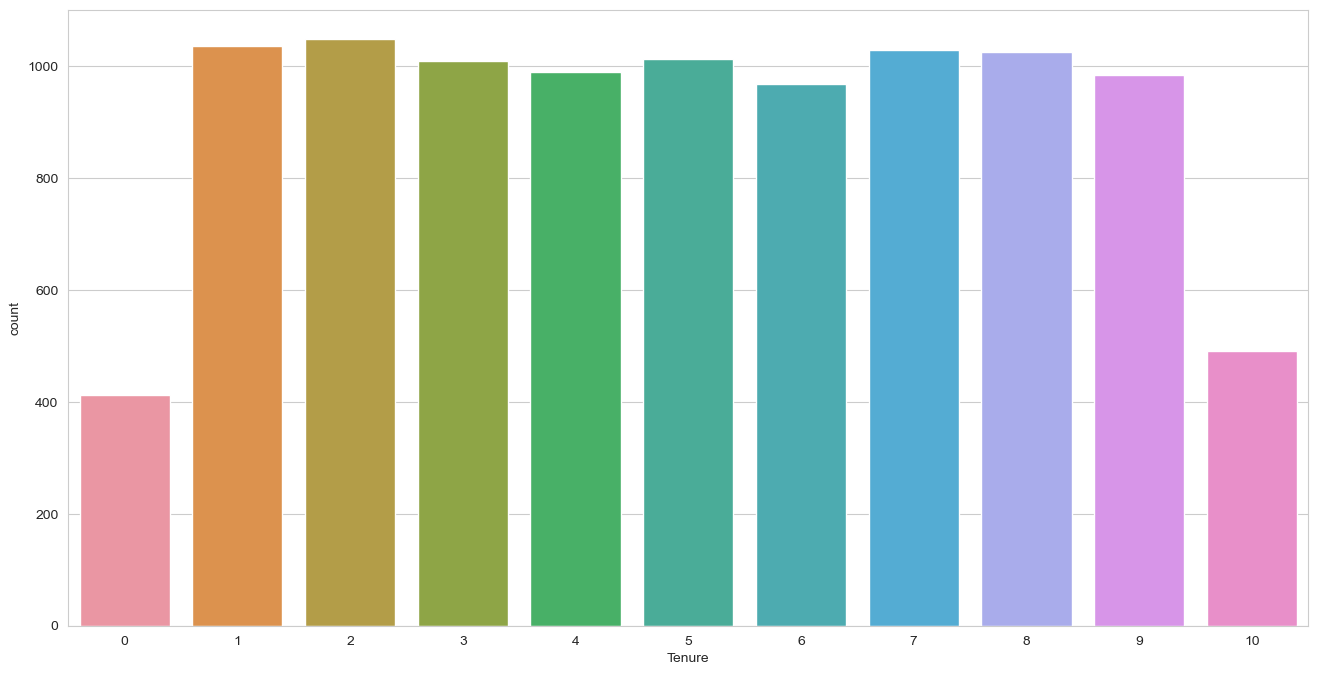

In [35]:
#Seeing the countplot of Tenure
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Tenure'])
plt.show()
#From the graph, we can see that the value of 10 and 0 are the smallest ones

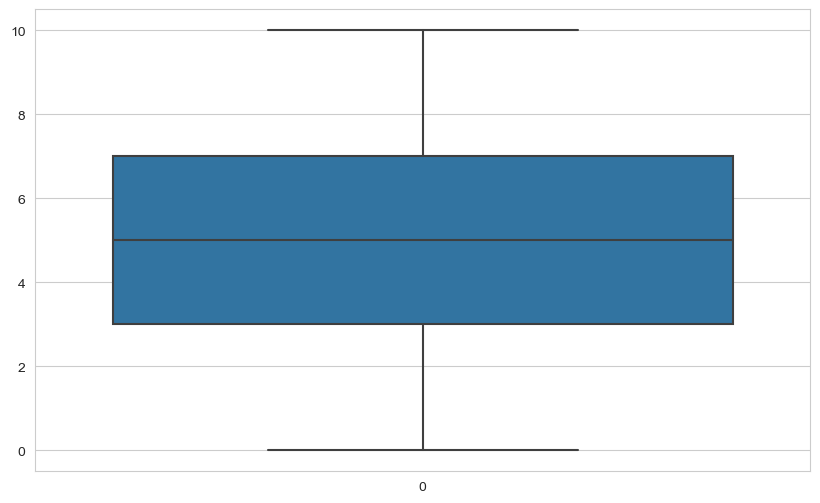

In [36]:
sns.boxplot(df['Tenure'])
plt.show()

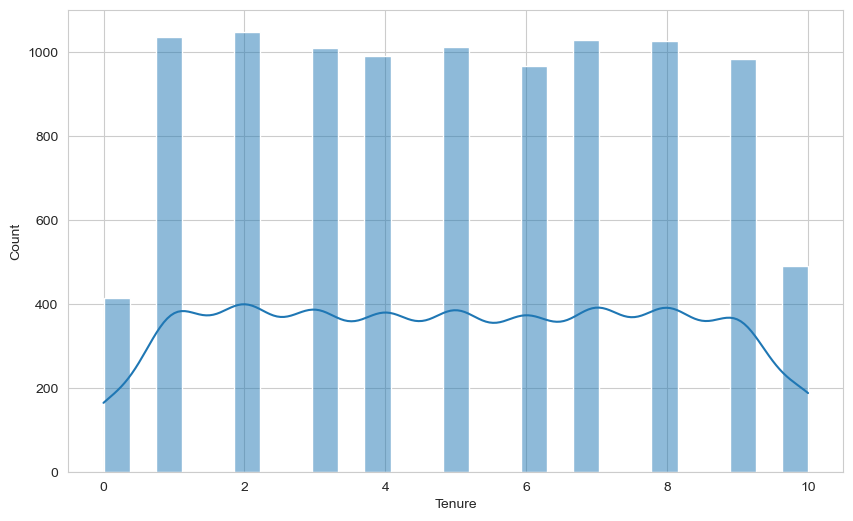

In [37]:
#Seeing the histplot of Tenure
sns.histplot(df["Tenure"], kde=True)
plt.show()

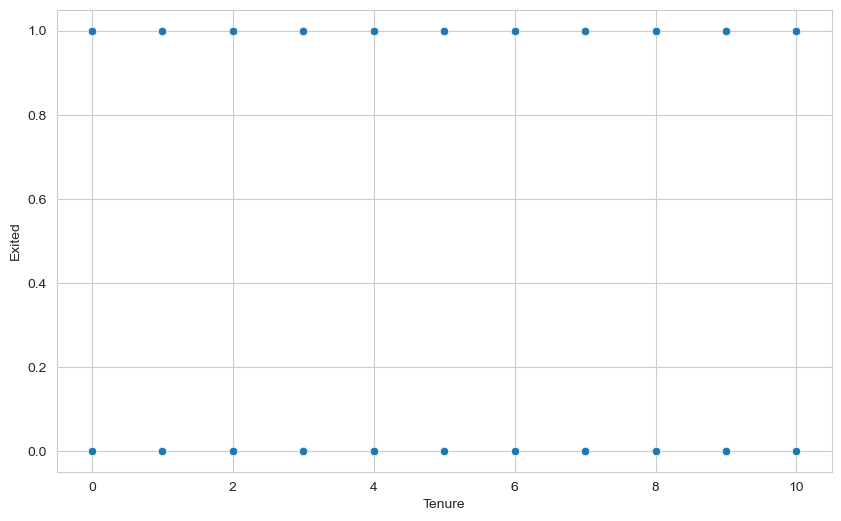

In [38]:
#Seeing the scatterplot of Tenure with the target
sns.scatterplot(x='Tenure', y='Exited', data=df)
plt.show()
#For scatterplot, we cannot see the data clearly because it is 0 and 1 only(the target I mean)

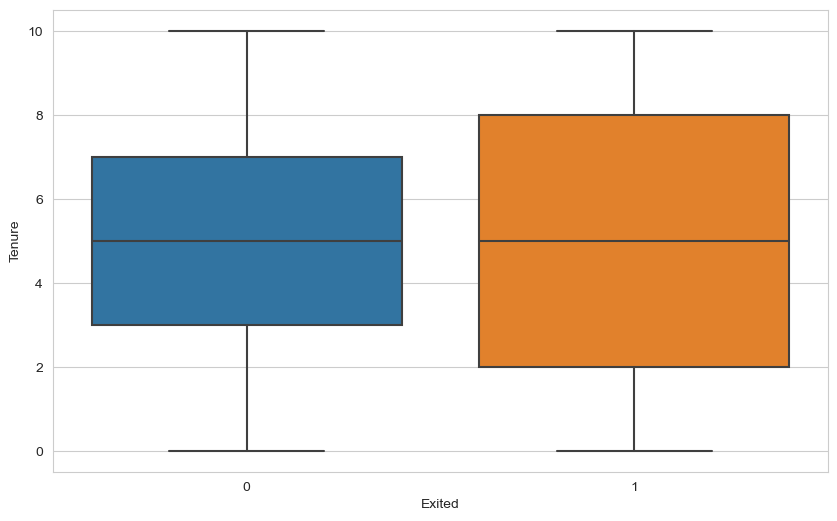

In [39]:
#Seeing the boxplot of the Tenure with the target
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.show()

### Balance
#### Bank balance of the customer.

In [40]:
#Seeing the value counts of Balance
df['Balance'].value_counts()
#From the value counts of Balance, i can say that it may seems an important column, but i do not 
# think there is a pattern in it, as each one has a diffent number, and this may not help the model
#to learn from it, as all of them are just 1 value for each. 

Balance
0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
144238.700       1
112262.840       1
109106.800       1
142147.320       1
109109.330       1
146587.300       1
79896.000        1
132371.300       1
85859.760        1
69365.250        1
197715.930       1
95502.210        1
79857.640        1
142643.540       1
120923.520       1
126872.600       1
124213.360       1
138497.840       1
141952.070       1
125385.010       1
155271.830       1
172381.800       1
197200.040       1
127120.620       1
105103.330       1
98848.190        1
157274.360       1
104339.110       1
142946.180       1
109908.060       1
135847.470       1
108935.390       1
150300.650       1
131762.940       1
114453.580       1
128940.240       1
138106.750       1
143656.550       1
127406.500       1
107511.520       1
154377.300       1
125903.220       1
163085.790       1
144837.790       1
106116.560       1
123760.680       1
152160.210       1
1460

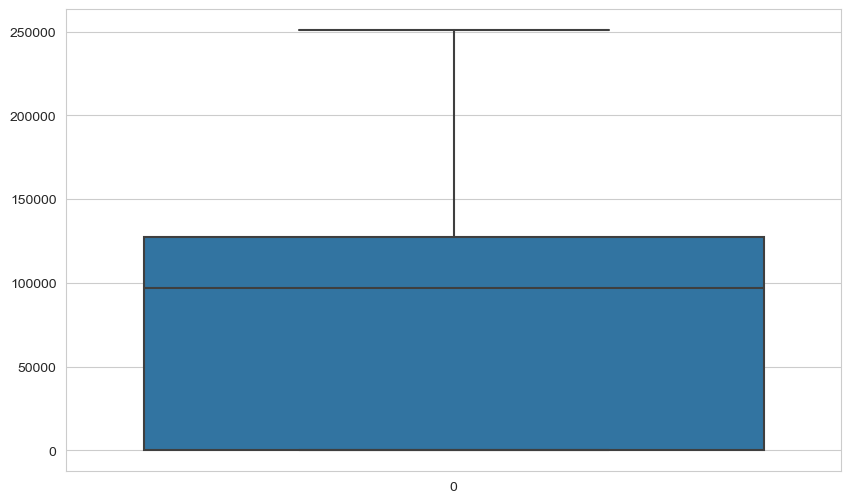

In [41]:
sns.boxplot(df['Balance'])
plt.show()

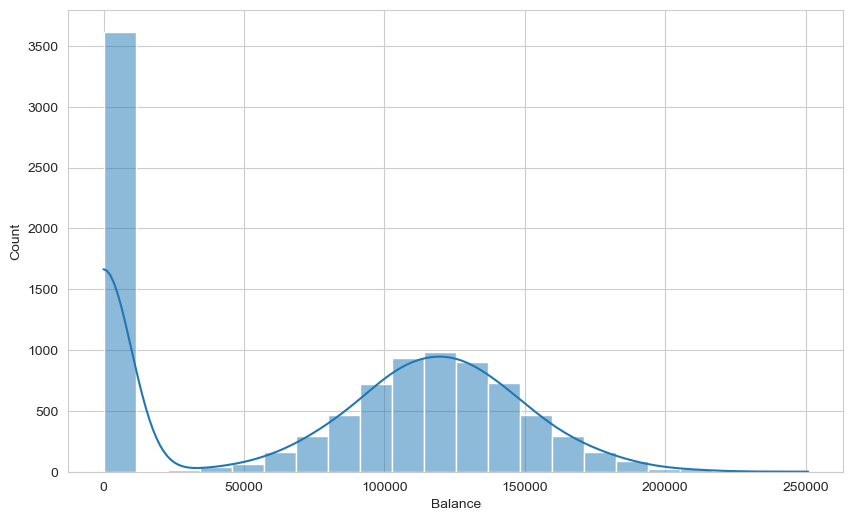

In [42]:
#Seeing the histplot of Balance
sns.histplot(df["Balance"], kde=True)
plt.show()

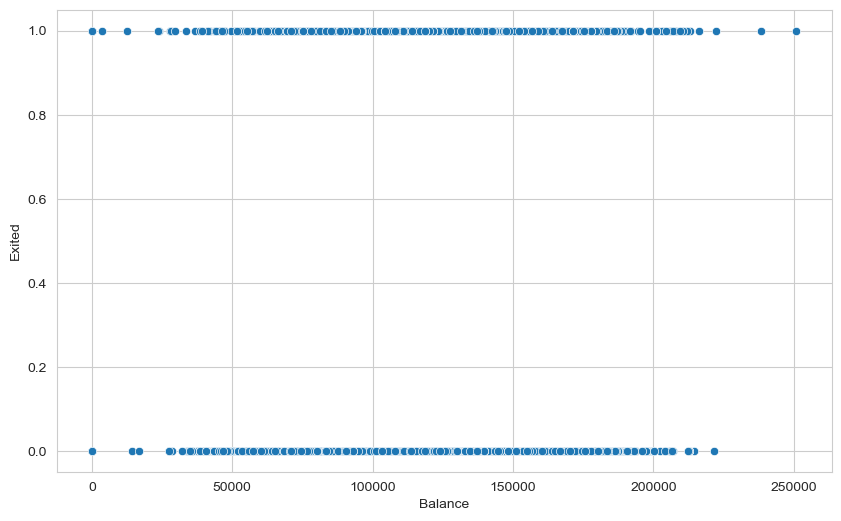

In [43]:
#Seeing the scatterplot of Balance with the target
sns.scatterplot(x='Balance', y='Exited', data=df)
plt.show()

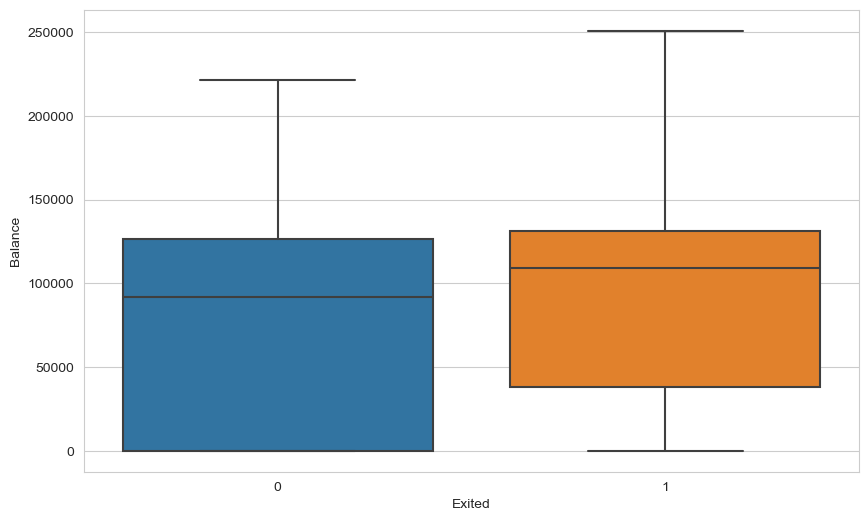

In [44]:
#Seeing the boxplot of the Balance with the target
sns.boxplot(x='Exited', y='Balance', data=df)
plt.show()

### NumOfProducts
#### The number of bank products the customer is utilising.

In [45]:
#Seeing the value counts of NumOfProducts
df['NumOfProducts'].value_counts()
#From the data, we can see that there are 4 types, but 3 and 4 have an insignificant values compared with the others

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

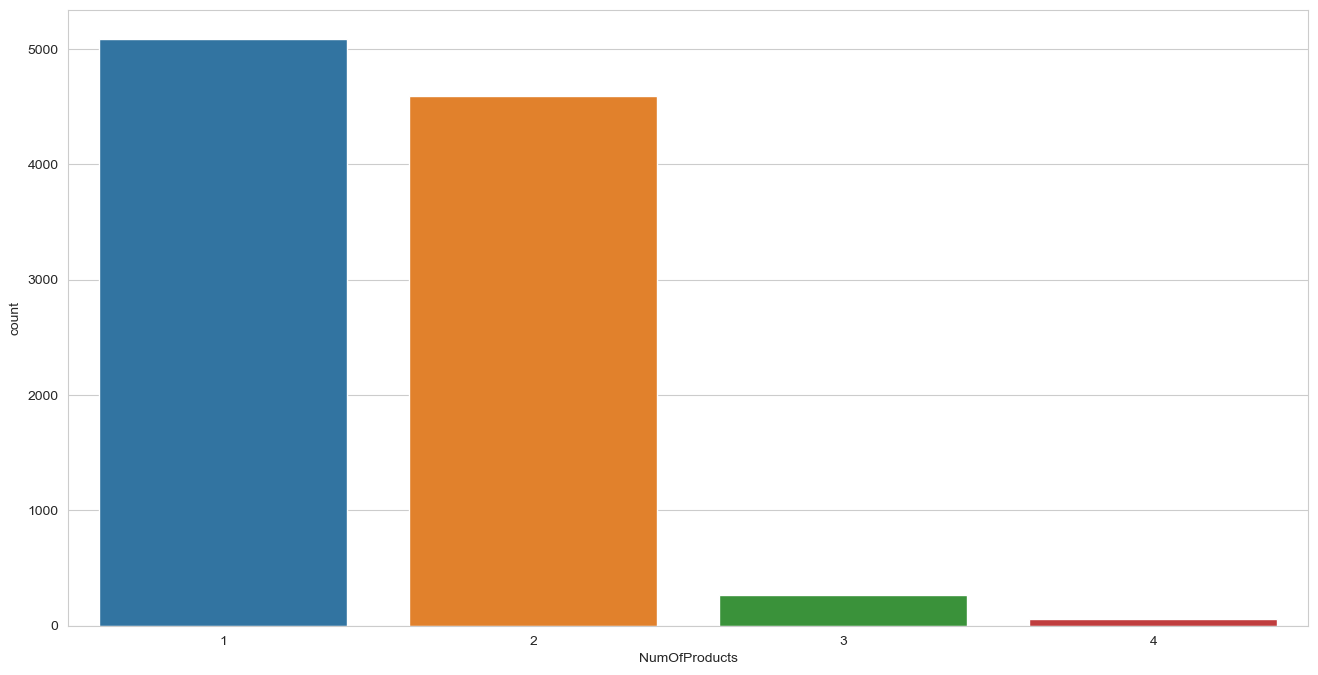

In [46]:
#Seeing the countplot of NumOfProducts
plt.figure(figsize=(16, 8))
sns.countplot(x=df['NumOfProducts'])
plt.show()
#We can see from the graph, most of the data are in 1 and 2.

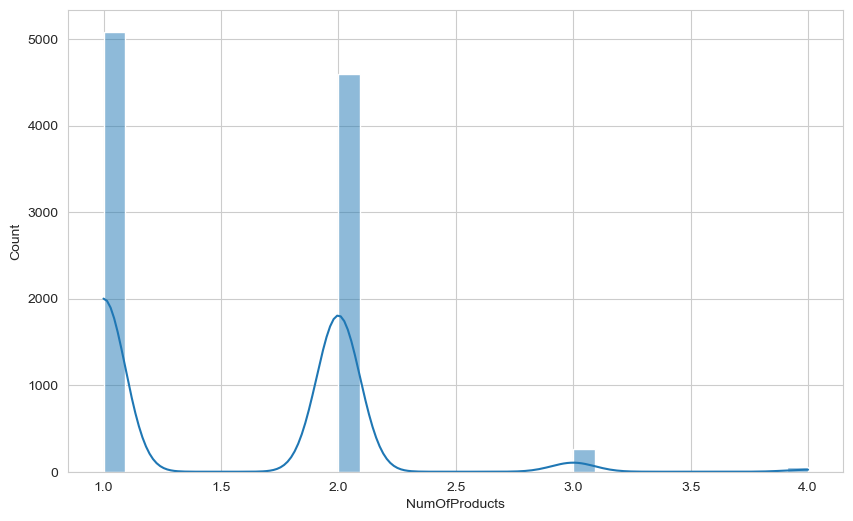

In [47]:
#Seeing the histplot of NumOfProducts
sns.histplot(df["NumOfProducts"], kde=True)
plt.show()

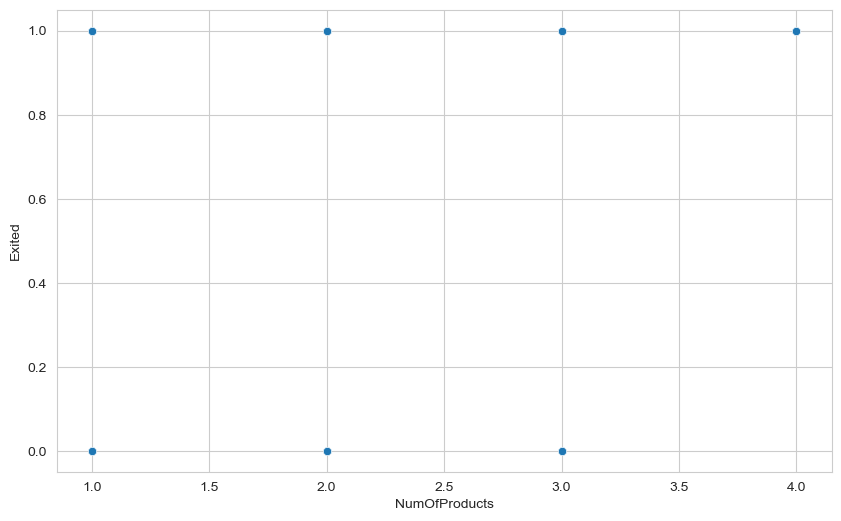

In [48]:
#Seeing the scatterplot of NumOfProducts with the target
sns.scatterplot(x='NumOfProducts', y='Exited', data=df)
plt.show()

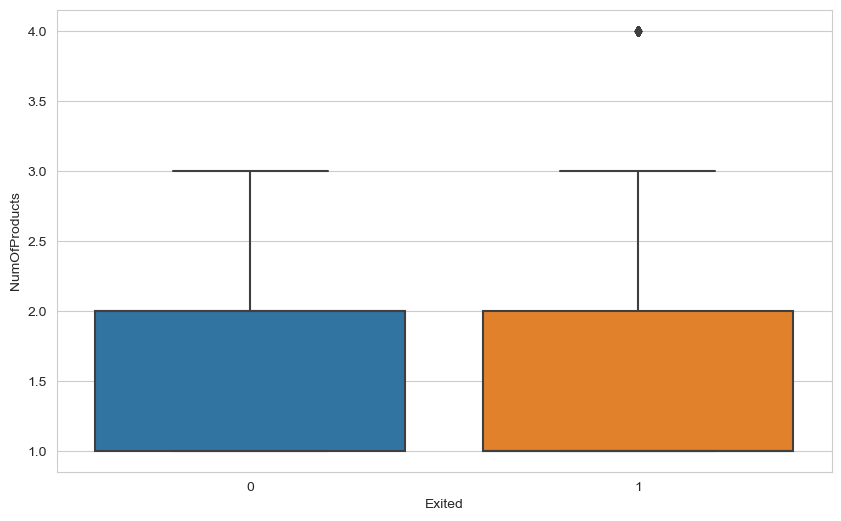

In [49]:
#Seeing the boxplot of the NumOfProducts with the target
sns.boxplot(x='Exited', y='NumOfProducts', data=df)
plt.show()
#This graph shows that there is an outlies at 4, which as we can see from the data previously, which contains 
#tiny values.

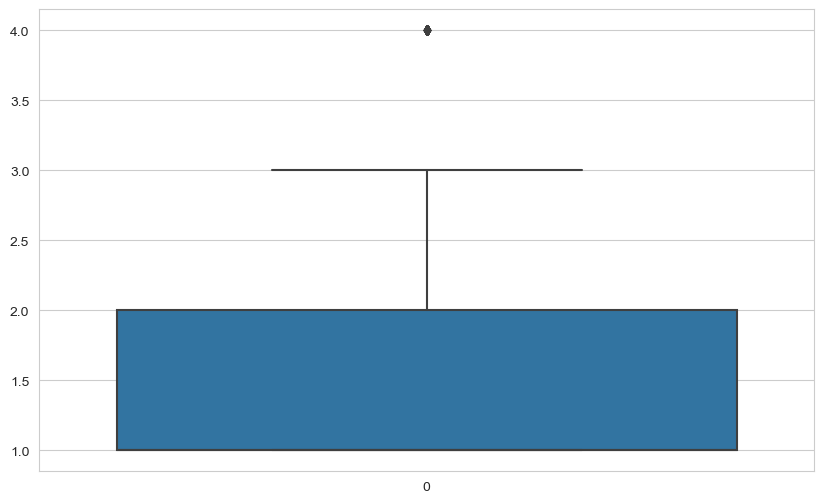

In [50]:
sns.boxplot(df['NumOfProducts'])
plt.show()

### HasCrCard
#### The number of credit cards given to the customer by the bank.

In [51]:
#Seeing the value counts of HasCrCard
df['HasCrCard'].value_counts()
#From the value counts of HasCrCard, we can see that we have binary values for this one, but the values of 1 is 
#much higher than 0. Not so balanced

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

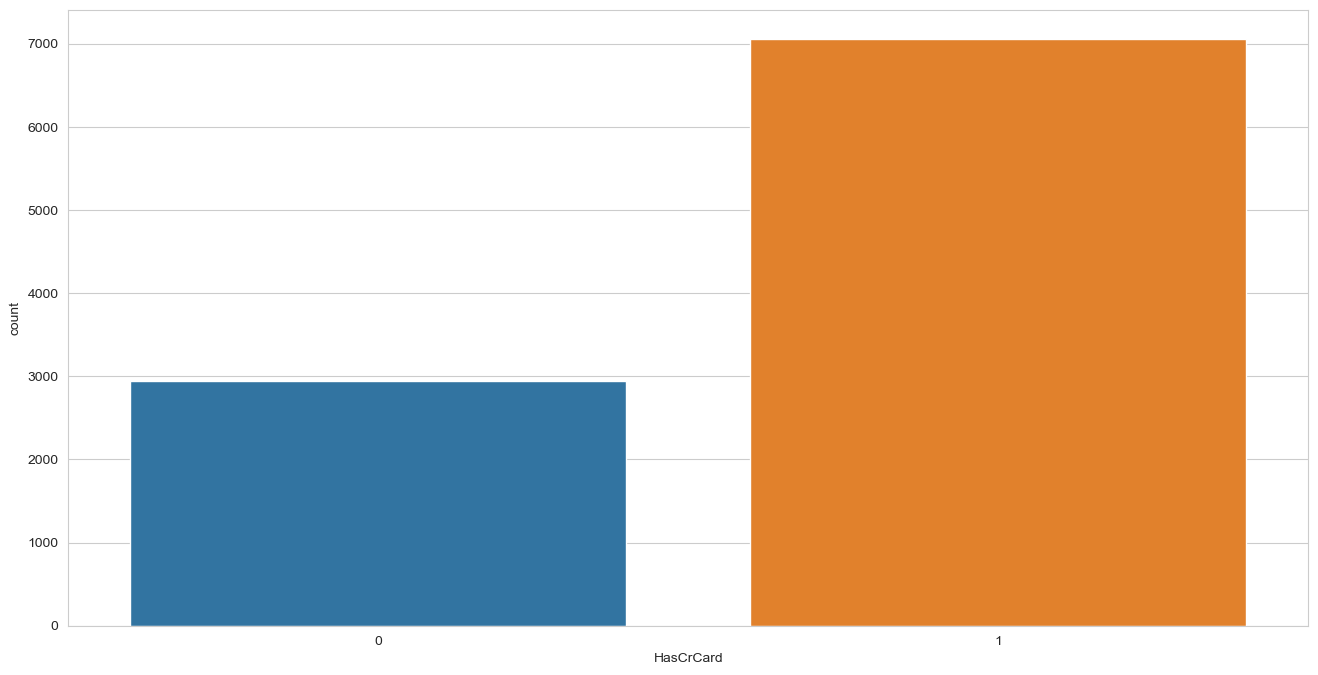

In [52]:
#Seeing the countplot of HasCrCard
plt.figure(figsize=(16, 8))
sns.countplot(x=df['HasCrCard'])
plt.show()
#We can see from the graph again, 1 has more values compared to 0

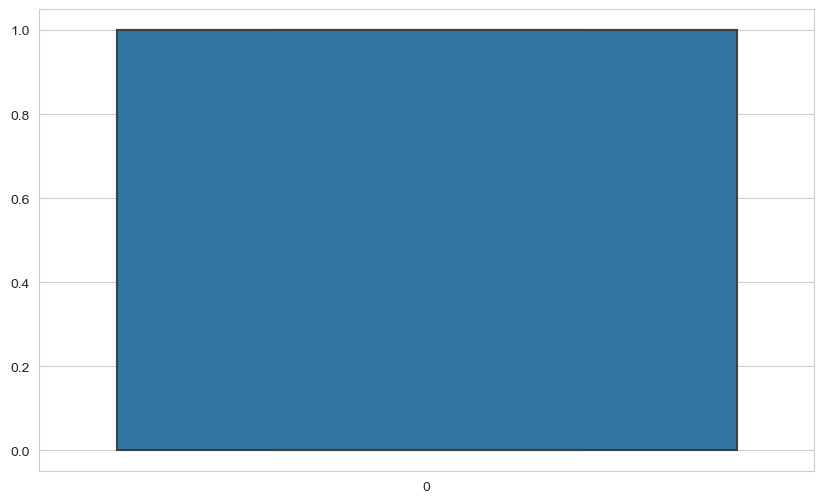

In [53]:
sns.boxplot(df['HasCrCard'])
plt.show()

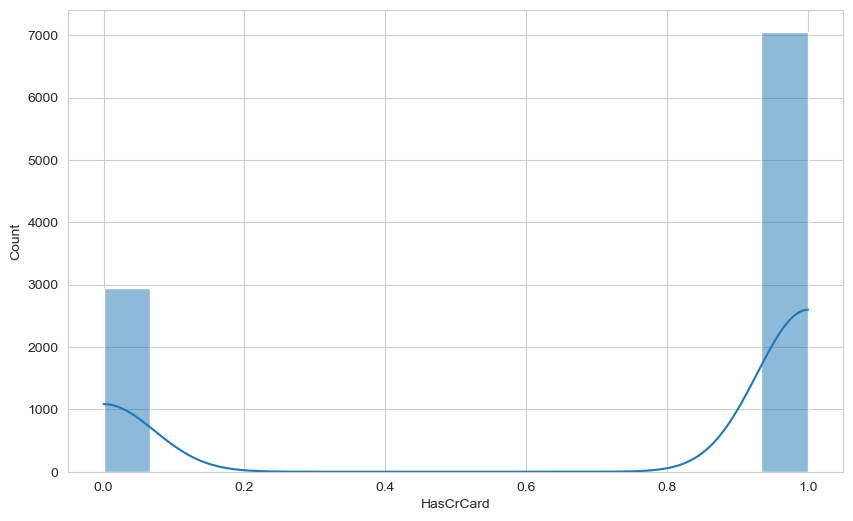

In [54]:
#Seeing the histplot of HasCrCard
sns.histplot(df["HasCrCard"], kde=True)
plt.show()

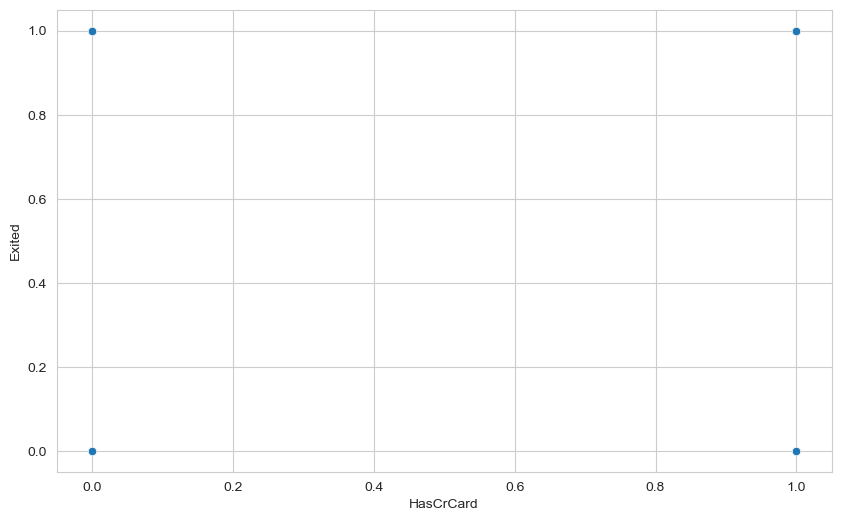

In [55]:
#Seeing the scatterplot of HasCrCard with the target
sns.scatterplot(x='HasCrCard', y='Exited', data=df)
plt.show()

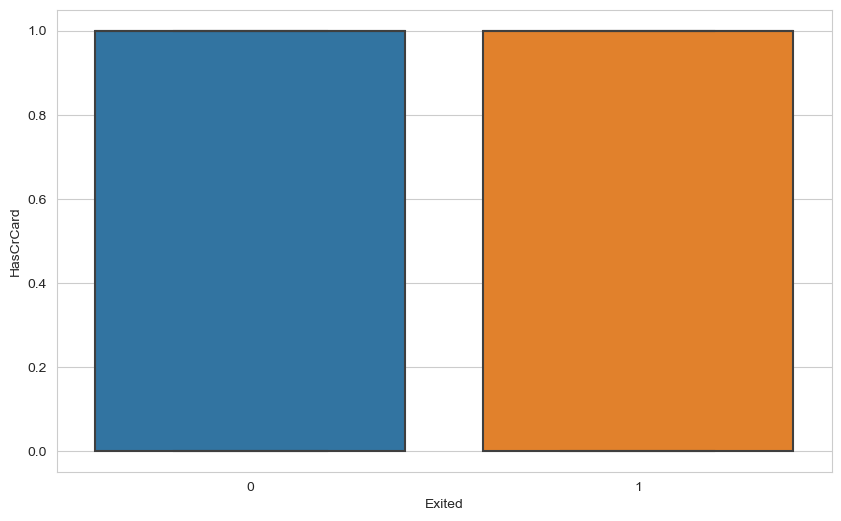

In [56]:
#Seeing the boxplot of the HasCrCard with the target
sns.boxplot(x='Exited', y='HasCrCard', data=df)
plt.show()

### IsActiveMember
#### Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")


In [57]:
#Seeing the value counts of IsActiveMember
df['IsActiveMember'].value_counts()
#From the value counts of IsActiveMember, we can see that it contains binary values 0 and 1.

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

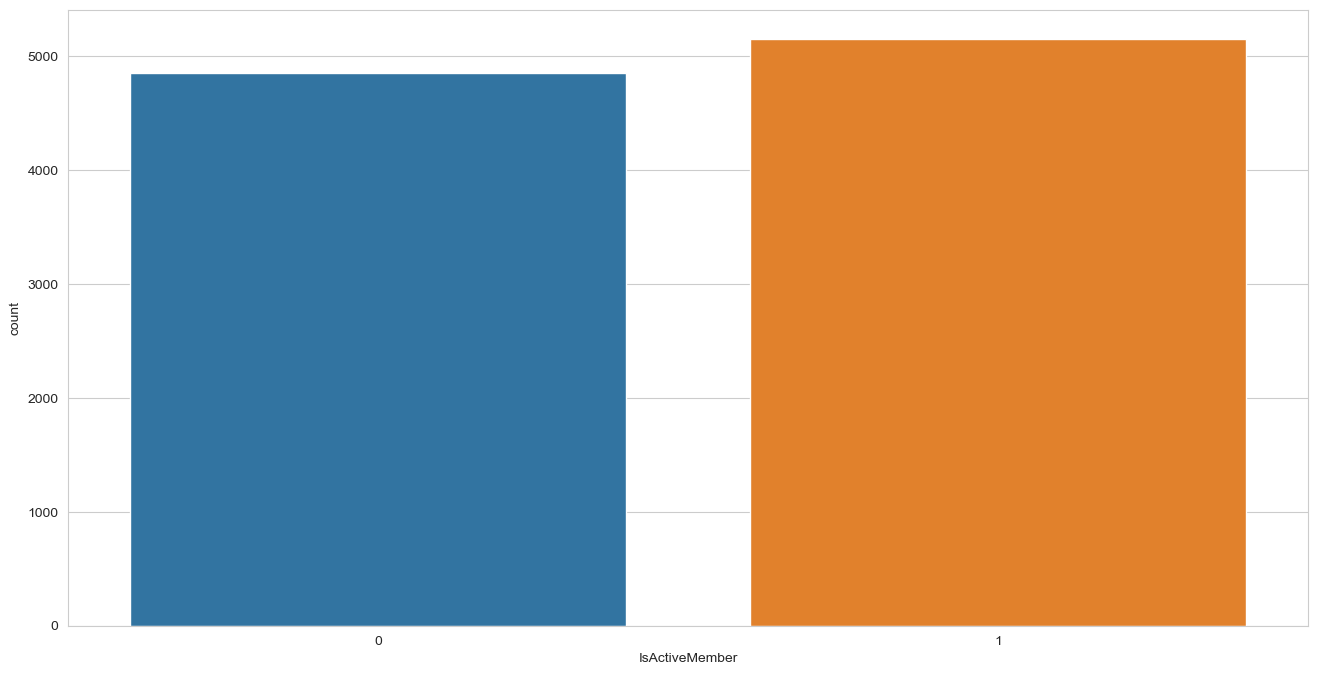

In [58]:
#Seeing the countplot of IsActiveMember
plt.figure(figsize=(16, 8))
sns.countplot(x=df['IsActiveMember'])
plt.show()
#The values of 1 and 0 are close, not big difference

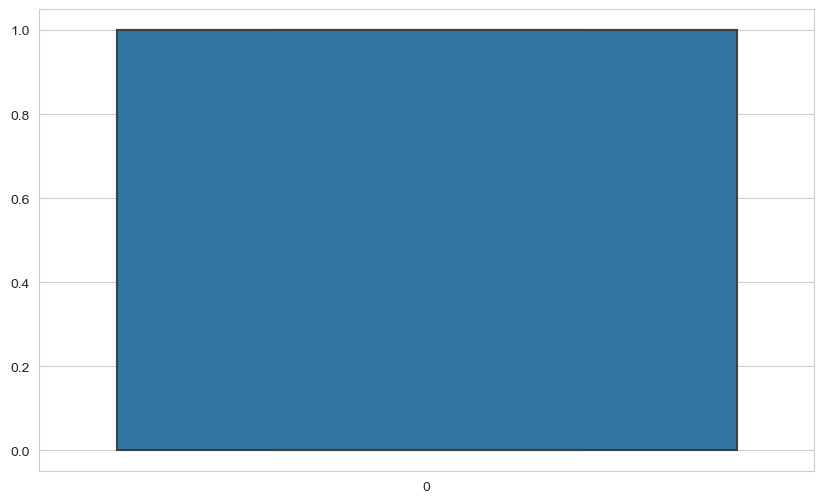

In [59]:
sns.boxplot(df['IsActiveMember'])
plt.show()

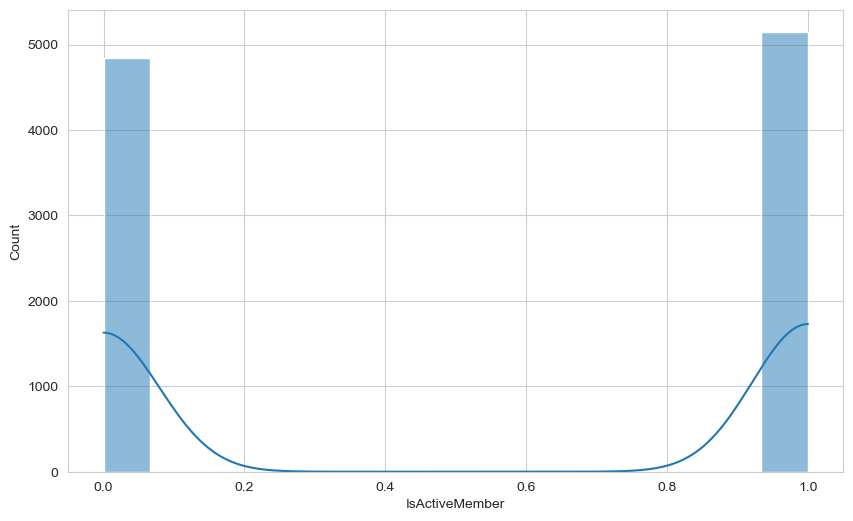

In [60]:
#Seeing the histplot of IsActiveMember
sns.histplot(df["IsActiveMember"], kde=True)
plt.show()

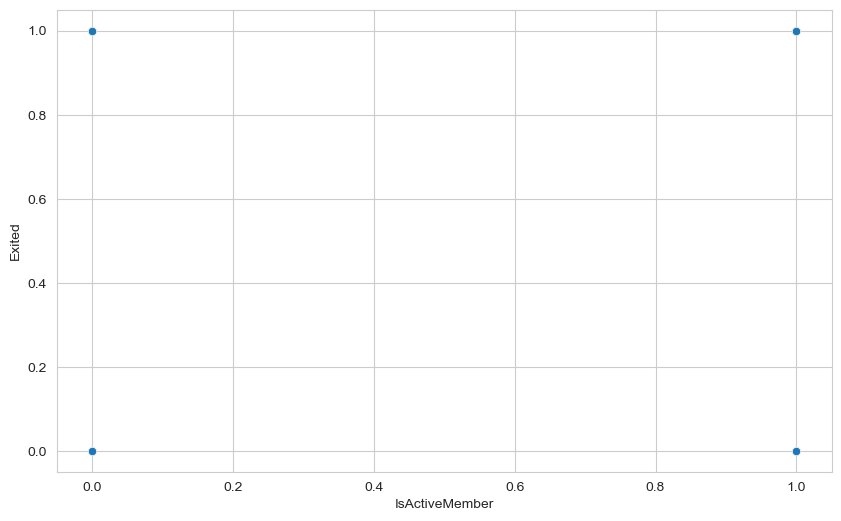

In [61]:
#Seeing the scatterplot of IsActiveMember with the target
sns.scatterplot(x='IsActiveMember', y='Exited', data=df)
plt.show()

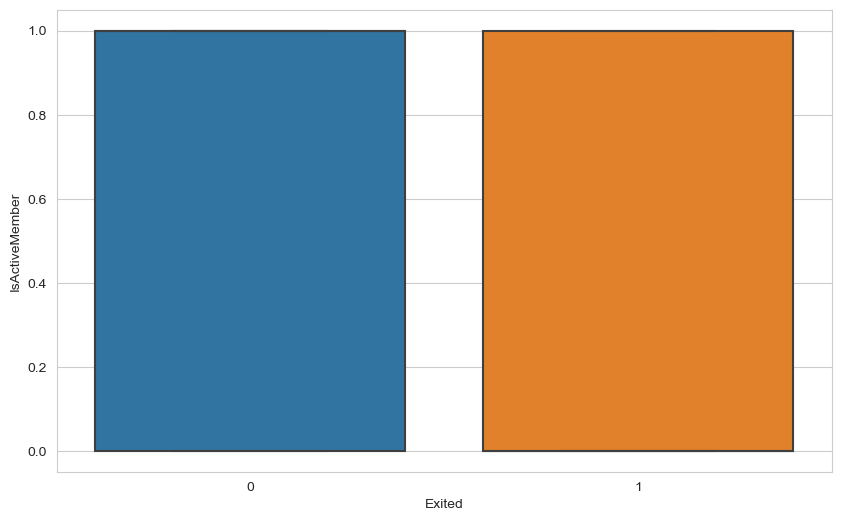

In [62]:
#Seeing the boxplot of the IsActiveMember with the target
sns.boxplot(x='Exited', y='IsActiveMember', data=df)
plt.show()

### EstimatedSalary

In [63]:
#Seeing the value counts of EstimatedSalary
df['EstimatedSalary'].value_counts()
#From the value counts of EstimatedSalary, the values are different from one to one.

EstimatedSalary
24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
4993.940      1
124964.820    1
161971.420    1
39488.040     1
187811.710    1
121505.610    1
184514.010    1
121311.120    1
12873.390     1
157238.050    1
123242.110    1
184399.760    1
57323.180     1
89874.820     1
31422.690     1
18988.580     1
19842.180     1
62627.550     1
197266.580    1
199992.480    1
16403.410     1
78854.570     1
189310.270    1
78088.170     1
103305.010    1
143301.490    1
116124.280    1
142730.270    1
58076.520     1
186123.570    1
29664.450     1
147963.070    1
38466.390     1
68293.930     1
10288.240     1
179446.310    1
118929.640    1
115037.670    1
187280.510    1
183540.220    1
28531.810     1
42730.120     1
104721.500    1
65219.850     1
70563.900     1
141453.620    1
139435.120    1
170347.100    1
131553.820    1
138344.700    1
169894.400    1
9770.970      1
74176.710     1
144880.810    1
101168.300    1
71672.860     1
61326.43

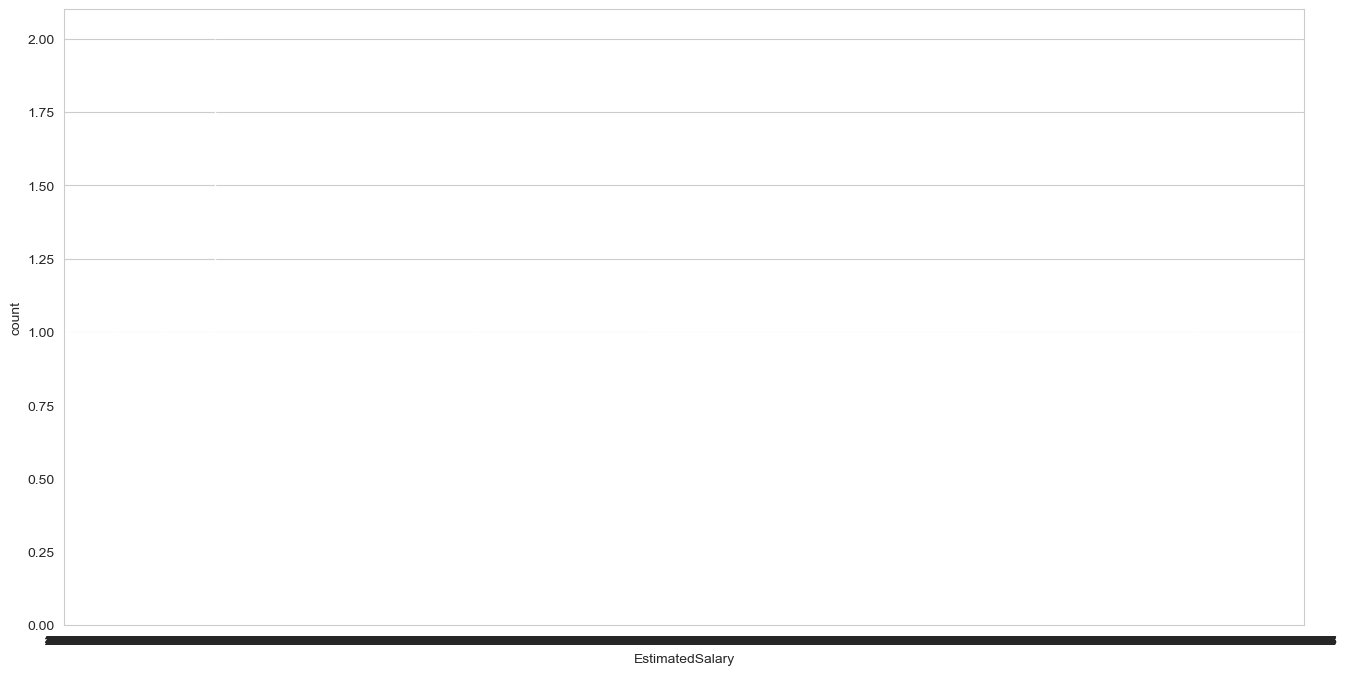

In [64]:
#Seeing the countplot of EstimatedSalary
plt.figure(figsize=(16, 8))
sns.countplot(x=df['EstimatedSalary'])
plt.show()

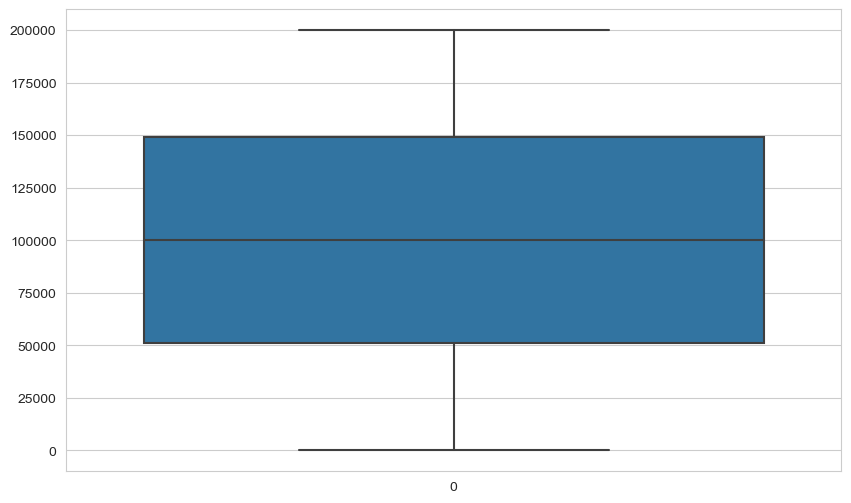

In [65]:
sns.boxplot(df['EstimatedSalary'])
plt.show()

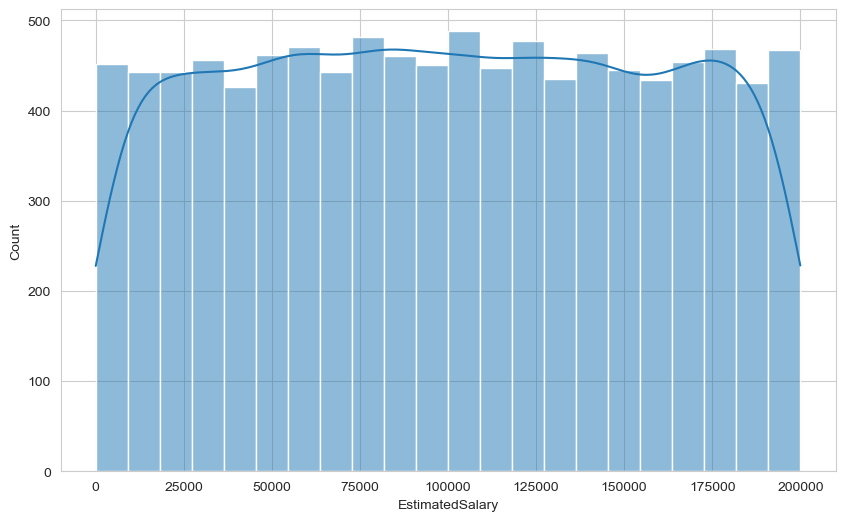

In [66]:
#Seeing the histplot of EstimatedSalary
sns.histplot(df["EstimatedSalary"], kde=True)
plt.show()

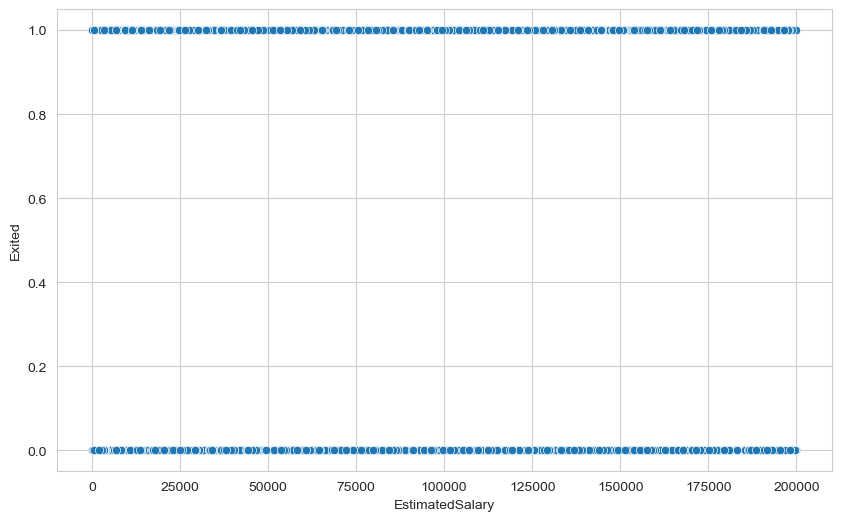

In [67]:
#Seeing the scatterplot of EstimatedSalary with the target
sns.scatterplot(x='EstimatedSalary', y='Exited', data=df)
plt.show()

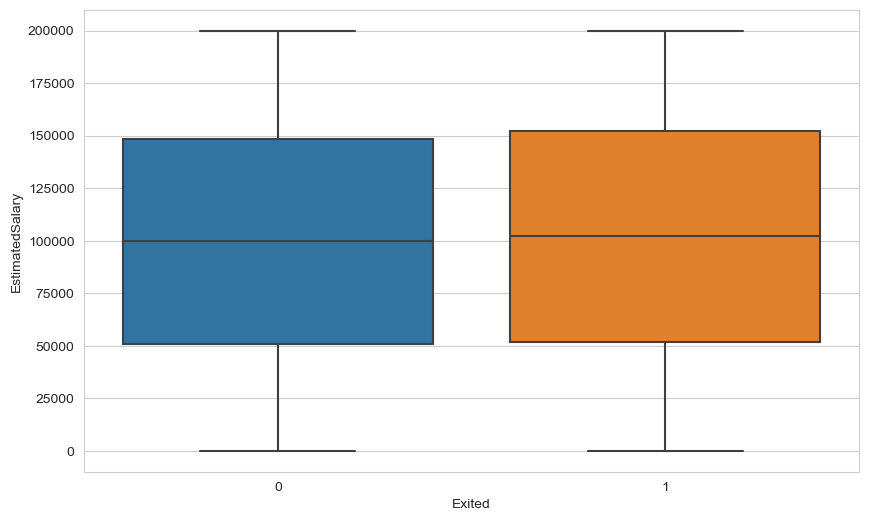

In [68]:
#Seeing the boxplot of the EstimatedSalary with the target
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.show()

### Exited
#### Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [69]:
#Seeing the value counts of Exited
df['Exited'].value_counts()
#From the value counts of Exited, which is our target, we can see that the values of 0 is much bigger than 0, not
#so balanced.

Exited
0    7963
1    2037
Name: count, dtype: int64

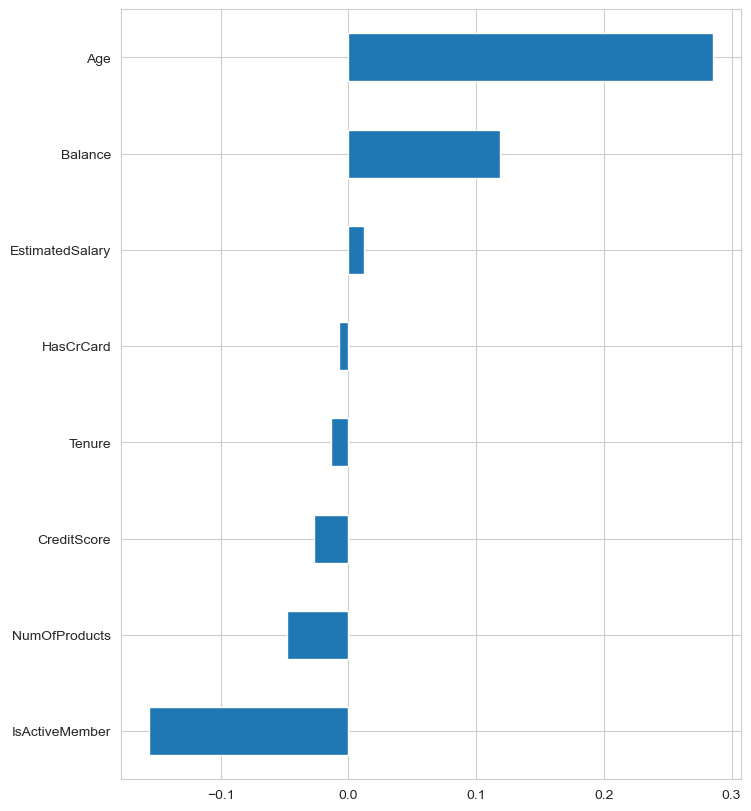

In [70]:
plt.figure(figsize=(8, 10))
df.corr(numeric_only=True)['Exited'].sort_values().drop('Exited').plot(kind='barh')
plt.show()

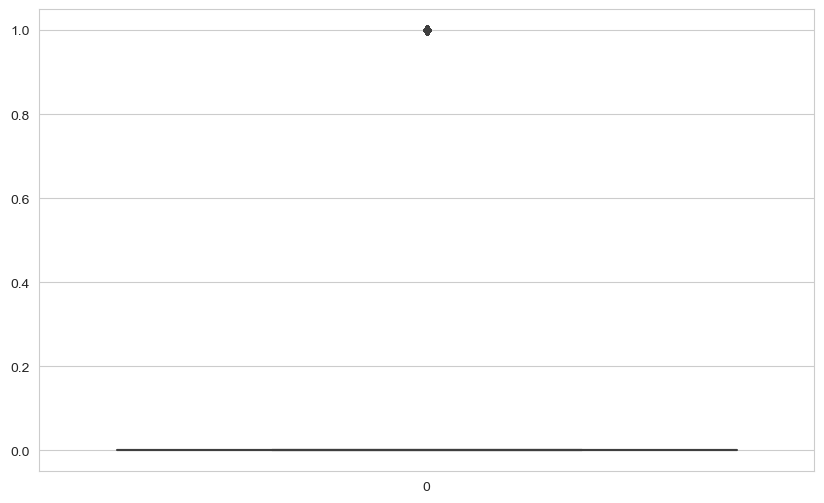

In [71]:
sns.boxplot(df['Exited'])
plt.show()

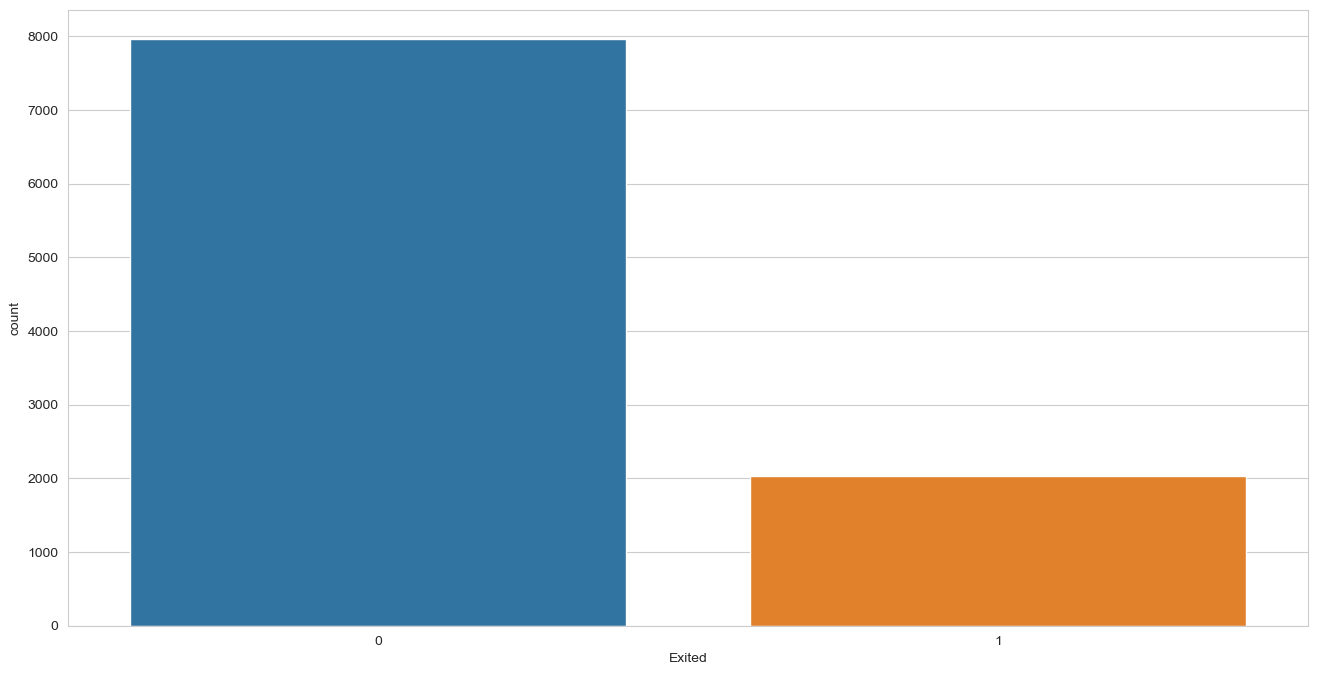

In [72]:
#Seeing the countplot of Exited
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Exited'])
plt.show()
#From the graph we can see that the values of 0 is smaller

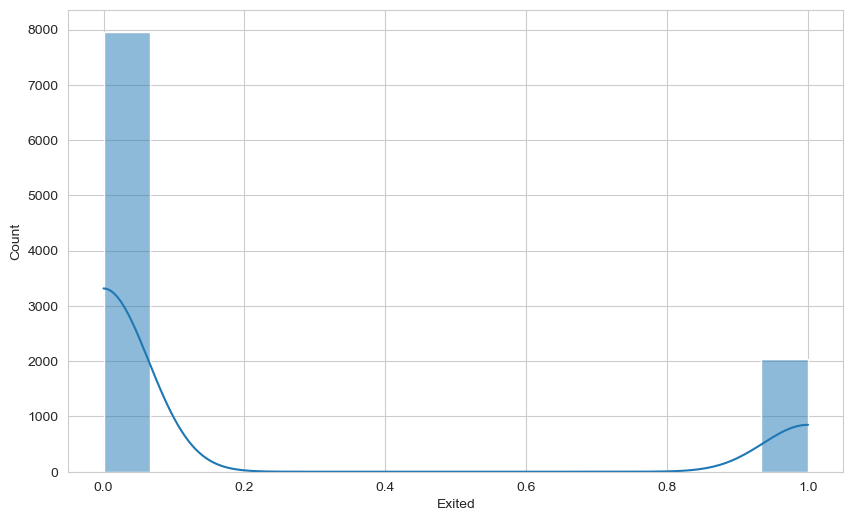

In [73]:
#Seeing the histplot of Exited
sns.histplot(df["Exited"], kde=True)
plt.show()

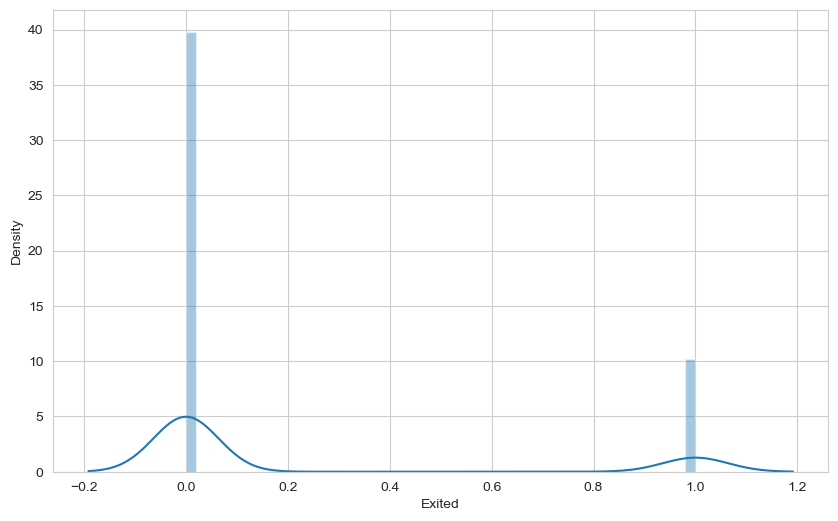

In [74]:
sns.distplot(df["Exited"])
plt.show()

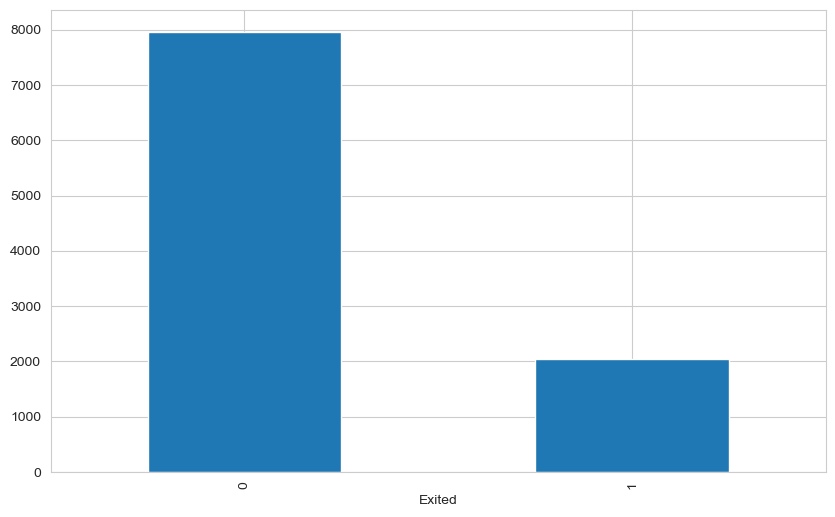

In [75]:
df["Exited"].value_counts().plot(kind="bar")
plt.show()

### Correlation

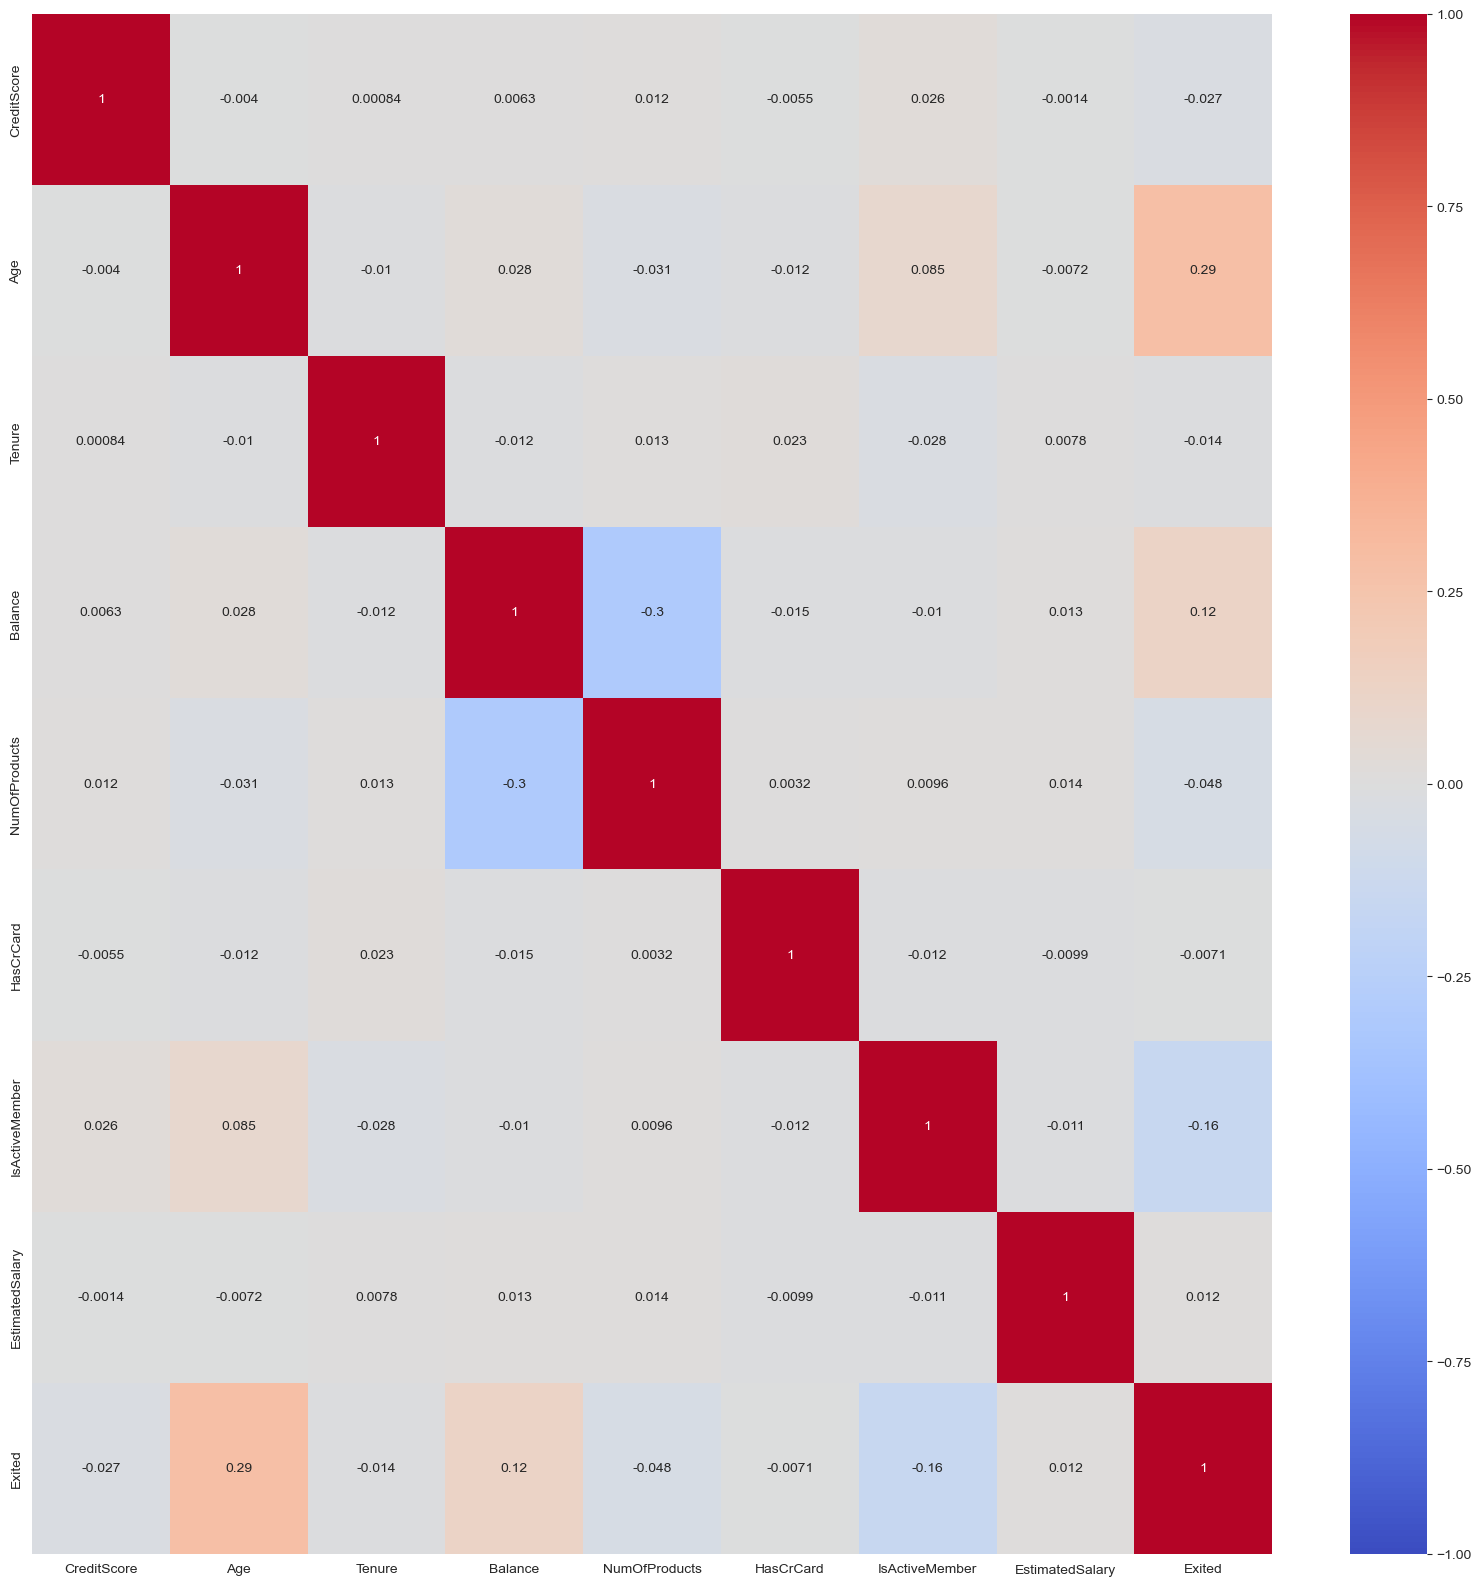

In [76]:
#Seeing if there is any correlation(multicorrelarity), by the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()
#from the heatmap, we can say that there is no correclation in the data, which is a good thing

In [77]:
#Checking for correlations
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True)) >= 0.9) & (abs(df.corr(numeric_only=True)) < 1) & (abs(df.corr(numeric_only=True)) <= -0.9) & (abs(df.corr(numeric_only=True)) > -1)].any().any()

False

### Pairplot for the data

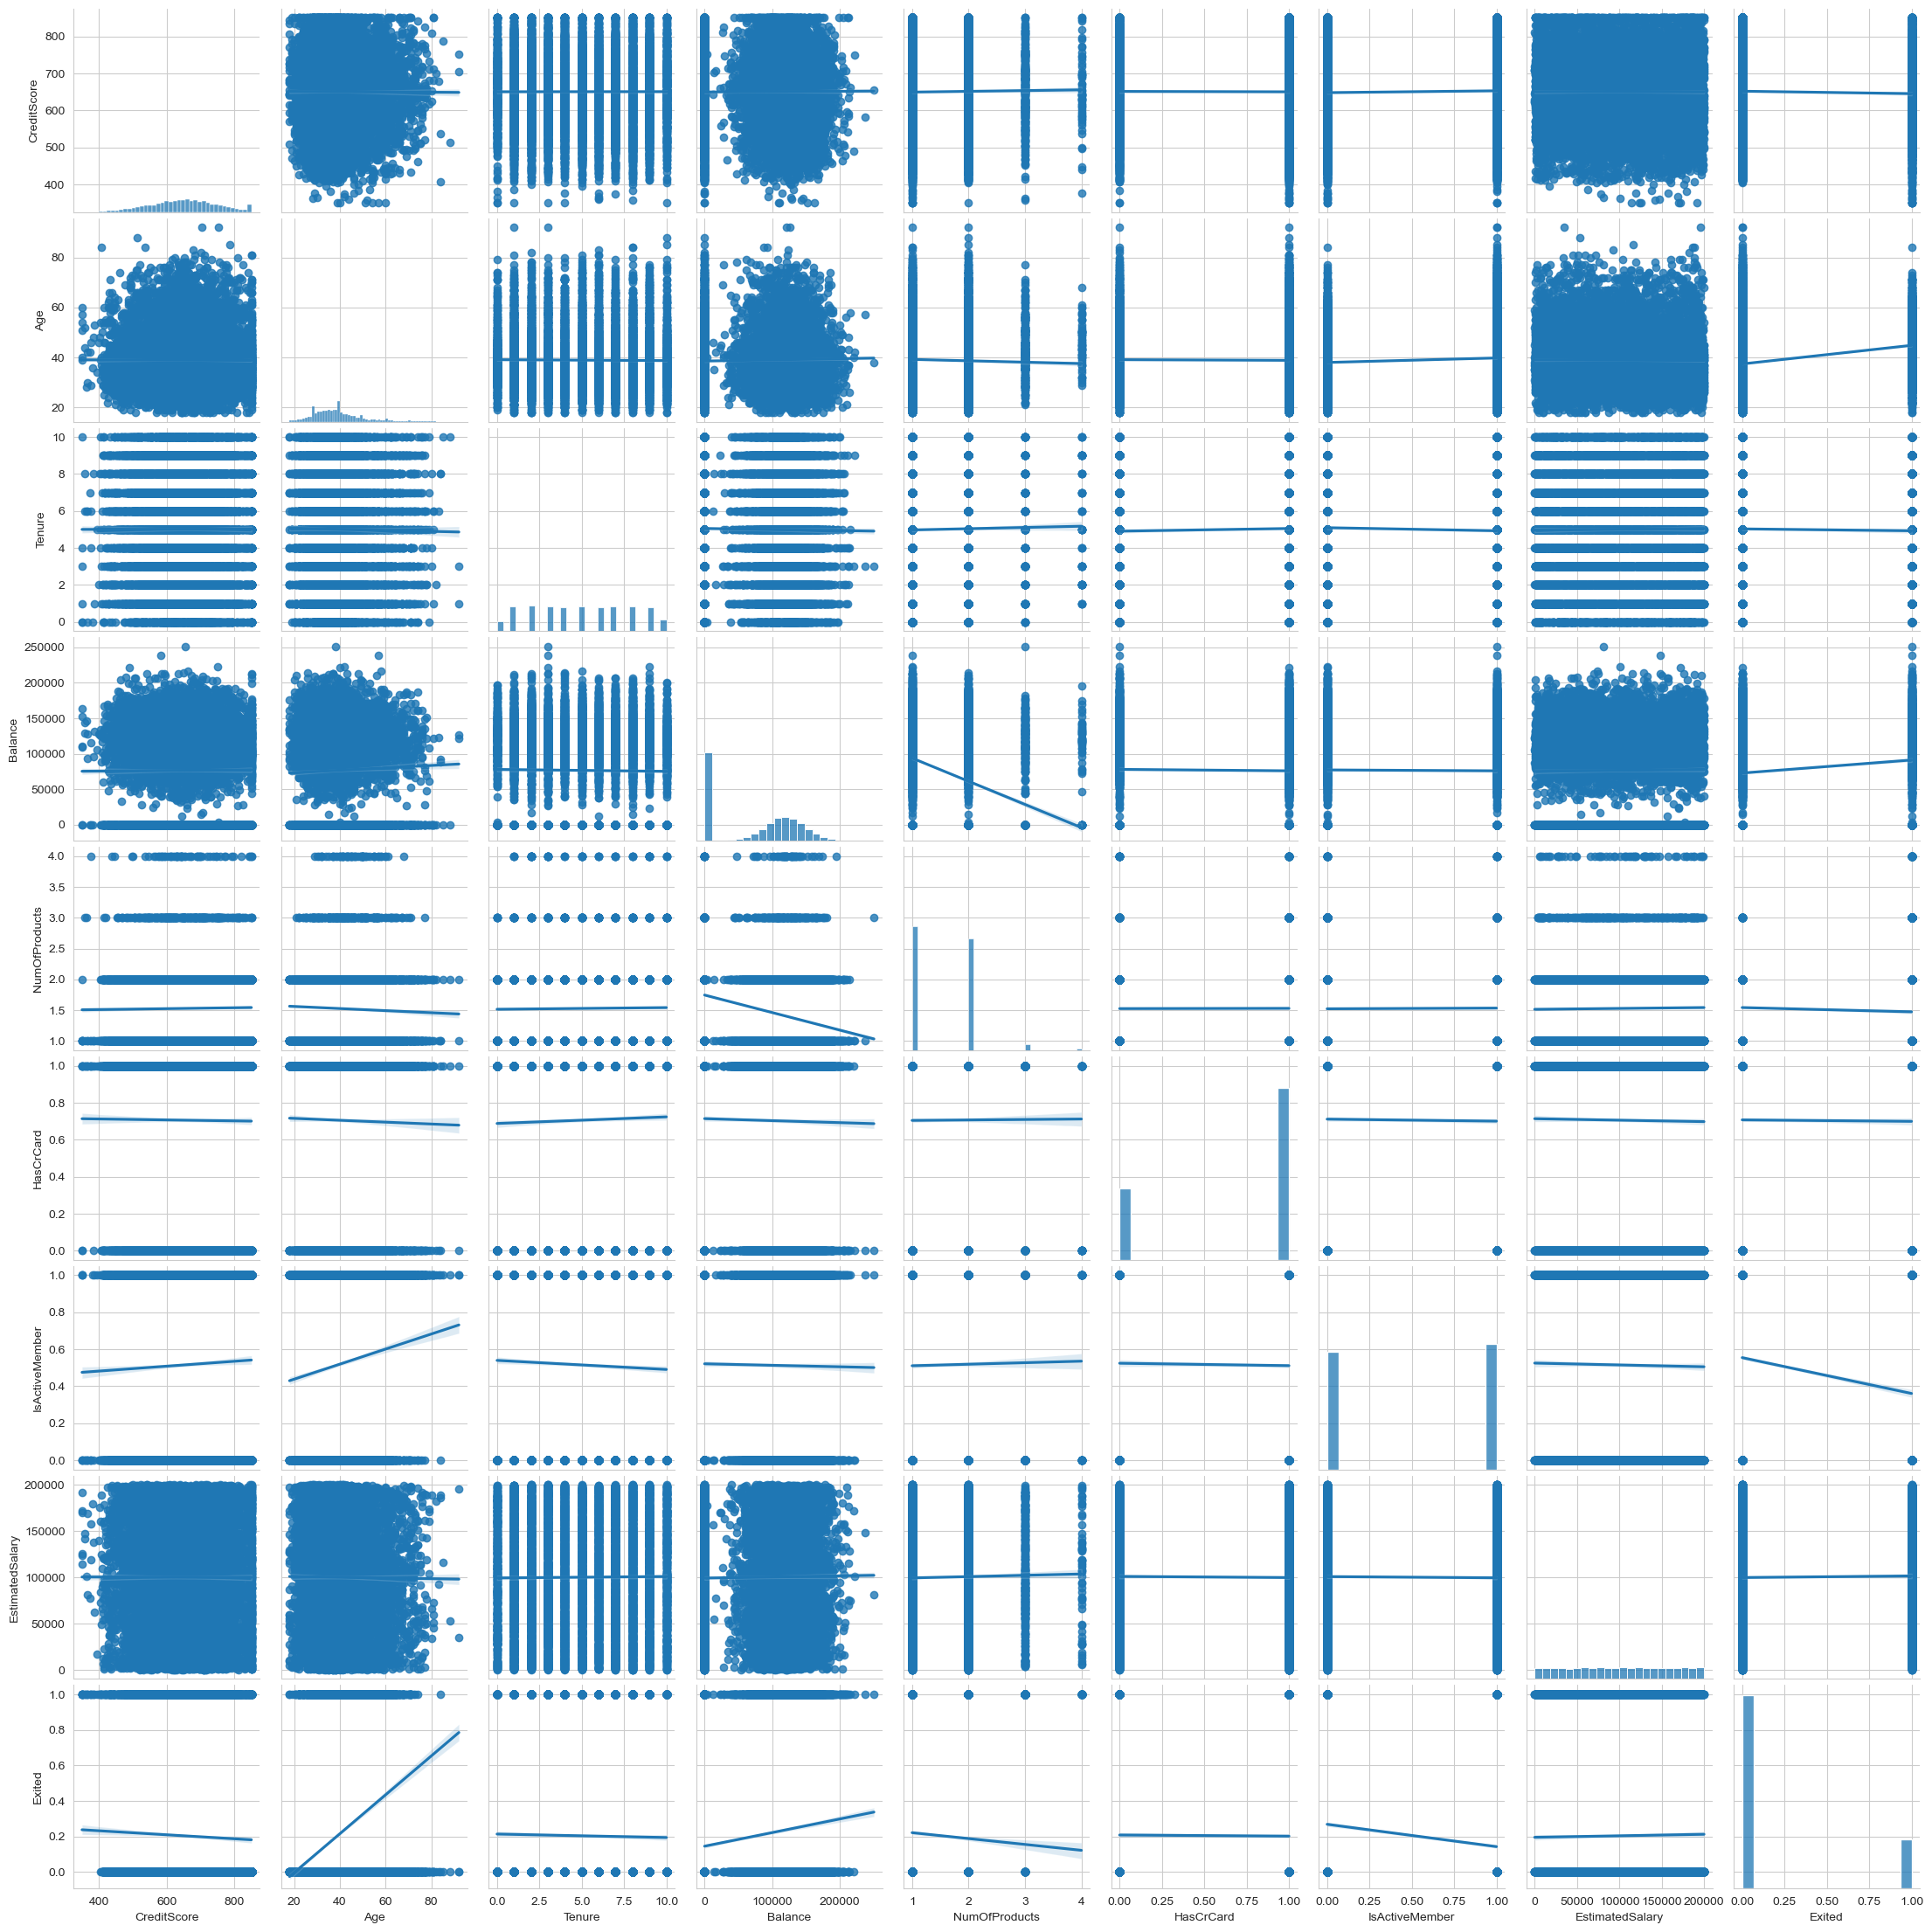

In [78]:
#Now, let's see tha pair plot
sns.pairplot(df, kind="reg")
plt.show()

In [79]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) > 0.2
    y_pred = model.predict(X_test) > 0.2

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Preprocessing of Data
- Train | Test Split, Scalling

In [80]:
#Seeing the object values in the data
df.select_dtypes('O').head()

Geography  Gender
0    France  Female
1     Spain  Female
2    France  Female
3    France  Female
4     Spain  Female

In [81]:
#Seeing the columns of the object values to use it in the next step
df.select_dtypes('O').columns

Index(['Geography', 'Gender'], dtype='object')

In [82]:
#Creating a variable that contains the object values
objs = ['Geography', 'Gender']

#Seeing the object values
objs

['Geography', 'Gender']

In [83]:
#Using the OneHotEncoder on the object values to be able to use them correctly

one_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), objs),
                            remainder=MinMaxScaler(),verbose_feature_names_out=False)

In [84]:
#Creating X and y variables
X = df.drop('Exited', axis=1)

y = df['Exited']

In [85]:
#The head of X
X.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2      0.000              1   
1          608     Spain  Female   41       1  83807.860              1   
2          502    France  Female   42       8 159660.800              3   
3          699    France  Female   39       1      0.000              2   
4          850     Spain  Female   43       2 125510.820              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1       101348.880  
1          0               1       112542.580  
2          1               0       113931.570  
3          0               0        93826.630  
4          1               1        79084.100

In [86]:
#Seeing the head of y
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [87]:
#Creating a seed values to use it in the other steps and do not get lost
seed = 101

#Unit 1 for hidden layer
u1 = 32

#Unit 2 for hidden layer
u2 = 16

#Unit 3 for hidden layer
u3 = 8

#The batch size
batch = 40

In [88]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10, random_state=seed)

In [89]:
#Taking a copy of them so if i needed them layer i can find them. also, i will keep the same names after using onehotencoding
#and with scaling. So, if something went wrong, i can find the values
X_train2 = X_train.copy()
X_test2 = X_test.copy()
y_train2 = y_train.copy()
y_test2 = y_test.copy()

In [90]:
#Seeing the head of  X_train data
X_train.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
8255          575    France  Female   40       1 139532.340              1   
7259          625     Spain    Male   32       7 106957.280              1   
9112          735    France    Male   73       9      0.000              1   
7666          494    France    Male   25       6      0.000              2   
257           671   Germany  Female   34       6  37266.670              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
8255          1               0       181294.390  
7259          1               1       134794.020  
9112          1               1       114283.330  
7666          0               1       109988.090  
257           0               0       156917.120

In [91]:
#Seeing the shape of X_train after splitting
X_train.shape

(9000, 10)

In [92]:
#Seeing the shape of y_train after splitting
y_train.shape

(9000,)

In [93]:
#Seeing the head of y_train after splitting
y_train.head()

8255    0
7259    0
9112    0
7666    0
257     0
Name: Exited, dtype: int64

In [94]:
#Seeing the shape of X_test after splitting
X_test.shape

(1000, 10)

In [95]:
#Seeing the head of X_test after splitting
X_test.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
4866          522   Germany  Female   37       3  95022.570              1   
3106          554    France  Female   45       6      0.000              2   
7771          850   Germany    Male   29       1 154640.410              1   
9428          737    France  Female   70       9  87542.890              2   
916           475    France    Male   39       6      0.000              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
4866          1               1       129107.590  
3106          1               1       181204.500  
7771          1               1       164039.510  
9428          1               1        42576.860  
916           1               1        56999.900

In [96]:
#Seeing the shape of y_test after splitting
y_test.shape

(1000,)

In [97]:
#Seeing the head of y_test after splitting
y_test.head()

4866    0
3106    0
7771    0
9428    0
916     1
Name: Exited, dtype: int64

In [98]:
#Now, let's take the objects that i have used in OneHotEncoder and assigned
X_train = one_trans.fit_transform(X_train) #In X_train, we use fit_transform
X_test = one_trans.transform(X_test) #In X_test, we use only transform

#Remember, if you miss this part, the scaler will not work, as the object data are not transformed yet.

In [99]:
#Creating a scaler to use it on the data
scaler = MinMaxScaler()

In [100]:
#Using scaler to scaler the X_train and X_test
X_train = scaler.fit_transform(X_train) #In X_train, we use fit_transform
X_test = scaler.transform(X_test) #In X_test, we use only transform

#Now, the data is scaled and we can use it correctly.

In [101]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) > 0.5
    y_pred = model.predict(X_test) > 0.5

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [102]:
#First, setting the random seed
tf.random.set_seed(seed)


#Creating the model with Sequential
model = Sequential()

#Creating the layers
model.add(Dense(u1, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(u2, activation='relu')) #Hidden layer
model.add(Dense(u3, activation='relu')) #Hidden layer
model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Compile the layers
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
#Note, we are using adam optimzer here as it is the best one. we are using binary_crossentropy in the loss because 
# in classification with binary we use binary_crossentropy. Also, we are using accuracy in the metrics becasue we are 
# working with classification 

In [103]:
#Now, we can fit the data to the model
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=batch, epochs=1000, verbose=1)

Epoch 1/1000
203/203 [==============================] - 2s 3ms/step - loss: 0.5391 - recall: 0.0880 - val_loss: 0.4877 - val_recall: 0.0000e+00
Epoch 2/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4571 - recall: 0.0342 - val_loss: 0.4685 - val_recall: 0.0406
Epoch 3/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4398 - recall: 0.1198 - val_loss: 0.4491 - val_recall: 0.1015
Epoch 4/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4261 - recall: 0.1864 - val_loss: 0.4333 - val_recall: 0.2132
Epoch 5/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4197 - recall: 0.2402 - val_loss: 0.4261 - val_recall: 0.2995
Epoch 6/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4114 - recall: 0.2683 - val_loss: 0.4181 - val_recall: 0.3046
Epoch 7/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4020 - recall: 0.2983 - val_loss: 0.4078 - val_recall: 0.3096
Epoch 8/1000
203

203/203 [==============================] - 0s 2ms/step - loss: 0.3171 - recall: 0.4963 - val_loss: 0.3421 - val_recall: 0.4975
Epoch 60/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3151 - recall: 0.5006 - val_loss: 0.3450 - val_recall: 0.4518
Epoch 61/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.4982 - val_loss: 0.3454 - val_recall: 0.4619
Epoch 62/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3159 - recall: 0.5000 - val_loss: 0.3509 - val_recall: 0.4112
Epoch 63/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.4976 - val_loss: 0.3449 - val_recall: 0.4569
Epoch 64/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3155 - recall: 0.4957 - val_loss: 0.3504 - val_recall: 0.5635
Epoch 65/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3146 - recall: 0.5061 - val_loss: 0.3628 - val_recall: 0.6091
Epoch 66/1000
203/203 [====

203/203 [==============================] - 0s 2ms/step - loss: 0.3021 - recall: 0.5348 - val_loss: 0.3451 - val_recall: 0.4975
Epoch 118/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3031 - recall: 0.5300 - val_loss: 0.3510 - val_recall: 0.5381
Epoch 119/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3029 - recall: 0.5287 - val_loss: 0.3449 - val_recall: 0.4670
Epoch 120/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3034 - recall: 0.5355 - val_loss: 0.3516 - val_recall: 0.4061
Epoch 121/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3019 - recall: 0.5379 - val_loss: 0.3436 - val_recall: 0.4518
Epoch 122/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3043 - recall: 0.5251 - val_loss: 0.3486 - val_recall: 0.4315
Epoch 123/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3006 - recall: 0.5348 - val_loss: 0.3487 - val_recall: 0.4924
Epoch 124/1000
203/20

Epoch 175/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2914 - recall: 0.5532 - val_loss: 0.3641 - val_recall: 0.5787
Epoch 176/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2895 - recall: 0.5526 - val_loss: 0.3568 - val_recall: 0.4873
Epoch 177/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2919 - recall: 0.5538 - val_loss: 0.3557 - val_recall: 0.5025
Epoch 178/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2912 - recall: 0.5495 - val_loss: 0.3583 - val_recall: 0.4924
Epoch 179/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2902 - recall: 0.5513 - val_loss: 0.3531 - val_recall: 0.4569
Epoch 180/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2924 - recall: 0.5422 - val_loss: 0.3639 - val_recall: 0.5381
Epoch 181/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2892 - recall: 0.5593 - val_loss: 0.3533 - val_recall: 0.4924
Epoch 

Epoch 233/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2824 - recall: 0.5648 - val_loss: 0.3609 - val_recall: 0.4975
Epoch 234/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2823 - recall: 0.5623 - val_loss: 0.3692 - val_recall: 0.5635
Epoch 235/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2838 - recall: 0.5678 - val_loss: 0.3642 - val_recall: 0.4975
Epoch 236/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2820 - recall: 0.5599 - val_loss: 0.3616 - val_recall: 0.5228
Epoch 237/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2818 - recall: 0.5568 - val_loss: 0.3705 - val_recall: 0.5330
Epoch 238/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2814 - recall: 0.5691 - val_loss: 0.3673 - val_recall: 0.5990
Epoch 239/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2819 - recall: 0.5672 - val_loss: 0.3759 - val_recall: 0.5482
Epoch 

Epoch 291/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2759 - recall: 0.5752 - val_loss: 0.3729 - val_recall: 0.4619
Epoch 292/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2746 - recall: 0.5666 - val_loss: 0.3801 - val_recall: 0.5279
Epoch 293/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2749 - recall: 0.5709 - val_loss: 0.3810 - val_recall: 0.4822
Epoch 294/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2768 - recall: 0.5562 - val_loss: 0.3786 - val_recall: 0.5330
Epoch 295/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2759 - recall: 0.5678 - val_loss: 0.3719 - val_recall: 0.4670
Epoch 296/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2765 - recall: 0.5746 - val_loss: 0.3640 - val_recall: 0.4822
Epoch 297/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2749 - recall: 0.5691 - val_loss: 0.3705 - val_recall: 0.4873
Epoch 

Epoch 349/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2700 - recall: 0.5758 - val_loss: 0.3864 - val_recall: 0.5076
Epoch 350/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2702 - recall: 0.5844 - val_loss: 0.3897 - val_recall: 0.5076
Epoch 351/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2694 - recall: 0.5709 - val_loss: 0.4013 - val_recall: 0.4619
Epoch 352/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2717 - recall: 0.5770 - val_loss: 0.3987 - val_recall: 0.4670
Epoch 353/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2694 - recall: 0.5703 - val_loss: 0.3830 - val_recall: 0.4569
Epoch 354/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2720 - recall: 0.5795 - val_loss: 0.3791 - val_recall: 0.4721
Epoch 355/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2689 - recall: 0.5782 - val_loss: 0.4094 - val_recall: 0.5431
Epoch 

Epoch 407/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2652 - recall: 0.5868 - val_loss: 0.4048 - val_recall: 0.4772
Epoch 408/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2666 - recall: 0.5807 - val_loss: 0.3864 - val_recall: 0.4670
Epoch 409/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2641 - recall: 0.5831 - val_loss: 0.3942 - val_recall: 0.4619
Epoch 410/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2650 - recall: 0.5850 - val_loss: 0.4052 - val_recall: 0.4670
Epoch 411/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2643 - recall: 0.5807 - val_loss: 0.4021 - val_recall: 0.5127
Epoch 412/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2668 - recall: 0.5727 - val_loss: 0.4073 - val_recall: 0.5533
Epoch 413/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2650 - recall: 0.5960 - val_loss: 0.4139 - val_recall: 0.5127
Epoch 

Epoch 465/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2596 - recall: 0.5935 - val_loss: 0.4170 - val_recall: 0.5279
Epoch 466/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.2609 - recall: 0.5929 - val_loss: 0.4320 - val_recall: 0.5025
Epoch 467/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2618 - recall: 0.5954 - val_loss: 0.4228 - val_recall: 0.4873
Epoch 468/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2623 - recall: 0.5911 - val_loss: 0.4126 - val_recall: 0.5025
Epoch 469/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2586 - recall: 0.5923 - val_loss: 0.4137 - val_recall: 0.4975
Epoch 470/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2596 - recall: 0.5831 - val_loss: 0.4399 - val_recall: 0.5635
Epoch 471/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2628 - recall: 0.5813 - val_loss: 0.4029 - val_recall: 0.4721
Epoch 

Epoch 523/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2560 - recall: 0.5996 - val_loss: 0.4115 - val_recall: 0.4873
Epoch 524/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2559 - recall: 0.6015 - val_loss: 0.4248 - val_recall: 0.4873
Epoch 525/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2588 - recall: 0.6002 - val_loss: 0.3998 - val_recall: 0.4772
Epoch 526/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2558 - recall: 0.5978 - val_loss: 0.4157 - val_recall: 0.4873
Epoch 527/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2570 - recall: 0.5923 - val_loss: 0.4129 - val_recall: 0.5279
Epoch 528/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2545 - recall: 0.5990 - val_loss: 0.4453 - val_recall: 0.5381
Epoch 529/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2556 - recall: 0.6002 - val_loss: 0.4333 - val_recall: 0.5228
Epoch 

Epoch 581/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2548 - recall: 0.5972 - val_loss: 0.4613 - val_recall: 0.5736
Epoch 582/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2525 - recall: 0.6076 - val_loss: 0.4364 - val_recall: 0.5178
Epoch 583/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2519 - recall: 0.6021 - val_loss: 0.4394 - val_recall: 0.5330
Epoch 584/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2525 - recall: 0.6174 - val_loss: 0.4272 - val_recall: 0.4975
Epoch 585/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2517 - recall: 0.6051 - val_loss: 0.4247 - val_recall: 0.4873
Epoch 586/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2520 - recall: 0.6057 - val_loss: 0.4167 - val_recall: 0.4721
Epoch 587/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2530 - recall: 0.6051 - val_loss: 0.4309 - val_recall: 0.4873
Epoch 

Epoch 639/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2506 - recall: 0.6174 - val_loss: 0.4456 - val_recall: 0.5431
Epoch 640/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2490 - recall: 0.6137 - val_loss: 0.4506 - val_recall: 0.5330
Epoch 641/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2478 - recall: 0.6216 - val_loss: 0.4253 - val_recall: 0.5228
Epoch 642/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2522 - recall: 0.6027 - val_loss: 0.4504 - val_recall: 0.5482
Epoch 643/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2506 - recall: 0.6106 - val_loss: 0.4228 - val_recall: 0.4822
Epoch 644/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2498 - recall: 0.6106 - val_loss: 0.4289 - val_recall: 0.5127
Epoch 645/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2489 - recall: 0.6155 - val_loss: 0.4391 - val_recall: 0.5076
Epoch 

Epoch 697/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2462 - recall: 0.6198 - val_loss: 0.4534 - val_recall: 0.5279
Epoch 698/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2485 - recall: 0.6149 - val_loss: 0.4508 - val_recall: 0.5330
Epoch 699/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2463 - recall: 0.6131 - val_loss: 0.4644 - val_recall: 0.5228
Epoch 700/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2476 - recall: 0.6204 - val_loss: 0.4664 - val_recall: 0.5635
Epoch 701/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2473 - recall: 0.6222 - val_loss: 0.4519 - val_recall: 0.4822
Epoch 702/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2464 - recall: 0.6192 - val_loss: 0.4646 - val_recall: 0.4924
Epoch 703/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2485 - recall: 0.6180 - val_loss: 0.4650 - val_recall: 0.4873
Epoch 

Epoch 755/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2430 - recall: 0.6222 - val_loss: 0.4624 - val_recall: 0.5736
Epoch 756/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2456 - recall: 0.6271 - val_loss: 0.4823 - val_recall: 0.5330
Epoch 757/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2442 - recall: 0.6235 - val_loss: 0.4525 - val_recall: 0.4924
Epoch 758/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2448 - recall: 0.6216 - val_loss: 0.4478 - val_recall: 0.5482
Epoch 759/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2440 - recall: 0.6259 - val_loss: 0.4551 - val_recall: 0.5279
Epoch 760/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2451 - recall: 0.6216 - val_loss: 0.4589 - val_recall: 0.4670
Epoch 761/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2442 - recall: 0.6216 - val_loss: 0.4559 - val_recall: 0.4619
Epoch 

Epoch 813/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2427 - recall: 0.6339 - val_loss: 0.4870 - val_recall: 0.5127
Epoch 814/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2401 - recall: 0.6345 - val_loss: 0.4626 - val_recall: 0.4721
Epoch 815/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.2418 - recall: 0.6369 - val_loss: 0.4624 - val_recall: 0.4518
Epoch 816/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2417 - recall: 0.6204 - val_loss: 0.4767 - val_recall: 0.5533
Epoch 817/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2433 - recall: 0.6210 - val_loss: 0.4953 - val_recall: 0.5228
Epoch 818/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2420 - recall: 0.6222 - val_loss: 0.4626 - val_recall: 0.5330
Epoch 819/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.2421 - recall: 0.6284 - val_loss: 0.4837 - val_recall: 0.4924
Epoch 

Epoch 871/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2385 - recall: 0.6357 - val_loss: 0.5000 - val_recall: 0.4772
Epoch 872/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2402 - recall: 0.6235 - val_loss: 0.4915 - val_recall: 0.5533
Epoch 873/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2371 - recall: 0.6369 - val_loss: 0.4982 - val_recall: 0.5381
Epoch 874/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2392 - recall: 0.6241 - val_loss: 0.4997 - val_recall: 0.5279
Epoch 875/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2411 - recall: 0.6278 - val_loss: 0.5094 - val_recall: 0.5228
Epoch 876/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2409 - recall: 0.6235 - val_loss: 0.4796 - val_recall: 0.4873
Epoch 877/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2414 - recall: 0.6271 - val_loss: 0.5318 - val_recall: 0.5584
Epoch 

Epoch 929/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2380 - recall: 0.6400 - val_loss: 0.4860 - val_recall: 0.4873
Epoch 930/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2370 - recall: 0.6351 - val_loss: 0.4905 - val_recall: 0.5025
Epoch 931/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2361 - recall: 0.6381 - val_loss: 0.4837 - val_recall: 0.4822
Epoch 932/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2416 - recall: 0.6326 - val_loss: 0.4499 - val_recall: 0.4924
Epoch 933/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2383 - recall: 0.6357 - val_loss: 0.5014 - val_recall: 0.5279
Epoch 934/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2366 - recall: 0.6381 - val_loss: 0.5266 - val_recall: 0.5127
Epoch 935/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.2383 - recall: 0.6388 - val_loss: 0.4957 - val_recall: 0.5431
Epoch 

Epoch 987/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2350 - recall: 0.6418 - val_loss: 0.5211 - val_recall: 0.4822
Epoch 988/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2352 - recall: 0.6491 - val_loss: 0.5080 - val_recall: 0.4975
Epoch 989/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2343 - recall: 0.6412 - val_loss: 0.5530 - val_recall: 0.5330
Epoch 990/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.2337 - recall: 0.6369 - val_loss: 0.5046 - val_recall: 0.5178
Epoch 991/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2348 - recall: 0.6418 - val_loss: 0.4849 - val_recall: 0.4569
Epoch 992/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2332 - recall: 0.6436 - val_loss: 0.5159 - val_recall: 0.5076
Epoch 993/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.2330 - recall: 0.6436 - val_loss: 0.5074 - val_recall: 0.4772
Epoch 

In [104]:
#Let's see the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [105]:
#Let's see the history of the model
model.history.history

{'loss': [0.5390778183937073,
  0.4570956826210022,
  0.4398456811904907,
  0.4261399507522583,
  0.41965317726135254,
  0.41142210364341736,
  0.4019986093044281,
  0.39057913422584534,
  0.3789689540863037,
  0.3690055310726166,
  0.3582245707511902,
  0.35371771454811096,
  0.34733104705810547,
  0.3449319005012512,
  0.3417581617832184,
  0.3399830162525177,
  0.3390039801597595,
  0.3377646803855896,
  0.33461833000183105,
  0.33413729071617126,
  0.3333856165409088,
  0.3327365219593048,
  0.33118918538093567,
  0.3323388397693634,
  0.33015716075897217,
  0.33023250102996826,
  0.32971909642219543,
  0.32890528440475464,
  0.3273487687110901,
  0.32674285769462585,
  0.3257279694080353,
  0.32489651441574097,
  0.3249911367893219,
  0.32587161660194397,
  0.3238609731197357,
  0.32303762435913086,
  0.32302749156951904,
  0.3217448592185974,
  0.32449039816856384,
  0.32302340865135193,
  0.3209913372993469,
  0.32091429829597473,
  0.31937092542648315,
  0.3215861916542053,
  0

In [106]:
#Creating a dataframe from the history of the model to be able to plot it
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.539   0.088     0.488       0.000
1 0.457   0.034     0.468       0.041
2 0.440   0.120     0.449       0.102
3 0.426   0.186     0.433       0.213
4 0.420   0.240     0.426       0.299

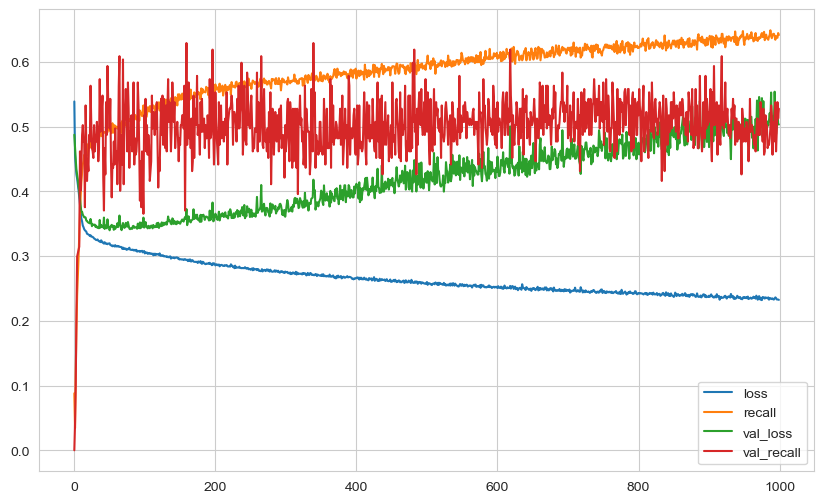

In [107]:
#Plotting the history
loss_df.plot()
plt.show()

In [108]:
#Seeing the evaluation of the model
model.evaluate(X_test, y_test, verbose=0)

[0.5497297644615173, 0.45588234066963196]

In [109]:
#Seeing the loss and the accuracy of the model
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5497297644615173
recall:  0.45588234066963196


In [110]:
#Making y_pred 
y_pred = model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[729  67]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       796
           1       0.58      0.46      0.51       204

    accuracy                           0.82      1000
   macro avg       0.72      0.69      0.70      1000
weighted avg       0.81      0.82      0.81      1000



In [111]:
#Seeing the train score and test scores
eval_metric(model, X_train, y_train, X_test, y_test)

32/32 [==============================] - 0s 1ms/step
Test_Set
[[729  67]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       796
           1       0.58      0.46      0.51       204

    accuracy                           0.82      1000
   macro avg       0.72      0.69      0.70      1000
weighted avg       0.81      0.82      0.81      1000


Train_Set
[[6937  230]
 [ 669 1164]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7167
           1       0.84      0.64      0.72      1833

    accuracy                           0.90      9000
   macro avg       0.87      0.80      0.83      9000
weighted avg       0.90      0.90      0.89      9000



Text(97.72222222222221, 0.5, 'Truth')

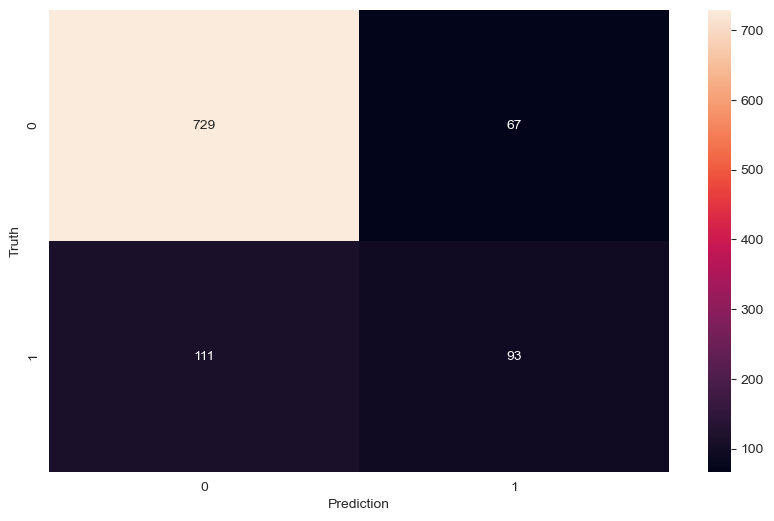

In [112]:
#Seeing the graph of confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

32/32 [==============================] - 0s 1ms/step


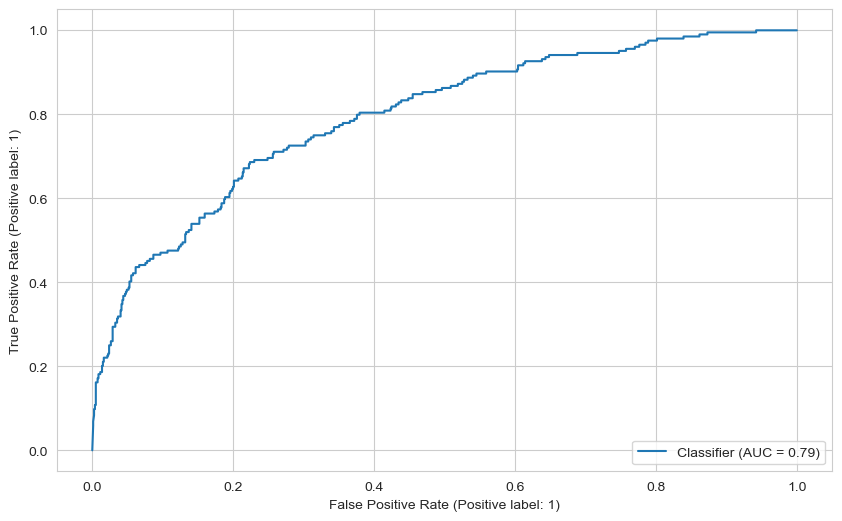

In [113]:
#Seeing the predicted value
y_pred_proba = model.predict(X_test)

#Graphing the predicted values
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [114]:
#The score of the actual to predicted value
roc_auc_score(y_test, y_pred_proba)

0.7944963789535915

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

###### I have searched in Bing to find out about class_weight.
###### I wrote compute_class_weight  in  Neural Network, then find an example about it and use it in my data

### Create The Model

In [115]:
classes = np.unique(y_train) # Get unique classes
class_weights = compute_class_weight('balanced', classes=classes, y=y_train) # Compute weights

#The class weights values 
class_weights
# class_weights = dict(zip(classes, class_weights)) # Convert to dictionary

array([0.62787777, 2.45499182])

In [116]:
#Converting the array to dictionary with numpy
#We can use dict(enumerate()), to convert it to a dictionary
class_weights = dict(enumerate(class_weights))

#Printing it after converting
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [117]:
#First, setting the random seed
tf.random.set_seed(seed)


#Creating the weighted model with Sequential
weighted_model = Sequential()

#Creating the layers
weighted_model.add(Dense(u1, activation='relu', input_dim=X_train.shape[1]))
weighted_model.add(Dense(u2, activation='relu')) #Hidden layer
weighted_model.add(Dense(u3, activation='relu')) #Hidden layer
weighted_model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Compile the layers
weighted_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
#Note, we are using adam optimzer here as it is the best one. we are using binary_crossentropy in the loss because 
# in classification with binary we use binary_crossentropy. Also, we are using accuracy in the metrics becasue we are 
# working with classification 

In [118]:
#Fitting the model, and using the class_weight with it this time
weighted_model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=batch, epochs=1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
203/203 [==============================] - 2s 3ms/step - loss: 0.6503 - recall: 0.4988 - val_loss: 0.6239 - val_recall: 0.7259
Epoch 2/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.6124 - recall: 0.6528 - val_loss: 0.5594 - val_recall: 0.6396
Epoch 3/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5920 - recall: 0.6785 - val_loss: 0.5353 - val_recall: 0.6447
Epoch 4/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5737 - recall: 0.6974 - val_loss: 0.5471 - val_recall: 0.7360
Epoch 5/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5560 - recall: 0.7133 - val_loss: 0.6014 - val_recall: 0.8274
Epoch 6/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5353 - recall: 0.7256 - val_loss: 0.5452 - val_recall: 0.7970
Epoch 7/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5156 - recall: 0.7378 - val_loss: 0.5301 - val_recall: 0.7919
Epoch 8/1000
203/203

203/203 [==============================] - 1s 3ms/step - loss: 0.4323 - recall: 0.7628 - val_loss: 0.4570 - val_recall: 0.8020
Epoch 60/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4316 - recall: 0.7793 - val_loss: 0.4086 - val_recall: 0.7157
Epoch 61/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4324 - recall: 0.7665 - val_loss: 0.4458 - val_recall: 0.7970
Epoch 62/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4323 - recall: 0.7689 - val_loss: 0.4213 - val_recall: 0.7716
Epoch 63/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4300 - recall: 0.7641 - val_loss: 0.4420 - val_recall: 0.7868
Epoch 64/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4328 - recall: 0.7689 - val_loss: 0.4963 - val_recall: 0.8223
Epoch 65/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4303 - recall: 0.7744 - val_loss: 0.5526 - val_recall: 0.8579
Epoch 66/1000
203/203 [====

203/203 [==============================] - 0s 2ms/step - loss: 0.4137 - recall: 0.7830 - val_loss: 0.4820 - val_recall: 0.8173
Epoch 118/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4166 - recall: 0.7800 - val_loss: 0.4954 - val_recall: 0.8223
Epoch 119/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4113 - recall: 0.7861 - val_loss: 0.4261 - val_recall: 0.7614
Epoch 120/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4131 - recall: 0.7842 - val_loss: 0.4004 - val_recall: 0.7208
Epoch 121/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4121 - recall: 0.7861 - val_loss: 0.3928 - val_recall: 0.7005
Epoch 122/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4166 - recall: 0.7842 - val_loss: 0.3782 - val_recall: 0.6447
Epoch 123/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4112 - recall: 0.7836 - val_loss: 0.4417 - val_recall: 0.7817
Epoch 124/1000
203/20

Epoch 175/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3998 - recall: 0.7885 - val_loss: 0.5037 - val_recall: 0.8274
Epoch 176/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3969 - recall: 0.7958 - val_loss: 0.4553 - val_recall: 0.7970
Epoch 177/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4005 - recall: 0.7995 - val_loss: 0.4884 - val_recall: 0.8122
Epoch 178/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3974 - recall: 0.7928 - val_loss: 0.4790 - val_recall: 0.8020
Epoch 179/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4007 - recall: 0.7983 - val_loss: 0.4721 - val_recall: 0.8173
Epoch 180/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4006 - recall: 0.7916 - val_loss: 0.4859 - val_recall: 0.8173
Epoch 181/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3980 - recall: 0.7958 - val_loss: 0.4132 - val_recall: 0.7157
Epoch 

Epoch 233/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.3902 - recall: 0.7940 - val_loss: 0.4913 - val_recall: 0.8071
Epoch 234/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3895 - recall: 0.8007 - val_loss: 0.4765 - val_recall: 0.8071
Epoch 235/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.3901 - recall: 0.7989 - val_loss: 0.4323 - val_recall: 0.7513
Epoch 236/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.3868 - recall: 0.8026 - val_loss: 0.5126 - val_recall: 0.8173
Epoch 237/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3893 - recall: 0.7989 - val_loss: 0.5642 - val_recall: 0.8629
Epoch 238/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3898 - recall: 0.8026 - val_loss: 0.4918 - val_recall: 0.8325
Epoch 239/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3880 - recall: 0.8105 - val_loss: 0.5020 - val_recall: 0.8274
Epoch 

Epoch 291/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3790 - recall: 0.8136 - val_loss: 0.4621 - val_recall: 0.7868
Epoch 292/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3793 - recall: 0.8081 - val_loss: 0.4998 - val_recall: 0.7919
Epoch 293/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3828 - recall: 0.8093 - val_loss: 0.5219 - val_recall: 0.8325
Epoch 294/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3822 - recall: 0.8056 - val_loss: 0.5203 - val_recall: 0.8426
Epoch 295/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3812 - recall: 0.8136 - val_loss: 0.4243 - val_recall: 0.7208
Epoch 296/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3835 - recall: 0.8044 - val_loss: 0.4469 - val_recall: 0.7462
Epoch 297/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3817 - recall: 0.8001 - val_loss: 0.4669 - val_recall: 0.7766
Epoch 

Epoch 349/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3758 - recall: 0.8178 - val_loss: 0.4483 - val_recall: 0.7360
Epoch 350/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3778 - recall: 0.8075 - val_loss: 0.5144 - val_recall: 0.8122
Epoch 351/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3761 - recall: 0.8123 - val_loss: 0.4766 - val_recall: 0.7817
Epoch 352/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3770 - recall: 0.8240 - val_loss: 0.4428 - val_recall: 0.7208
Epoch 353/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3765 - recall: 0.8209 - val_loss: 0.4707 - val_recall: 0.7665
Epoch 354/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.3814 - recall: 0.8032 - val_loss: 0.4651 - val_recall: 0.7665
Epoch 355/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3763 - recall: 0.8111 - val_loss: 0.6135 - val_recall: 0.8731
Epoch 

Epoch 407/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3702 - recall: 0.8148 - val_loss: 0.4942 - val_recall: 0.7970
Epoch 408/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3720 - recall: 0.8178 - val_loss: 0.4704 - val_recall: 0.7716
Epoch 409/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3690 - recall: 0.8191 - val_loss: 0.4267 - val_recall: 0.6853
Epoch 410/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3702 - recall: 0.8191 - val_loss: 0.4390 - val_recall: 0.7107
Epoch 411/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.3714 - recall: 0.8246 - val_loss: 0.4786 - val_recall: 0.7716
Epoch 412/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3723 - recall: 0.8166 - val_loss: 0.5400 - val_recall: 0.8376
Epoch 413/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3703 - recall: 0.8227 - val_loss: 0.4865 - val_recall: 0.7817
Epoch 

Epoch 465/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.3685 - recall: 0.8197 - val_loss: 0.5360 - val_recall: 0.8122
Epoch 466/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3659 - recall: 0.8178 - val_loss: 0.5244 - val_recall: 0.8122
Epoch 467/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3713 - recall: 0.8123 - val_loss: 0.4405 - val_recall: 0.7157
Epoch 468/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.3671 - recall: 0.8233 - val_loss: 0.4848 - val_recall: 0.7716
Epoch 469/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.3673 - recall: 0.8258 - val_loss: 0.4347 - val_recall: 0.7056
Epoch 470/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3664 - recall: 0.8172 - val_loss: 0.5269 - val_recall: 0.8020
Epoch 471/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.3686 - recall: 0.8178 - val_loss: 0.4819 - val_recall: 0.7716
Epoch 

Epoch 523/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.3633 - recall: 0.8252 - val_loss: 0.4678 - val_recall: 0.7411
Epoch 524/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3659 - recall: 0.8233 - val_loss: 0.5247 - val_recall: 0.8223
Epoch 525/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3655 - recall: 0.8264 - val_loss: 0.4550 - val_recall: 0.7411
Epoch 526/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3644 - recall: 0.8178 - val_loss: 0.4608 - val_recall: 0.7259
Epoch 527/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3619 - recall: 0.8209 - val_loss: 0.4928 - val_recall: 0.7868
Epoch 528/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3641 - recall: 0.8313 - val_loss: 0.5567 - val_recall: 0.8376
Epoch 529/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3622 - recall: 0.8221 - val_loss: 0.4861 - val_recall: 0.7817
Epoch 

Epoch 581/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3597 - recall: 0.8215 - val_loss: 0.5974 - val_recall: 0.8426
Epoch 582/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3610 - recall: 0.8233 - val_loss: 0.4622 - val_recall: 0.7259
Epoch 583/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3579 - recall: 0.8392 - val_loss: 0.4705 - val_recall: 0.7563
Epoch 584/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3612 - recall: 0.8301 - val_loss: 0.5377 - val_recall: 0.7716
Epoch 585/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3598 - recall: 0.8258 - val_loss: 0.4800 - val_recall: 0.7462
Epoch 586/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3593 - recall: 0.8289 - val_loss: 0.4488 - val_recall: 0.7259
Epoch 587/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3557 - recall: 0.8282 - val_loss: 0.4566 - val_recall: 0.7259
Epoch 

Epoch 639/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3554 - recall: 0.8337 - val_loss: 0.5874 - val_recall: 0.8274
Epoch 640/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3592 - recall: 0.8344 - val_loss: 0.5292 - val_recall: 0.8071
Epoch 641/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3611 - recall: 0.8289 - val_loss: 0.4785 - val_recall: 0.7462
Epoch 642/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3564 - recall: 0.8301 - val_loss: 0.4666 - val_recall: 0.7360
Epoch 643/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3567 - recall: 0.8319 - val_loss: 0.4658 - val_recall: 0.7360
Epoch 644/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3558 - recall: 0.8276 - val_loss: 0.4736 - val_recall: 0.7259
Epoch 645/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3561 - recall: 0.8282 - val_loss: 0.4812 - val_recall: 0.7817
Epoch 

Epoch 697/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3547 - recall: 0.8307 - val_loss: 0.4718 - val_recall: 0.7360
Epoch 698/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3554 - recall: 0.8301 - val_loss: 0.4844 - val_recall: 0.7462
Epoch 699/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3535 - recall: 0.8362 - val_loss: 0.4913 - val_recall: 0.7513
Epoch 700/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3549 - recall: 0.8344 - val_loss: 0.5615 - val_recall: 0.7919
Epoch 701/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3571 - recall: 0.8325 - val_loss: 0.4665 - val_recall: 0.7208
Epoch 702/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3518 - recall: 0.8411 - val_loss: 0.5857 - val_recall: 0.8122
Epoch 703/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3564 - recall: 0.8325 - val_loss: 0.5000 - val_recall: 0.7462
Epoch 

Epoch 755/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3503 - recall: 0.8368 - val_loss: 0.5161 - val_recall: 0.7716
Epoch 756/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3506 - recall: 0.8386 - val_loss: 0.5235 - val_recall: 0.7868
Epoch 757/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3508 - recall: 0.8313 - val_loss: 0.4807 - val_recall: 0.7259
Epoch 758/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3513 - recall: 0.8368 - val_loss: 0.4539 - val_recall: 0.7056
Epoch 759/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3532 - recall: 0.8252 - val_loss: 0.4954 - val_recall: 0.7665
Epoch 760/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3502 - recall: 0.8331 - val_loss: 0.4710 - val_recall: 0.7411
Epoch 761/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3522 - recall: 0.8392 - val_loss: 0.4452 - val_recall: 0.6904
Epoch 

Epoch 813/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3472 - recall: 0.8411 - val_loss: 0.4847 - val_recall: 0.7462
Epoch 814/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3516 - recall: 0.8313 - val_loss: 0.4813 - val_recall: 0.7360
Epoch 815/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3513 - recall: 0.8429 - val_loss: 0.4222 - val_recall: 0.6396
Epoch 816/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3541 - recall: 0.8331 - val_loss: 0.5146 - val_recall: 0.7563
Epoch 817/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3494 - recall: 0.8405 - val_loss: 0.5316 - val_recall: 0.7970
Epoch 818/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3468 - recall: 0.8350 - val_loss: 0.5210 - val_recall: 0.7665
Epoch 819/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3488 - recall: 0.8325 - val_loss: 0.4827 - val_recall: 0.7208
Epoch 

Epoch 871/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.3424 - recall: 0.8386 - val_loss: 0.4570 - val_recall: 0.6954
Epoch 872/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3449 - recall: 0.8454 - val_loss: 0.5176 - val_recall: 0.7462
Epoch 873/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3486 - recall: 0.8405 - val_loss: 0.5083 - val_recall: 0.7360
Epoch 874/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3467 - recall: 0.8417 - val_loss: 0.5098 - val_recall: 0.7665
Epoch 875/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3478 - recall: 0.8356 - val_loss: 0.4655 - val_recall: 0.6701
Epoch 876/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3487 - recall: 0.8344 - val_loss: 0.4712 - val_recall: 0.7310
Epoch 877/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3439 - recall: 0.8454 - val_loss: 0.5232 - val_recall: 0.7716
Epoch 

Epoch 929/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3470 - recall: 0.8380 - val_loss: 0.4744 - val_recall: 0.7157
Epoch 930/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3416 - recall: 0.8423 - val_loss: 0.4718 - val_recall: 0.7157
Epoch 931/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3413 - recall: 0.8392 - val_loss: 0.4954 - val_recall: 0.7259
Epoch 932/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3430 - recall: 0.8509 - val_loss: 0.5270 - val_recall: 0.7716
Epoch 933/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3450 - recall: 0.8496 - val_loss: 0.4815 - val_recall: 0.7259
Epoch 934/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3432 - recall: 0.8484 - val_loss: 0.4598 - val_recall: 0.6751
Epoch 935/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3477 - recall: 0.8392 - val_loss: 0.4748 - val_recall: 0.7259
Epoch 

Epoch 987/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3430 - recall: 0.8460 - val_loss: 0.4944 - val_recall: 0.7259
Epoch 988/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.3431 - recall: 0.8441 - val_loss: 0.5117 - val_recall: 0.7513
Epoch 989/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3430 - recall: 0.8490 - val_loss: 0.4926 - val_recall: 0.7208
Epoch 990/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3398 - recall: 0.8331 - val_loss: 0.4904 - val_recall: 0.7360
Epoch 991/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3406 - recall: 0.8490 - val_loss: 0.5203 - val_recall: 0.7513
Epoch 992/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3390 - recall: 0.8484 - val_loss: 0.5340 - val_recall: 0.7665
Epoch 993/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.3406 - recall: 0.8386 - val_loss: 0.5073 - val_recall: 0.7360
Epoch 

In [119]:
#Seeing the summary of weighted_model
weighted_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                448       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [120]:
#Let's see the history of the weighted_model
weighted_model.history.history

{'loss': [0.650331974029541,
  0.6123514771461487,
  0.5920175909996033,
  0.5737435817718506,
  0.555980920791626,
  0.5353090167045593,
  0.515595555305481,
  0.4998290240764618,
  0.4891691505908966,
  0.48386380076408386,
  0.47689205408096313,
  0.474374383687973,
  0.46920475363731384,
  0.46843117475509644,
  0.46664857864379883,
  0.4654410779476166,
  0.46408796310424805,
  0.46054762601852417,
  0.4575301706790924,
  0.4558846652507782,
  0.4570455551147461,
  0.45566803216934204,
  0.4540961682796478,
  0.45305556058883667,
  0.45413458347320557,
  0.45357173681259155,
  0.45263707637786865,
  0.4509006142616272,
  0.4500918984413147,
  0.44919970631599426,
  0.44624844193458557,
  0.44594311714172363,
  0.4477621018886566,
  0.44673579931259155,
  0.4447893798351288,
  0.44262945652008057,
  0.44336655735969543,
  0.44258758425712585,
  0.44578438997268677,
  0.44110941886901855,
  0.4409981369972229,
  0.4402228891849518,
  0.4378852844238281,
  0.4396524131298065,
  0.438

In [121]:
#Creating a dataframe from the history of the weighted_model to be able to plot it
loss_df_weighted = pd.DataFrame(weighted_model.history.history)
loss_df_weighted.head()

loss  recall  val_loss  val_recall
0 0.650   0.499     0.624       0.726
1 0.612   0.653     0.559       0.640
2 0.592   0.678     0.535       0.645
3 0.574   0.697     0.547       0.736
4 0.556   0.713     0.601       0.827

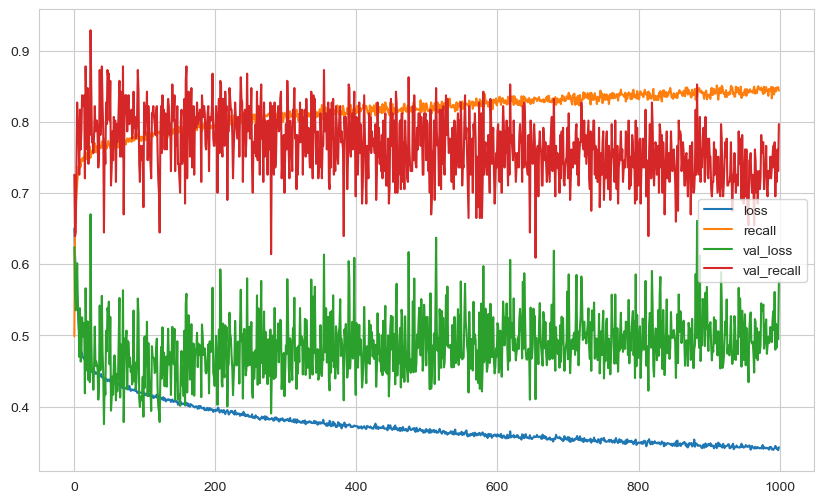

In [122]:
#Plotting the history
loss_df_weighted.plot()
plt.show()

In [123]:
#Seeing the evaluation of the weighted_model
weighted_model.evaluate(X_test, y_test, verbose=0)

[0.7011257410049438, 0.6715686321258545]

In [124]:
#Seeing the loss and the accuracy of the weighted_model
loss, accuracy = weighted_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.7011257410049438
accuracy:  0.6715686321258545


In [125]:
#Making y_pred 
y_pred = weighted_model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[581 215]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       796
           1       0.39      0.67      0.49       204

    accuracy                           0.72      1000
   macro avg       0.64      0.70      0.65      1000
weighted avg       0.79      0.72      0.74      1000



In [126]:
#Seeing the train score and test scores
eval_metric(weighted_model, X_train, y_train, X_test, y_test)

32/32 [==============================] - 0s 1ms/step
Test_Set
[[581 215]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       796
           1       0.39      0.67      0.49       204

    accuracy                           0.72      1000
   macro avg       0.64      0.70      0.65      1000
weighted avg       0.79      0.72      0.74      1000


Train_Set
[[5616 1551]
 [ 205 1628]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      7167
           1       0.51      0.89      0.65      1833

    accuracy                           0.80      9000
   macro avg       0.74      0.84      0.76      9000
weighted avg       0.87      0.80      0.82      9000



Text(97.72222222222221, 0.5, 'Truth')

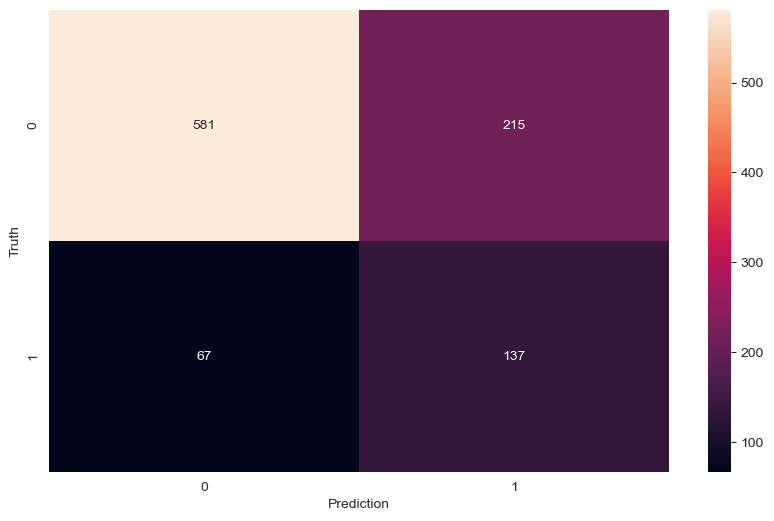

In [127]:
#Seeing the graph of confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

32/32 [==============================] - 0s 2ms/step


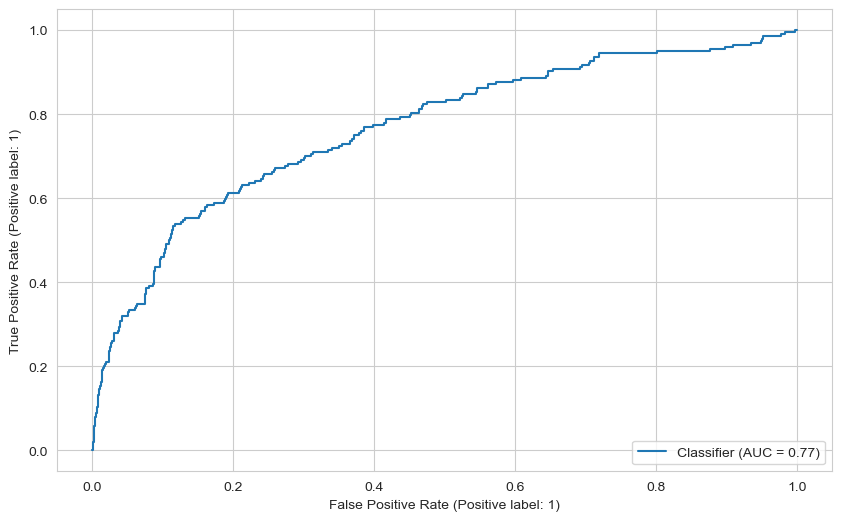

In [128]:
#Seeing the predicted value
y_pred_proba = weighted_model.predict(X_test)

#Graphing the predicted values
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [129]:
#The score of the actual to predicted value
roc_auc_score(y_test, y_pred_proba)

0.7672307616513943

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [130]:
#First, setting the random seed
tf.random.set_seed(seed)


#Creating the model with Sequential
lr_model = Sequential()

#Creating the layers
lr_model.add(Dense(u1, activation='relu', input_dim=X_train.shape[1]))
lr_model.add(Dense(u2, activation='relu')) #Hidden layer
lr_model.add(Dense(u3, activation='relu')) #Hidden layer
lr_model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Increasing the learning rate
adam = Adam(learning_rate=0.03)

#Compile the layers
lr_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['Recall'])

In [131]:
#Fitting the model, and using the class_weight with it this time
lr_model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=batch, epochs=1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
203/203 [==============================] - 2s 3ms/step - loss: 0.6291 - recall: 0.5966 - val_loss: 0.7534 - val_recall: 0.8629
Epoch 2/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5857 - recall: 0.6443 - val_loss: 0.5525 - val_recall: 0.6954
Epoch 3/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5599 - recall: 0.6736 - val_loss: 0.5428 - val_recall: 0.7563
Epoch 4/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5312 - recall: 0.6913 - val_loss: 0.5122 - val_recall: 0.7259
Epoch 5/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5174 - recall: 0.7023 - val_loss: 0.4724 - val_recall: 0.7360
Epoch 6/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4973 - recall: 0.7243 - val_loss: 0.5065 - val_recall: 0.7665
Epoch 7/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4883 - recall: 0.7127 - val_loss: 0.4910 - val_recall: 0.6345
Epoch 8/1000
203/203

203/203 [==============================] - 1s 3ms/step - loss: 0.4711 - recall: 0.7158 - val_loss: 0.4463 - val_recall: 0.7360
Epoch 60/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4653 - recall: 0.7366 - val_loss: 0.4749 - val_recall: 0.7310
Epoch 61/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4687 - recall: 0.7121 - val_loss: 0.4859 - val_recall: 0.8122
Epoch 62/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4700 - recall: 0.7231 - val_loss: 0.4231 - val_recall: 0.6599
Epoch 63/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4719 - recall: 0.7176 - val_loss: 0.4539 - val_recall: 0.7614
Epoch 64/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4708 - recall: 0.7164 - val_loss: 0.6102 - val_recall: 0.8832
Epoch 65/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4693 - recall: 0.7237 - val_loss: 0.5923 - val_recall: 0.8782
Epoch 66/1000
203/203 [====

203/203 [==============================] - 1s 3ms/step - loss: 0.4656 - recall: 0.7445 - val_loss: 0.4806 - val_recall: 0.7563
Epoch 118/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4684 - recall: 0.7329 - val_loss: 0.4873 - val_recall: 0.7766
Epoch 119/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4685 - recall: 0.7335 - val_loss: 0.4518 - val_recall: 0.7462
Epoch 120/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4695 - recall: 0.7268 - val_loss: 0.4182 - val_recall: 0.7005
Epoch 121/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4637 - recall: 0.7304 - val_loss: 0.4466 - val_recall: 0.7157
Epoch 122/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4682 - recall: 0.7329 - val_loss: 0.4575 - val_recall: 0.7157
Epoch 123/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4640 - recall: 0.7506 - val_loss: 0.5099 - val_recall: 0.8325
Epoch 124/1000
203/20

Epoch 175/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4657 - recall: 0.7268 - val_loss: 0.4351 - val_recall: 0.7208
Epoch 176/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4623 - recall: 0.7396 - val_loss: 0.5151 - val_recall: 0.8477
Epoch 177/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4641 - recall: 0.7378 - val_loss: 0.5182 - val_recall: 0.7817
Epoch 178/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4633 - recall: 0.7182 - val_loss: 0.4927 - val_recall: 0.7919
Epoch 179/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4652 - recall: 0.7329 - val_loss: 0.4317 - val_recall: 0.6751
Epoch 180/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4699 - recall: 0.7329 - val_loss: 0.5147 - val_recall: 0.7970
Epoch 181/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4636 - recall: 0.7194 - val_loss: 0.5398 - val_recall: 0.8426
Epoch 

Epoch 233/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4670 - recall: 0.7188 - val_loss: 0.5156 - val_recall: 0.7716
Epoch 234/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4652 - recall: 0.7427 - val_loss: 0.5541 - val_recall: 0.8274
Epoch 235/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4682 - recall: 0.7329 - val_loss: 0.4137 - val_recall: 0.6244
Epoch 236/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4640 - recall: 0.7286 - val_loss: 0.5288 - val_recall: 0.8274
Epoch 237/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4673 - recall: 0.7329 - val_loss: 0.4775 - val_recall: 0.7614
Epoch 238/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4709 - recall: 0.7274 - val_loss: 0.5199 - val_recall: 0.8020
Epoch 239/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4622 - recall: 0.7323 - val_loss: 0.4705 - val_recall: 0.7817
Epoch 

Epoch 291/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4607 - recall: 0.7408 - val_loss: 0.4281 - val_recall: 0.7107
Epoch 292/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4656 - recall: 0.7256 - val_loss: 0.5106 - val_recall: 0.7970
Epoch 293/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4626 - recall: 0.7292 - val_loss: 0.4629 - val_recall: 0.7766
Epoch 294/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4633 - recall: 0.7335 - val_loss: 0.4997 - val_recall: 0.7970
Epoch 295/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4621 - recall: 0.7347 - val_loss: 0.4268 - val_recall: 0.7157
Epoch 296/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4674 - recall: 0.7256 - val_loss: 0.4054 - val_recall: 0.6294
Epoch 297/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4631 - recall: 0.7366 - val_loss: 0.4722 - val_recall: 0.7817
Epoch 

Epoch 349/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4682 - recall: 0.7213 - val_loss: 0.4287 - val_recall: 0.7157
Epoch 350/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4663 - recall: 0.7231 - val_loss: 0.4791 - val_recall: 0.7970
Epoch 351/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4611 - recall: 0.7304 - val_loss: 0.4230 - val_recall: 0.7056
Epoch 352/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4673 - recall: 0.7329 - val_loss: 0.4217 - val_recall: 0.6802
Epoch 353/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4635 - recall: 0.7292 - val_loss: 0.4013 - val_recall: 0.6294
Epoch 354/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4720 - recall: 0.7237 - val_loss: 0.4226 - val_recall: 0.6954
Epoch 355/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4623 - recall: 0.7408 - val_loss: 0.5367 - val_recall: 0.8223
Epoch 

Epoch 407/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4641 - recall: 0.7372 - val_loss: 0.5106 - val_recall: 0.8223
Epoch 408/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4603 - recall: 0.7274 - val_loss: 0.4473 - val_recall: 0.7462
Epoch 409/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4605 - recall: 0.7384 - val_loss: 0.4752 - val_recall: 0.7970
Epoch 410/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4609 - recall: 0.7421 - val_loss: 0.4567 - val_recall: 0.7766
Epoch 411/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4646 - recall: 0.7402 - val_loss: 0.4431 - val_recall: 0.7614
Epoch 412/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4696 - recall: 0.7280 - val_loss: 0.4937 - val_recall: 0.8122
Epoch 413/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4694 - recall: 0.7304 - val_loss: 0.4297 - val_recall: 0.7157
Epoch 

Epoch 465/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4625 - recall: 0.7335 - val_loss: 0.5264 - val_recall: 0.8477
Epoch 466/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4627 - recall: 0.7396 - val_loss: 0.5138 - val_recall: 0.8274
Epoch 467/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4615 - recall: 0.7482 - val_loss: 0.4299 - val_recall: 0.7411
Epoch 468/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4587 - recall: 0.7414 - val_loss: 0.4710 - val_recall: 0.8020
Epoch 469/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4609 - recall: 0.7457 - val_loss: 0.4040 - val_recall: 0.6802
Epoch 470/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4594 - recall: 0.7329 - val_loss: 0.5693 - val_recall: 0.8629
Epoch 471/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4634 - recall: 0.7402 - val_loss: 0.4925 - val_recall: 0.8122
Epoch 

Epoch 523/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4622 - recall: 0.7433 - val_loss: 0.4258 - val_recall: 0.6954
Epoch 524/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4606 - recall: 0.7445 - val_loss: 0.4325 - val_recall: 0.7259
Epoch 525/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4580 - recall: 0.7359 - val_loss: 0.4263 - val_recall: 0.6853
Epoch 526/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4603 - recall: 0.7396 - val_loss: 0.4681 - val_recall: 0.7766
Epoch 527/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4615 - recall: 0.7347 - val_loss: 0.4977 - val_recall: 0.8173
Epoch 528/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4641 - recall: 0.7347 - val_loss: 0.4505 - val_recall: 0.7716
Epoch 529/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4591 - recall: 0.7402 - val_loss: 0.4354 - val_recall: 0.7462
Epoch 

Epoch 581/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4616 - recall: 0.7390 - val_loss: 0.6080 - val_recall: 0.8680
Epoch 582/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4600 - recall: 0.7390 - val_loss: 0.5589 - val_recall: 0.8579
Epoch 583/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4597 - recall: 0.7457 - val_loss: 0.4436 - val_recall: 0.7614
Epoch 584/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4605 - recall: 0.7390 - val_loss: 0.4414 - val_recall: 0.7513
Epoch 585/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4639 - recall: 0.7347 - val_loss: 0.4189 - val_recall: 0.6193
Epoch 586/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4612 - recall: 0.7317 - val_loss: 0.4916 - val_recall: 0.8325
Epoch 587/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4569 - recall: 0.7476 - val_loss: 0.4347 - val_recall: 0.7157
Epoch 

Epoch 639/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4679 - recall: 0.7341 - val_loss: 0.5322 - val_recall: 0.8528
Epoch 640/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4656 - recall: 0.7298 - val_loss: 0.4946 - val_recall: 0.8274
Epoch 641/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4631 - recall: 0.7304 - val_loss: 0.4855 - val_recall: 0.8173
Epoch 642/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4581 - recall: 0.7421 - val_loss: 0.4326 - val_recall: 0.7310
Epoch 643/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4612 - recall: 0.7433 - val_loss: 0.4151 - val_recall: 0.6599
Epoch 644/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4640 - recall: 0.7298 - val_loss: 0.4200 - val_recall: 0.6954
Epoch 645/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4590 - recall: 0.7421 - val_loss: 0.4185 - val_recall: 0.7056
Epoch 

Epoch 697/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4601 - recall: 0.7433 - val_loss: 0.4995 - val_recall: 0.8223
Epoch 698/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4607 - recall: 0.7445 - val_loss: 0.4645 - val_recall: 0.8173
Epoch 699/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4600 - recall: 0.7457 - val_loss: 0.4228 - val_recall: 0.6954
Epoch 700/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4636 - recall: 0.7494 - val_loss: 0.4994 - val_recall: 0.8325
Epoch 701/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4596 - recall: 0.7427 - val_loss: 0.4395 - val_recall: 0.7614
Epoch 702/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4609 - recall: 0.7384 - val_loss: 0.5315 - val_recall: 0.8629
Epoch 703/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4592 - recall: 0.7353 - val_loss: 0.4532 - val_recall: 0.7919
Epoch 

Epoch 755/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4589 - recall: 0.7500 - val_loss: 0.4471 - val_recall: 0.7919
Epoch 756/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4580 - recall: 0.7347 - val_loss: 0.5251 - val_recall: 0.8579
Epoch 757/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4572 - recall: 0.7396 - val_loss: 0.4514 - val_recall: 0.7766
Epoch 758/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4630 - recall: 0.7402 - val_loss: 0.4502 - val_recall: 0.7665
Epoch 759/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4659 - recall: 0.7335 - val_loss: 0.4236 - val_recall: 0.7056
Epoch 760/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4644 - recall: 0.7366 - val_loss: 0.4597 - val_recall: 0.7360
Epoch 761/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4554 - recall: 0.7463 - val_loss: 0.4411 - val_recall: 0.7766
Epoch 

Epoch 813/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4611 - recall: 0.7384 - val_loss: 0.4014 - val_recall: 0.6345
Epoch 814/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4687 - recall: 0.7366 - val_loss: 0.4429 - val_recall: 0.7411
Epoch 815/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4602 - recall: 0.7421 - val_loss: 0.3979 - val_recall: 0.6294
Epoch 816/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4608 - recall: 0.7329 - val_loss: 0.5592 - val_recall: 0.8528
Epoch 817/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4670 - recall: 0.7341 - val_loss: 0.5113 - val_recall: 0.8223
Epoch 818/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4571 - recall: 0.7390 - val_loss: 0.4812 - val_recall: 0.8071
Epoch 819/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4650 - recall: 0.7414 - val_loss: 0.4494 - val_recall: 0.7665
Epoch 

Epoch 871/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4566 - recall: 0.7482 - val_loss: 0.4663 - val_recall: 0.7817
Epoch 872/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4600 - recall: 0.7396 - val_loss: 0.4633 - val_recall: 0.7766
Epoch 873/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4608 - recall: 0.7543 - val_loss: 0.4490 - val_recall: 0.7614
Epoch 874/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4573 - recall: 0.7549 - val_loss: 0.4777 - val_recall: 0.8020
Epoch 875/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4619 - recall: 0.7335 - val_loss: 0.4399 - val_recall: 0.7259
Epoch 876/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4671 - recall: 0.7427 - val_loss: 0.4005 - val_recall: 0.6142
Epoch 877/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4576 - recall: 0.7451 - val_loss: 0.5099 - val_recall: 0.8376
Epoch 

Epoch 929/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4588 - recall: 0.7488 - val_loss: 0.4333 - val_recall: 0.7462
Epoch 930/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4602 - recall: 0.7439 - val_loss: 0.4463 - val_recall: 0.7817
Epoch 931/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4619 - recall: 0.7366 - val_loss: 0.5527 - val_recall: 0.8680
Epoch 932/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4659 - recall: 0.7433 - val_loss: 0.5040 - val_recall: 0.8325
Epoch 933/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4578 - recall: 0.7359 - val_loss: 0.4534 - val_recall: 0.7766
Epoch 934/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4596 - recall: 0.7408 - val_loss: 0.4004 - val_recall: 0.6294
Epoch 935/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4570 - recall: 0.7537 - val_loss: 0.4317 - val_recall: 0.7411
Epoch 

Epoch 987/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4598 - recall: 0.7402 - val_loss: 0.4536 - val_recall: 0.7919
Epoch 988/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4600 - recall: 0.7482 - val_loss: 0.5075 - val_recall: 0.8426
Epoch 989/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4640 - recall: 0.7463 - val_loss: 0.5998 - val_recall: 0.8731
Epoch 990/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4605 - recall: 0.7439 - val_loss: 0.4727 - val_recall: 0.7868
Epoch 991/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4583 - recall: 0.7476 - val_loss: 0.4357 - val_recall: 0.7614
Epoch 992/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4588 - recall: 0.7482 - val_loss: 0.4860 - val_recall: 0.8528
Epoch 993/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4606 - recall: 0.7457 - val_loss: 0.5691 - val_recall: 0.8782
Epoch 

In [132]:
#The summary of the model
lr_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                448       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model with learning rate

In [133]:
#Let's see the history of the model with learning rate
lr_model.history.history

{'loss': [0.6290643215179443,
  0.5857031345367432,
  0.5598887205123901,
  0.5312201976776123,
  0.5174053311347961,
  0.49728313088417053,
  0.48826074600219727,
  0.4823908805847168,
  0.486042320728302,
  0.48639264702796936,
  0.47769391536712646,
  0.4812968969345093,
  0.4788777530193329,
  0.4784727692604065,
  0.4771205484867096,
  0.47630617022514343,
  0.47662848234176636,
  0.4730113744735718,
  0.4726110100746155,
  0.4752788841724396,
  0.4832637310028076,
  0.4814535677433014,
  0.4741601347923279,
  0.4756806492805481,
  0.47463542222976685,
  0.47109636664390564,
  0.47419482469558716,
  0.47710204124450684,
  0.47238603234291077,
  0.47423791885375977,
  0.47494468092918396,
  0.47254055738449097,
  0.47382107377052307,
  0.47533681988716125,
  0.47196319699287415,
  0.4711815118789673,
  0.4703506827354431,
  0.4693896472454071,
  0.4729804992675781,
  0.4728612005710602,
  0.47162026166915894,
  0.47626957297325134,
  0.4695926606655121,
  0.46735820174217224,
  0.4

In [134]:
#Creating a dataframe from the history of the model with learning rate to be able to plot it
loss_df_lr = pd.DataFrame(lr_model.history.history)
loss_df_lr.head()

loss  recall  val_loss  val_recall
0 0.629   0.597     0.753       0.863
1 0.586   0.644     0.552       0.695
2 0.560   0.674     0.543       0.756
3 0.531   0.691     0.512       0.726
4 0.517   0.702     0.472       0.736

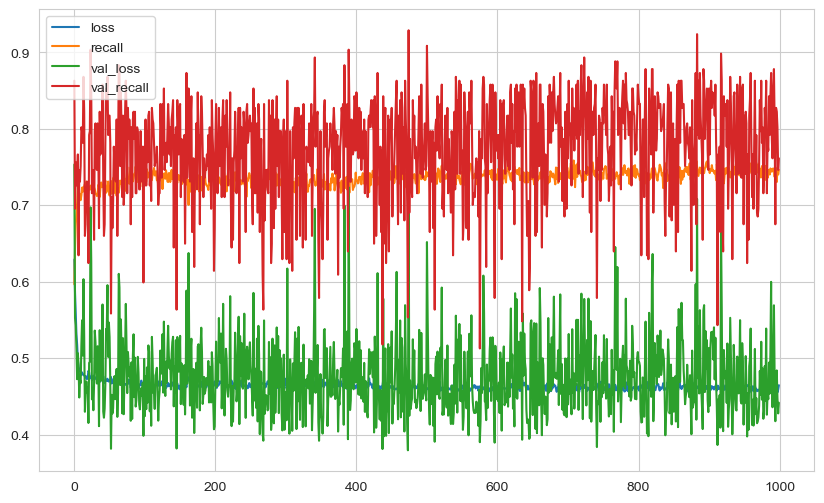

In [135]:
#Plotting the history
loss_df_lr.plot()
plt.show()
#As we can see from the graph, after increasing the learning rate, it seems that the model is screaming

In [136]:
#Seeing the evaluation of the model with learning rate
lr_model.evaluate(X_test, y_test, verbose=0)

[0.4566158652305603, 0.7058823704719543]

In [137]:
#Seeing the loss and the accuracy of the model with learning ratel
loss, recall = lr_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4566158652305603
recall:  0.7058823704719543


In [138]:
#Making y_pred 
y_pred = lr_model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[640 156]
 [ 60 144]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.86       796
           1       0.48      0.71      0.57       204

    accuracy                           0.78      1000
   macro avg       0.70      0.75      0.71      1000
weighted avg       0.83      0.78      0.80      1000



In [139]:
#Seeing the train score and test scores
eval_metric(lr_model, X_train, y_train, X_test, y_test)
#From the scores, we can see that there is no overfitting, but the scores are so good

32/32 [==============================] - 0s 1ms/step
Test_Set
[[640 156]
 [ 60 144]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.86       796
           1       0.48      0.71      0.57       204

    accuracy                           0.78      1000
   macro avg       0.70      0.75      0.71      1000
weighted avg       0.83      0.78      0.80      1000


Train_Set
[[5881 1286]
 [ 479 1354]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      7167
           1       0.51      0.74      0.61      1833

    accuracy                           0.80      9000
   macro avg       0.72      0.78      0.74      9000
weighted avg       0.84      0.80      0.82      9000



Text(97.72222222222221, 0.5, 'Truth')

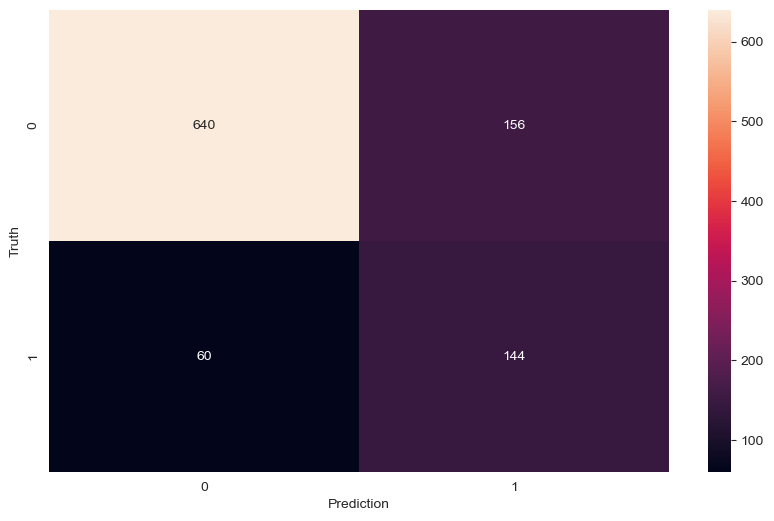

In [140]:
#Seeing the graph of confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

32/32 [==============================] - 0s 1ms/step


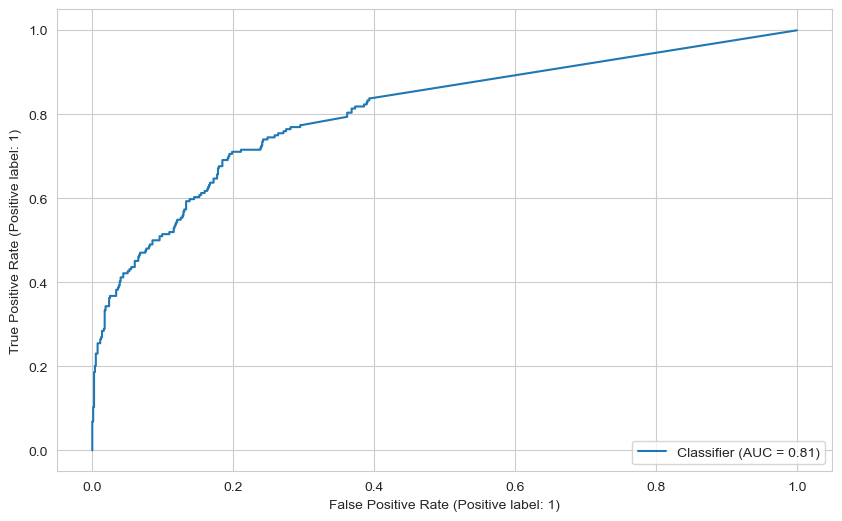

In [141]:
#Seeing the predicted value
y_pred_proba = lr_model.predict(X_test)

#Graphing the predicted values
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [142]:
#The score of the actual to predicted value
roc_auc_score(y_test, y_pred_proba)

0.8061847226327716

### Add Dropout Layer

In [143]:
#The value of dropout 
d = 0.4

In [144]:
#First, setting the random seed
tf.random.set_seed(seed)

#Creating the weighted model with Sequential
dro_model = Sequential()

#Creating the layers
dro_model.add(Dense(u1, activation='relu', input_dim=X_train.shape[1]))
#Adding the dropout layer
#Note, we only add dropout layer to the hidden layers not the output layer
dro_model.add(Dropout(d))

dro_model.add(Dense(u2, activation='relu')) #Hidden layer
#Adding the dropout layer
dro_model.add(Dropout(d))

dro_model.add(Dense(u3, activation='relu')) #Hidden layer
#Adding the dropout layer
dro_model.add(Dropout(d))

dro_model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Increasing the learning rate
adam = Adam(learning_rate=0.001)

#Compile the layers
dro_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['Recall'])

In [145]:
#Fitting the model which we used dropout with it
dro_model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=batch, epochs=1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
203/203 [==============================] - 2s 3ms/step - loss: 0.7097 - recall: 0.5104 - val_loss: 0.6826 - val_recall: 0.6751
Epoch 2/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6864 - recall: 0.6540 - val_loss: 0.6765 - val_recall: 0.6599
Epoch 3/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.6730 - recall: 0.6650 - val_loss: 0.6661 - val_recall: 0.6447
Epoch 4/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.6662 - recall: 0.6351 - val_loss: 0.6379 - val_recall: 0.5787
Epoch 5/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.6628 - recall: 0.6009 - val_loss: 0.6313 - val_recall: 0.6396
Epoch 6/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6462 - recall: 0.6100 - val_loss: 0.6154 - val_recall: 0.6497
Epoch 7/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6375 - recall: 0.6100 - val_loss: 0.6256 - val_recall: 0.7462
Epoch 8/1000
203/203

203/203 [==============================] - 0s 2ms/step - loss: 0.5159 - recall: 0.7402 - val_loss: 0.4610 - val_recall: 0.7665
Epoch 60/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5133 - recall: 0.7298 - val_loss: 0.4945 - val_recall: 0.7868
Epoch 61/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5044 - recall: 0.7127 - val_loss: 0.5017 - val_recall: 0.8426
Epoch 62/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5135 - recall: 0.7256 - val_loss: 0.4553 - val_recall: 0.7563
Epoch 63/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5133 - recall: 0.7274 - val_loss: 0.4732 - val_recall: 0.7563
Epoch 64/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5119 - recall: 0.7164 - val_loss: 0.5053 - val_recall: 0.8325
Epoch 65/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5077 - recall: 0.7054 - val_loss: 0.5229 - val_recall: 0.8376
Epoch 66/1000
203/203 [====

203/203 [==============================] - 1s 3ms/step - loss: 0.4915 - recall: 0.7194 - val_loss: 0.5240 - val_recall: 0.8223
Epoch 118/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4999 - recall: 0.7280 - val_loss: 0.4832 - val_recall: 0.8020
Epoch 119/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5024 - recall: 0.7335 - val_loss: 0.4652 - val_recall: 0.7411
Epoch 120/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5075 - recall: 0.7109 - val_loss: 0.4453 - val_recall: 0.7259
Epoch 121/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4986 - recall: 0.7200 - val_loss: 0.4986 - val_recall: 0.7919
Epoch 122/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4990 - recall: 0.7378 - val_loss: 0.4689 - val_recall: 0.7208
Epoch 123/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4973 - recall: 0.7274 - val_loss: 0.4740 - val_recall: 0.7766
Epoch 124/1000
203/20

Epoch 175/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4946 - recall: 0.7219 - val_loss: 0.4844 - val_recall: 0.7868
Epoch 176/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4971 - recall: 0.7231 - val_loss: 0.4821 - val_recall: 0.8122
Epoch 177/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4956 - recall: 0.7243 - val_loss: 0.4788 - val_recall: 0.8122
Epoch 178/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4988 - recall: 0.7335 - val_loss: 0.4340 - val_recall: 0.7056
Epoch 179/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4961 - recall: 0.7280 - val_loss: 0.4836 - val_recall: 0.8071
Epoch 180/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4924 - recall: 0.7182 - val_loss: 0.4644 - val_recall: 0.7919
Epoch 181/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4960 - recall: 0.7402 - val_loss: 0.5007 - val_recall: 0.8173
Epoch 

Epoch 233/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4961 - recall: 0.7207 - val_loss: 0.4901 - val_recall: 0.7919
Epoch 234/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4917 - recall: 0.7158 - val_loss: 0.4715 - val_recall: 0.7259
Epoch 235/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4882 - recall: 0.7249 - val_loss: 0.4773 - val_recall: 0.7868
Epoch 236/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4993 - recall: 0.7145 - val_loss: 0.4935 - val_recall: 0.8020
Epoch 237/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4937 - recall: 0.7274 - val_loss: 0.4899 - val_recall: 0.7563
Epoch 238/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4947 - recall: 0.7133 - val_loss: 0.5126 - val_recall: 0.8376
Epoch 239/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4892 - recall: 0.7292 - val_loss: 0.4768 - val_recall: 0.8020
Epoch 

Epoch 291/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4951 - recall: 0.7225 - val_loss: 0.4677 - val_recall: 0.7766
Epoch 292/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4923 - recall: 0.7139 - val_loss: 0.4924 - val_recall: 0.8223
Epoch 293/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4893 - recall: 0.7176 - val_loss: 0.4616 - val_recall: 0.7716
Epoch 294/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4945 - recall: 0.7152 - val_loss: 0.5007 - val_recall: 0.8223
Epoch 295/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4943 - recall: 0.7164 - val_loss: 0.4865 - val_recall: 0.8173
Epoch 296/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4976 - recall: 0.7213 - val_loss: 0.4753 - val_recall: 0.7919
Epoch 297/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4998 - recall: 0.7182 - val_loss: 0.4794 - val_recall: 0.7919
Epoch 

Epoch 349/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4881 - recall: 0.7311 - val_loss: 0.4953 - val_recall: 0.8173
Epoch 350/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4924 - recall: 0.7359 - val_loss: 0.4880 - val_recall: 0.8071
Epoch 351/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4959 - recall: 0.7329 - val_loss: 0.4741 - val_recall: 0.7513
Epoch 352/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4954 - recall: 0.7353 - val_loss: 0.4840 - val_recall: 0.7919
Epoch 353/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4941 - recall: 0.7219 - val_loss: 0.4553 - val_recall: 0.7462
Epoch 354/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4953 - recall: 0.7188 - val_loss: 0.4772 - val_recall: 0.8020
Epoch 355/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4926 - recall: 0.7176 - val_loss: 0.4616 - val_recall: 0.7614
Epoch 

Epoch 407/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4864 - recall: 0.7207 - val_loss: 0.5023 - val_recall: 0.8071
Epoch 408/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4861 - recall: 0.7176 - val_loss: 0.4847 - val_recall: 0.8071
Epoch 409/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4887 - recall: 0.7243 - val_loss: 0.4796 - val_recall: 0.8122
Epoch 410/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4794 - recall: 0.7421 - val_loss: 0.4519 - val_recall: 0.7716
Epoch 411/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4862 - recall: 0.7213 - val_loss: 0.4921 - val_recall: 0.8071
Epoch 412/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4951 - recall: 0.7298 - val_loss: 0.4864 - val_recall: 0.8071
Epoch 413/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4924 - recall: 0.7090 - val_loss: 0.4838 - val_recall: 0.7766
Epoch 

Epoch 465/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4909 - recall: 0.7194 - val_loss: 0.4807 - val_recall: 0.7868
Epoch 466/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4919 - recall: 0.7225 - val_loss: 0.4956 - val_recall: 0.8071
Epoch 467/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4884 - recall: 0.7152 - val_loss: 0.4816 - val_recall: 0.7665
Epoch 468/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4849 - recall: 0.7182 - val_loss: 0.5055 - val_recall: 0.8122
Epoch 469/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4828 - recall: 0.7359 - val_loss: 0.4661 - val_recall: 0.7614
Epoch 470/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4901 - recall: 0.7152 - val_loss: 0.4891 - val_recall: 0.8071
Epoch 471/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4922 - recall: 0.7317 - val_loss: 0.4748 - val_recall: 0.7868
Epoch 

Epoch 523/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4805 - recall: 0.7207 - val_loss: 0.4629 - val_recall: 0.7716
Epoch 524/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4840 - recall: 0.7231 - val_loss: 0.4867 - val_recall: 0.7970
Epoch 525/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4888 - recall: 0.7317 - val_loss: 0.4829 - val_recall: 0.8020
Epoch 526/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4946 - recall: 0.7262 - val_loss: 0.4841 - val_recall: 0.7970
Epoch 527/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4901 - recall: 0.7194 - val_loss: 0.4741 - val_recall: 0.7716
Epoch 528/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4887 - recall: 0.7292 - val_loss: 0.5108 - val_recall: 0.8376
Epoch 529/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4855 - recall: 0.7347 - val_loss: 0.4552 - val_recall: 0.7665
Epoch 

Epoch 581/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4887 - recall: 0.7225 - val_loss: 0.4762 - val_recall: 0.7716
Epoch 582/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4842 - recall: 0.7182 - val_loss: 0.4834 - val_recall: 0.7817
Epoch 583/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4843 - recall: 0.7066 - val_loss: 0.4885 - val_recall: 0.7716
Epoch 584/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4882 - recall: 0.7072 - val_loss: 0.4932 - val_recall: 0.7817
Epoch 585/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4789 - recall: 0.7256 - val_loss: 0.5176 - val_recall: 0.8376
Epoch 586/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4857 - recall: 0.7274 - val_loss: 0.4868 - val_recall: 0.8173
Epoch 587/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4808 - recall: 0.7329 - val_loss: 0.4725 - val_recall: 0.7868
Epoch 

Epoch 639/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4847 - recall: 0.7109 - val_loss: 0.4631 - val_recall: 0.7766
Epoch 640/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4774 - recall: 0.7084 - val_loss: 0.4881 - val_recall: 0.8122
Epoch 641/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4846 - recall: 0.7164 - val_loss: 0.4611 - val_recall: 0.7411
Epoch 642/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4832 - recall: 0.7109 - val_loss: 0.4751 - val_recall: 0.7970
Epoch 643/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4787 - recall: 0.7243 - val_loss: 0.4835 - val_recall: 0.7919
Epoch 644/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4898 - recall: 0.7048 - val_loss: 0.4868 - val_recall: 0.8020
Epoch 645/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4862 - recall: 0.7268 - val_loss: 0.4644 - val_recall: 0.7970
Epoch 

Epoch 697/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4866 - recall: 0.7280 - val_loss: 0.4775 - val_recall: 0.8020
Epoch 698/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4865 - recall: 0.7274 - val_loss: 0.4829 - val_recall: 0.7817
Epoch 699/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4848 - recall: 0.7231 - val_loss: 0.4772 - val_recall: 0.7817
Epoch 700/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.4877 - recall: 0.7231 - val_loss: 0.4945 - val_recall: 0.8071
Epoch 701/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4875 - recall: 0.7115 - val_loss: 0.4711 - val_recall: 0.7766
Epoch 702/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4853 - recall: 0.7298 - val_loss: 0.4617 - val_recall: 0.7716
Epoch 703/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4836 - recall: 0.7139 - val_loss: 0.4610 - val_recall: 0.7766
Epoch 

Epoch 755/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4882 - recall: 0.7207 - val_loss: 0.4673 - val_recall: 0.7868
Epoch 756/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4940 - recall: 0.6956 - val_loss: 0.4998 - val_recall: 0.8325
Epoch 757/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4901 - recall: 0.7194 - val_loss: 0.4659 - val_recall: 0.7919
Epoch 758/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4884 - recall: 0.7084 - val_loss: 0.5167 - val_recall: 0.8020
Epoch 759/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4985 - recall: 0.6932 - val_loss: 0.4724 - val_recall: 0.7360
Epoch 760/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4912 - recall: 0.6999 - val_loss: 0.4707 - val_recall: 0.7766
Epoch 761/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4900 - recall: 0.7084 - val_loss: 0.4822 - val_recall: 0.7970
Epoch 

Epoch 813/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4805 - recall: 0.7280 - val_loss: 0.4719 - val_recall: 0.8071
Epoch 814/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4881 - recall: 0.7152 - val_loss: 0.4727 - val_recall: 0.8071
Epoch 815/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4888 - recall: 0.7213 - val_loss: 0.4752 - val_recall: 0.7919
Epoch 816/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4811 - recall: 0.7048 - val_loss: 0.4742 - val_recall: 0.8071
Epoch 817/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4770 - recall: 0.7207 - val_loss: 0.4599 - val_recall: 0.7919
Epoch 818/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4847 - recall: 0.7078 - val_loss: 0.4729 - val_recall: 0.7868
Epoch 819/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4915 - recall: 0.7280 - val_loss: 0.4693 - val_recall: 0.7970
Epoch 

Epoch 871/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4843 - recall: 0.7207 - val_loss: 0.4659 - val_recall: 0.7817
Epoch 872/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4822 - recall: 0.7256 - val_loss: 0.4647 - val_recall: 0.7970
Epoch 873/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4896 - recall: 0.7231 - val_loss: 0.4840 - val_recall: 0.8020
Epoch 874/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4792 - recall: 0.7268 - val_loss: 0.4800 - val_recall: 0.8020
Epoch 875/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4909 - recall: 0.7353 - val_loss: 0.4836 - val_recall: 0.8020
Epoch 876/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4962 - recall: 0.7109 - val_loss: 0.5043 - val_recall: 0.8122
Epoch 877/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4804 - recall: 0.7115 - val_loss: 0.4663 - val_recall: 0.8071
Epoch 

Epoch 929/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4893 - recall: 0.7090 - val_loss: 0.4884 - val_recall: 0.8122
Epoch 930/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4846 - recall: 0.7280 - val_loss: 0.4895 - val_recall: 0.8173
Epoch 931/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4830 - recall: 0.7225 - val_loss: 0.4718 - val_recall: 0.7817
Epoch 932/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4858 - recall: 0.7090 - val_loss: 0.4888 - val_recall: 0.8020
Epoch 933/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4933 - recall: 0.7335 - val_loss: 0.4629 - val_recall: 0.7766
Epoch 934/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4912 - recall: 0.7035 - val_loss: 0.4782 - val_recall: 0.7919
Epoch 935/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4820 - recall: 0.7133 - val_loss: 0.4932 - val_recall: 0.7919
Epoch 

Epoch 987/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4789 - recall: 0.7078 - val_loss: 0.4630 - val_recall: 0.7919
Epoch 988/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4807 - recall: 0.7219 - val_loss: 0.4700 - val_recall: 0.8020
Epoch 989/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4863 - recall: 0.7280 - val_loss: 0.4823 - val_recall: 0.7919
Epoch 990/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4863 - recall: 0.7274 - val_loss: 0.4710 - val_recall: 0.7817
Epoch 991/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4801 - recall: 0.7225 - val_loss: 0.4670 - val_recall: 0.8020
Epoch 992/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.4787 - recall: 0.7213 - val_loss: 0.4899 - val_recall: 0.8071
Epoch 993/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.4857 - recall: 0.7280 - val_loss: 0.4613 - val_recall: 0.7766
Epoch 

In [146]:
#Seeing the summary of dro_model
dro_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

### Evaluate The Model that we added dropout to it

In [147]:
#Let's see the history of the model with learning rate
dro_model.history.history

{'loss': [0.7097024917602539,
  0.686409592628479,
  0.6729822158813477,
  0.6661560535430908,
  0.6627814173698425,
  0.6462411880493164,
  0.6374771595001221,
  0.6413955688476562,
  0.6273300647735596,
  0.6233811974525452,
  0.6123537421226501,
  0.616860032081604,
  0.600365936756134,
  0.6045279502868652,
  0.5919283628463745,
  0.5870389938354492,
  0.5777394771575928,
  0.585464596748352,
  0.5709215402603149,
  0.5654898285865784,
  0.5678442120552063,
  0.5529043078422546,
  0.5531984567642212,
  0.5476842522621155,
  0.5461657643318176,
  0.542676568031311,
  0.5390804409980774,
  0.5373014807701111,
  0.5367335677146912,
  0.5351551175117493,
  0.5254898071289062,
  0.5314371585845947,
  0.5285241603851318,
  0.5258642435073853,
  0.5296413898468018,
  0.5212037563323975,
  0.5253150463104248,
  0.5223855972290039,
  0.5217306613922119,
  0.5244395732879639,
  0.5196168422698975,
  0.5205491781234741,
  0.5155096054077148,
  0.5171384811401367,
  0.5184876918792725,
  0.518

In [148]:
#Creating a dataframe from the history of the model with dropout to be able to plot it
loss_df_dro = pd.DataFrame(dro_model.history.history)
loss_df_dro.head()

loss  recall  val_loss  val_recall
0 0.710   0.510     0.683       0.675
1 0.686   0.654     0.677       0.660
2 0.673   0.665     0.666       0.645
3 0.666   0.635     0.638       0.579
4 0.663   0.601     0.631       0.640

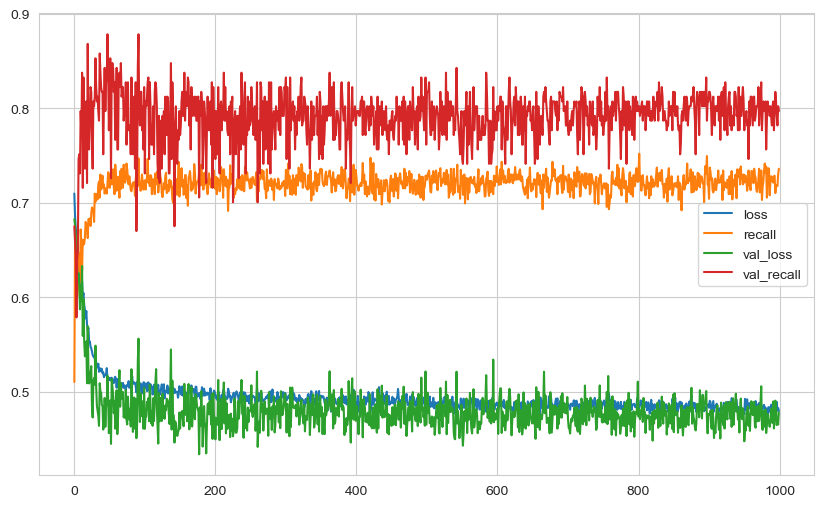

In [149]:
#Plotting the history
loss_df_dro.plot()
plt.show()

In [150]:
#Seeing the evaluation of the model with dropout
dro_model.evaluate(X_test, y_test, verbose=0)

[0.4989120662212372, 0.7352941036224365]

In [151]:
#Seeing the loss and the accuracy of the model with dropout
loss, recall = dro_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4989120662212372
recall:  0.7352941036224365


In [152]:
#Making y_pred 
y_pred = dro_model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[621 175]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.46      0.74      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000



In [153]:
#Seeing the train score and test scores
eval_metric(dro_model, X_train, y_train, X_test, y_test)
#From the scores, we can see that there is no overfitting, but the scores are so good

32/32 [==============================] - 0s 2ms/step
Test_Set
[[621 175]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.46      0.74      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000


Train_Set
[[5816 1351]
 [ 392 1441]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      7167
           1       0.52      0.79      0.62      1833

    accuracy                           0.81      9000
   macro avg       0.73      0.80      0.75      9000
weighted avg       0.85      0.81      0.82      9000



Text(97.72222222222221, 0.5, 'Truth')

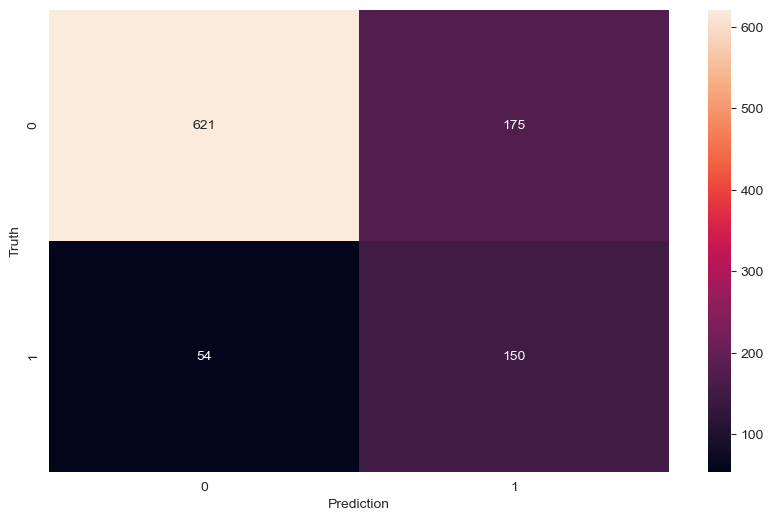

In [154]:
#Seeing the graph of confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

32/32 [==============================] - 0s 2ms/step


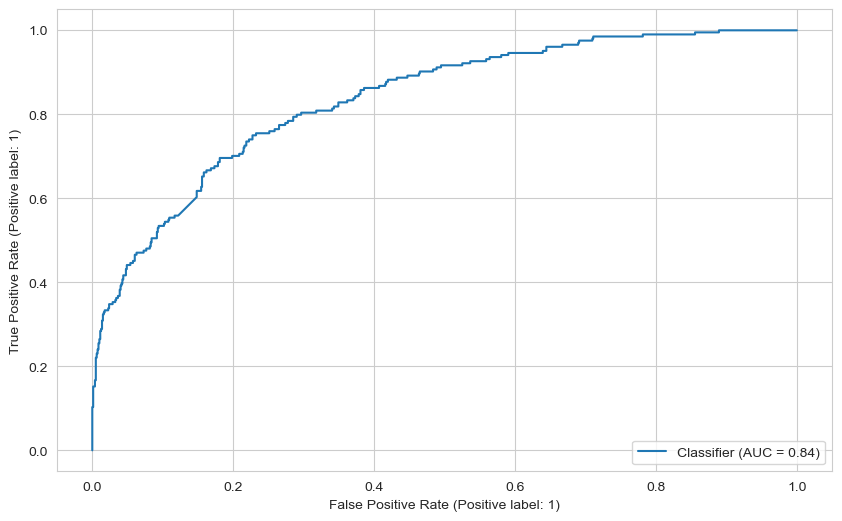

In [155]:
#Seeing the predicted value
y_pred_proba = dro_model.predict(X_test)

#Graphing the predicted values
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [156]:
#The score of the actual to predicted value
roc_auc_score(y_test, y_pred_proba)

0.836230786284363

### Add Early Stop

#### Monitor the "val_loss" as metric

In [157]:
#First, setting the random seed
tf.random.set_seed(seed)

#Creating the weighted model with Sequential
stop_model = Sequential()

#Creating the layers
stop_model.add(Dense(u1, activation='relu', input_dim=X_train.shape[1]))
#Adding the dropout layer
#Note, we only add dropout layer to the hidden layers not the output layer
stop_model.add(Dropout(d))

stop_model.add(Dense(u2, activation='relu')) #Hidden layer
#Adding the dropout layer
stop_model.add(Dropout(d))

stop_model.add(Dense(u3, activation='relu')) #Hidden layer
#Adding the dropout layer
stop_model.add(Dropout(d))

stop_model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Increasing the learning rate
adam = Adam(learning_rate=0.001)

#Compile the layers
stop_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['Recall'])

In [158]:
#Creating earlystopping to stop the model if the value is not changing
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [159]:
#Fitting the model
stop_model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=batch,
    epochs=1000,
    verbose=1,
    class_weight=class_weights,
    callbacks=[early_stop],
)

Epoch 1/1000
203/203 [==============================] - 2s 4ms/step - loss: 0.6983 - recall: 0.4707 - val_loss: 0.6845 - val_recall: 0.8173
Epoch 2/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6816 - recall: 0.6369 - val_loss: 0.6543 - val_recall: 0.6701
Epoch 3/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6691 - recall: 0.6149 - val_loss: 0.6770 - val_recall: 0.8325
Epoch 4/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6621 - recall: 0.6718 - val_loss: 0.6495 - val_recall: 0.7157
Epoch 5/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6556 - recall: 0.6626 - val_loss: 0.6239 - val_recall: 0.6701
Epoch 6/1000
203/203 [==============================] - 1s 2ms/step - loss: 0.6441 - recall: 0.6614 - val_loss: 0.6265 - val_recall: 0.7259
Epoch 7/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6335 - recall: 0.6534 - val_loss: 0.6290 - val_recall: 0.7411
Epoch 8/1000
203/203

203/203 [==============================] - 1s 3ms/step - loss: 0.5095 - recall: 0.7372 - val_loss: 0.4653 - val_recall: 0.8122
Epoch 60/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5115 - recall: 0.7237 - val_loss: 0.4903 - val_recall: 0.8223
Epoch 61/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5185 - recall: 0.7188 - val_loss: 0.5413 - val_recall: 0.8680
Epoch 62/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5156 - recall: 0.7317 - val_loss: 0.4606 - val_recall: 0.8020
Epoch 63/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5173 - recall: 0.7280 - val_loss: 0.4935 - val_recall: 0.8477
Epoch 64/1000
203/203 [==============================] - 0s 2ms/step - loss: 0.5089 - recall: 0.7427 - val_loss: 0.4871 - val_recall: 0.8325
Epoch 65/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.5132 - recall: 0.7421 - val_loss: 0.5023 - val_recall: 0.8223
Epoch 66/1000
203/203 [====

In [160]:
#Seeing the summary of stop_model
stop_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                448       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_19 (Dense)            (None, 1)                

### Evaluate The Model that contains val_loss

In [161]:
#Let's see the history of the model 
stop_model.history.history

{'loss': [0.6982516646385193,
  0.6816456913948059,
  0.6691041588783264,
  0.6621245741844177,
  0.6556324362754822,
  0.6441208720207214,
  0.6335471272468567,
  0.6321901679039001,
  0.624187171459198,
  0.6193642020225525,
  0.6159173846244812,
  0.6112306714057922,
  0.6054198741912842,
  0.6011888980865479,
  0.5953837633132935,
  0.5897135138511658,
  0.5854799747467041,
  0.580268383026123,
  0.5762702226638794,
  0.5683097839355469,
  0.5600221157073975,
  0.5585729479789734,
  0.5622137188911438,
  0.5536254048347473,
  0.5466528534889221,
  0.5554575324058533,
  0.5452089309692383,
  0.5411614775657654,
  0.5398001074790955,
  0.5427616238594055,
  0.5330880880355835,
  0.5356135964393616,
  0.5289472341537476,
  0.5311519503593445,
  0.5227184295654297,
  0.5315329432487488,
  0.5386021733283997,
  0.5318122506141663,
  0.5235987305641174,
  0.5370424389839172,
  0.5233089327812195,
  0.5152850151062012,
  0.5169582366943359,
  0.5259202122688293,
  0.5265598893165588,
  0.

In [162]:
#Creating a dataframe from the history of the model
loss_df_stop = pd.DataFrame(stop_model.history.history)
loss_df_stop.head()

loss  recall  val_loss  val_recall
0 0.698   0.471     0.684       0.817
1 0.682   0.637     0.654       0.670
2 0.669   0.615     0.677       0.832
3 0.662   0.672     0.650       0.716
4 0.656   0.663     0.624       0.670

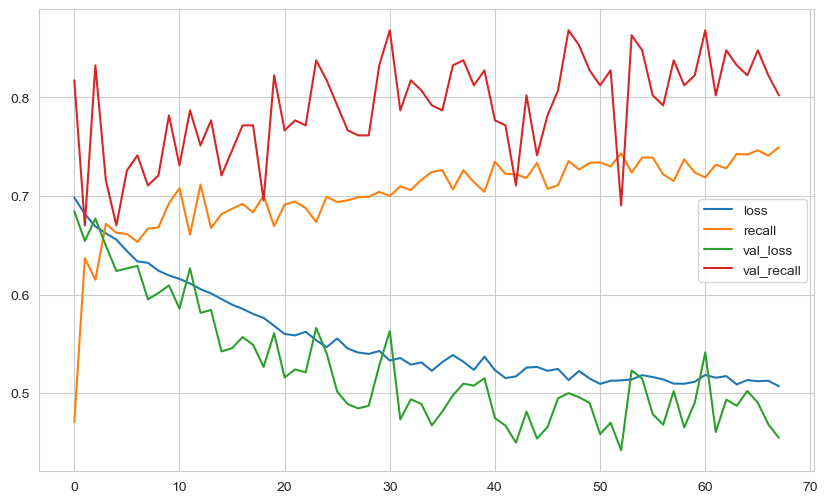

In [163]:
#Plotting the history
loss_df_stop.plot()
plt.show()

In [164]:
#Seeing the evaluation of the model
stop_model.evaluate(X_test, y_test, verbose=0)

[0.46306201815605164, 0.593137264251709]

In [165]:
#Seeing the loss and the accuracy of the model
loss, recall = stop_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.46306201815605164
recall:  0.593137264251709


In [166]:
#Making y_pred 
y_pred = stop_model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[666 130]
 [ 83 121]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       796
           1       0.48      0.59      0.53       204

    accuracy                           0.79      1000
   macro avg       0.69      0.71      0.70      1000
weighted avg       0.81      0.79      0.79      1000



In [167]:
#Seeing the train score and test scores
eval_metric(stop_model, X_train, y_train, X_test, y_test)
#From the scores, we can see that there is no overfitting, but the scores are so good

32/32 [==============================] - 0s 2ms/step
Test_Set
[[666 130]
 [ 83 121]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       796
           1       0.48      0.59      0.53       204

    accuracy                           0.79      1000
   macro avg       0.69      0.71      0.70      1000
weighted avg       0.81      0.79      0.79      1000


Train_Set
[[6228  939]
 [ 582 1251]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7167
           1       0.57      0.68      0.62      1833

    accuracy                           0.83      9000
   macro avg       0.74      0.78      0.76      9000
weighted avg       0.84      0.83      0.84      9000



Text(97.72222222222221, 0.5, 'Truth')

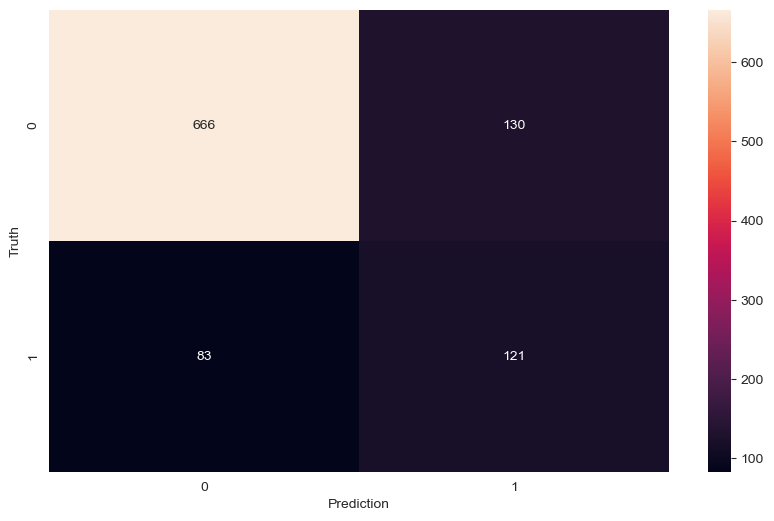

In [168]:
#Seeing the graph of confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

32/32 [==============================] - 0s 2ms/step


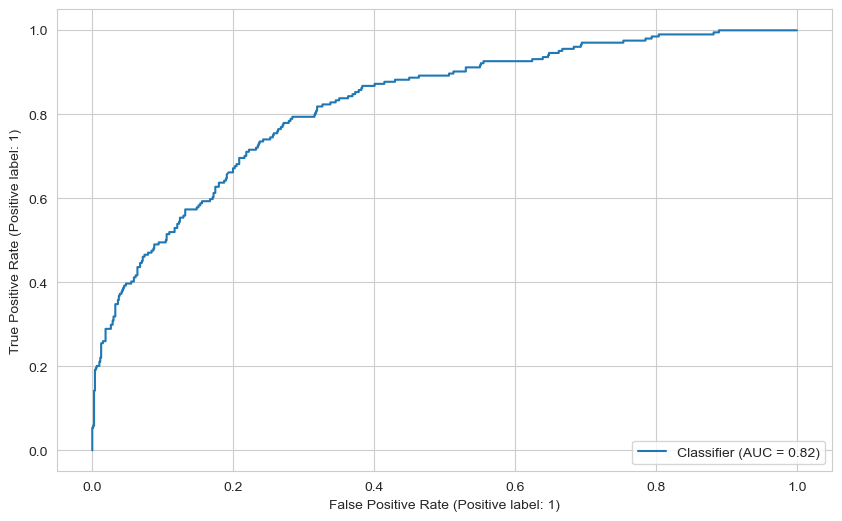

In [169]:
#Seeing the predicted value
y_pred_proba = stop_model.predict(X_test)

#Graphing the predicted values
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [170]:
#The score of the actual to predicted value
roc_auc_score(y_test, y_pred_proba)

0.8236033106710021

#### Monitor the "val_recall" as metric

In [171]:
#First, setting the random seed
tf.random.set_seed(seed)

#Creating the weighted model with Sequential
stop_model2 = Sequential()

#Creating the layers
stop_model2.add(Dense(u1, activation='relu', input_dim=X_train.shape[1]))
#Adding the dropout layer
#Note, we only add dropout layer to the hidden layers not the output layer
stop_model2.add(Dropout(0.3))

stop_model2.add(Dense(u2, activation='relu')) #Hidden layer
#Adding the dropout layer
stop_model2.add(Dropout(0.3))

stop_model2.add(Dense(u3, activation='relu')) #Hidden layer
#Adding the dropout layer
stop_model2.add(Dropout(0.3))

stop_model2.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Increasing the learning rate
adam = Adam(learning_rate=0.001)

#Compile the layers
stop_model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['Recall'])

In [172]:
#Creating the earlystopping
early_stop = EarlyStopping(monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [173]:
#Fitting the model
stop_model2.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=batch,
    epochs=1000,
    verbose=1,
    class_weight=class_weights,
    callbacks=[early_stop],
)

Epoch 1/1000
203/203 [==============================] - 2s 4ms/step - loss: 0.6823 - recall: 0.4267 - val_loss: 0.6635 - val_recall: 0.7513
Epoch 2/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6599 - recall: 0.6363 - val_loss: 0.6316 - val_recall: 0.7462
Epoch 3/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6486 - recall: 0.6381 - val_loss: 0.6487 - val_recall: 0.8173
Epoch 4/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6395 - recall: 0.6443 - val_loss: 0.6099 - val_recall: 0.7259
Epoch 5/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6295 - recall: 0.6479 - val_loss: 0.5830 - val_recall: 0.6701
Epoch 6/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6160 - recall: 0.6589 - val_loss: 0.5914 - val_recall: 0.7462
Epoch 7/1000
203/203 [==============================] - 1s 3ms/step - loss: 0.6078 - recall: 0.6455 - val_loss: 0.6185 - val_recall: 0.8122
Epoch 8/1000
203/203

In [174]:
#Seeing the summary of stop_model2
stop_model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                448       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                

### Evaluate The Model that contains val_recall

In [175]:
#Let's see the history of the model
stop_model2.history.history

{'loss': [0.682323157787323,
  0.6599308848381042,
  0.6486430168151855,
  0.6395453214645386,
  0.6295434832572937,
  0.6159574389457703,
  0.6077733039855957,
  0.5982236266136169,
  0.5869656801223755,
  0.5793998837471008,
  0.5660716891288757,
  0.5606071949005127,
  0.5519137978553772,
  0.5438202619552612,
  0.5370391011238098,
  0.5393238663673401,
  0.5250166058540344,
  0.5212193727493286,
  0.5216090083122253,
  0.5157108902931213],
 'recall': [0.42665037512779236,
  0.6363080739974976,
  0.6381418108940125,
  0.6442542672157288,
  0.6479217410087585,
  0.6589242219924927,
  0.645476758480072,
  0.665036678314209,
  0.669926643371582,
  0.7004889845848083,
  0.7157701849937439,
  0.6821516156196594,
  0.6858190894126892,
  0.6937652826309204,
  0.7072126865386963,
  0.7108802199363708,
  0.6974327564239502,
  0.7145476937294006,
  0.7176039218902588,
  0.7066014409065247],
 'val_loss': [0.6635015606880188,
  0.6316007375717163,
  0.6487227082252502,
  0.609876275062561,
  0.

In [176]:
#Creating a dataframe from the history of the model
loss_df_stop2 = pd.DataFrame(stop_model2.history.history)
loss_df_stop2.head()

loss  recall  val_loss  val_recall
0 0.682   0.427     0.664       0.751
1 0.660   0.636     0.632       0.746
2 0.649   0.638     0.649       0.817
3 0.640   0.644     0.610       0.726
4 0.630   0.648     0.583       0.670

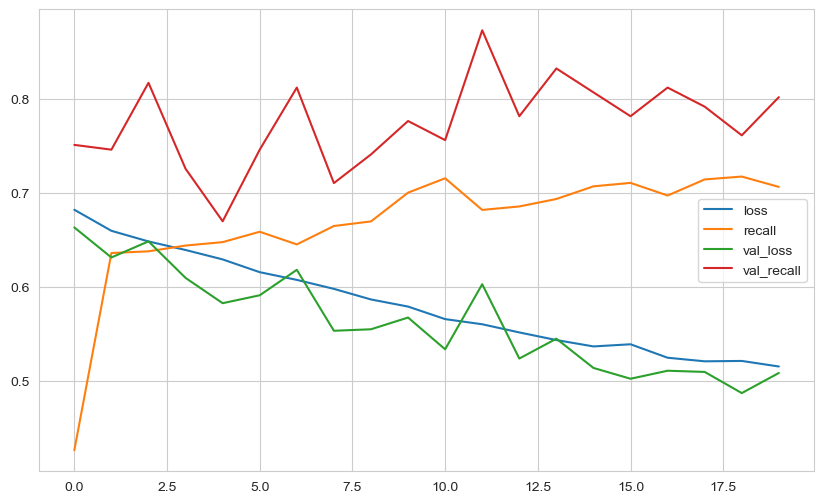

In [177]:
#Plotting the history
loss_df_stop2.plot()
plt.show()

In [178]:
#Seeing the evaluation of the model
stop_model2.evaluate(X_test, y_test, verbose=0)

[0.5933209657669067, 0.6372548937797546]

In [179]:
#Seeing the loss and the accuracy of the model
loss, recall = stop_model2.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5933209657669067
recall:  0.6372548937797546


In [180]:
#Making y_pred 
y_pred = stop_model2.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[577 219]
 [ 74 130]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       796
           1       0.37      0.64      0.47       204

    accuracy                           0.71      1000
   macro avg       0.63      0.68      0.63      1000
weighted avg       0.78      0.71      0.73      1000



In [ ]:
#Seeing the train score and test scores
eval_metric(stop_model2, X_train, y_train, X_test, y_test)
#From the scores, we can see that there is no overfitting, but the scores are so good
#With val_loss, the scores are a bit better than this one

#Seeing the graph of confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#Seeing the predicted value
y_pred_proba = stop_model2.predict(X_test)

#Graphing the predicted values
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

#The score of the actual to predicted value
roc_auc_score(y_test, y_pred_proba)

## Optuna

#Creating the earlystopping for the optuna
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    first_hidden_layer = trial.suggest_int("input_layer_units", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(seed)
    model = Sequential()
    model.add(Dense(first_hidden_layer, input_dim=X_train.shape[1], activation="relu"))

    #Adding the hidden layers
    hidden_layers = trial.suggest_int("hidden_layers", 2, 6)
    for i in range(hidden_layers):
      hidden_layer_units = "hidden_layer_units_" + str(i)
      hidden_layer_units = trial.suggest_int(hidden_layer_units, 8, 128)
      model.add(Dense(hidden_layer_units, activation="relu"))


    #Adding the output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

#Creating the study to see the best params
estudiar = optuna.create_study(direction="maximize")
estudiar.optimize(objective, n_trials=25)
estudiar.best_params

input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    estudiar.best_params["input_layer_units"],
    estudiar.best_params["hidden_layers"],
    estudiar.best_params["optimizer"],
    estudiar.best_params["learning_rate"],
    estudiar.best_params["w0"],
    estudiar.best_params["w1"],
)

hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3 = (
    estudiar.best_params["hidden_layer_units_0"],
    estudiar.best_params["hidden_layer_units_1"],
    estudiar.best_params["hidden_layer_units_2"],
)

hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             ]

tf.random.set_seed(seed)
# creating the model
eop_model = Sequential()
eop_model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
  eop_model.add(Dense(hidden_layer_units[i], activation="relu"))

eop_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
eop_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
eop_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

eop_model.summary()

#### Making some experiences on the other trails to find the best value

#Taking the best values of the params to use it in the model
input_layer_units = 90
hidden_layers = 2
hidden_layer_units = [89, 115]
lr= 0.0006143747878234062
w0 = 0.1788637087778028
w1 = 0.28726535365071604

tf.random.set_seed(seed)
# creating the model
e1_model = Sequential()
e1_model.add(Dense(input_layer_units, activation="relu")) #adding input layer

for i in range(hidden_layers):
  e1_model.add(Dense(hidden_layer_units[i], activation="relu")) #Adding hidden layers

e1_model.add(Dense(1, activation="sigmoid")) #Output layer
adam_op = optimizer(learning_rate=lr)
e1_model.compile(optimizer=adam_op, loss="binary_crossentropy", metrics=["Recall"]) #using recall

# fitting the model
e1_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=500,
    epochs=250,
    callbacks=[early_stop],
    class_weight={0: w0, 1: w1},
    verbose=1,
)

#Seeing the train score and test scores
eval_metric(e1_model, X_train, y_train, X_test, y_test)
#From the scores, we can see that it is not bad but the previos one is better

##### After tring with other params from 24 trail, i can see that there is no big difference, but the first one is better
##### so i am going to complete with it

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Text(97.72222222222221, 0.5, 'Truth')

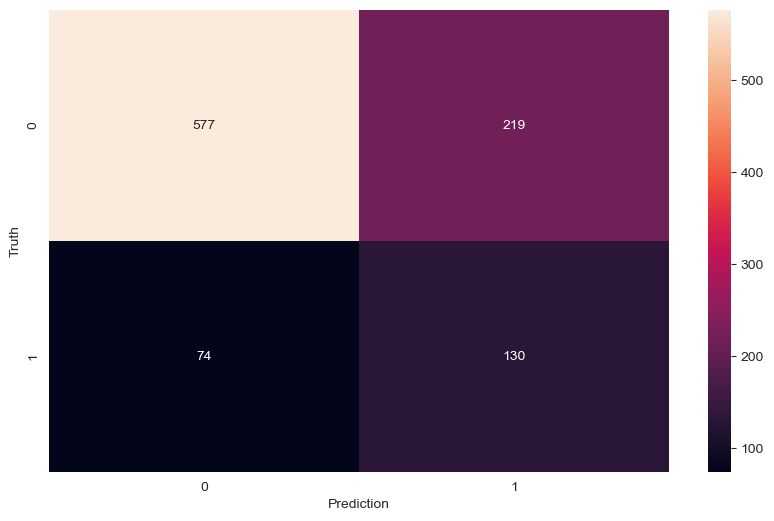

In [182]:
#Seeing the graph of confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

32/32 [==============================] - 0s 2ms/step


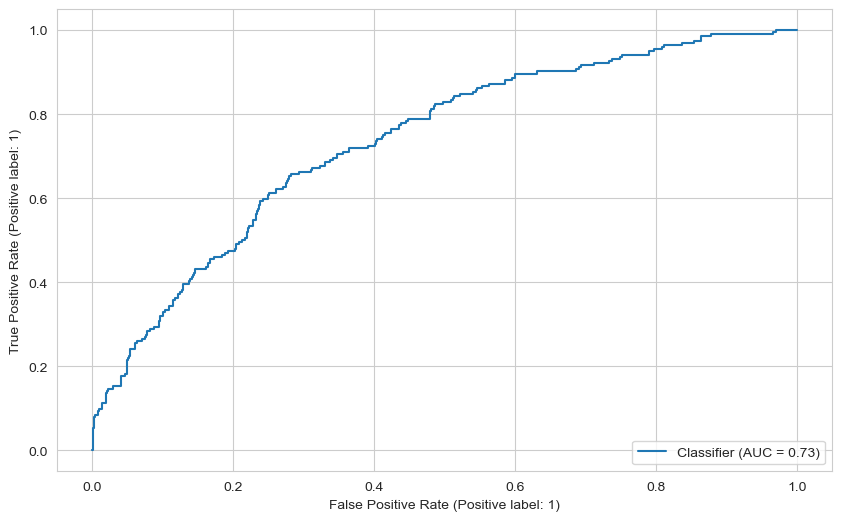

In [183]:
#Seeing the predicted value
y_pred_proba = stop_model2.predict(X_test)

#Graphing the predicted values
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [184]:
#The score of the actual to predicted value
roc_auc_score(y_test, y_pred_proba)

0.7346413439747758

## Optuna

In [185]:
#Creating the earlystopping for the optuna
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [190]:
#Creating the study to see the best params
estudiar = optuna.create_study(direction="maximize")
estudiar.optimize(objective, n_trials=25)
estudiar.best_params

[I 2023-10-30 21:19:10,519] A new study created in memory with name: no-name-69e0d332-490d-43db-b59f-66e2970ee9e7


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 21:19:22,782] Trial 0 finished with value: 0.8479999899864197 and parameters: {'input_layer_units': 90, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0006846506719608844, 'hidden_layers': 3, 'hidden_layer_units_0': 86, 'hidden_layer_units_1': 104, 'hidden_layer_units_2': 62, 'w0': 0.28127331958129254, 'w1': 0.3200511192532264}. Best is trial 0 with value: 0.8479999899864197.
[I 2023-10-30 21:19:55,909] Trial 1 finished with value: 0.7070000171661377 and parameters: {'input_layer_units': 94, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.032688649314161364, 'hidden_layers': 2, 'hidden_layer_units_0': 84, 'hidden_layer_units_1': 22, 'w0': 0.01846828446354249, 'w1': 0.05595040549116888}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-10-30 21:20:14,370] Trial 2 finished with value: 0.8420000076293945 and parameters: {'input_layer_units': 103, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005287011752816014, 'hidden_layers': 6, 'hidden_layer_units_0': 55, 'hidden_layer_units_1': 125, 'hidden_layer_units_2': 108, 'hidden_layer_units_3': 124, 'hidden_layer_units_4': 103, 'hidden_layer_units_5': 93, 'w0': 2.733408966894693, 'w1': 0.5975522361004799}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-10-30 21:20:27,663] Trial 3 finished with value: 0.796999990940094 and parameters: {'input_layer_units': 123, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.09202352072929795, 'hidden_layers': 3, 'hidden_layer_units_0': 82, 'hidden_layer_units_1': 22, 'hidden_layer_units_2': 95, 'w0': 0.5051670004638061, 'w1': 0.37980503783033964}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-10-30 21:20:40,614] Trial 4 finished with value: 0.8399999737739563 and parameters: {'input_layer_units': 31, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04082151593115475, 'hidden_layers': 4, 'hidden_layer_units_0': 25, 'hidden_layer_units_1': 49, 'hidden_layer_units_2': 90, 'hidden_layer_units_3': 67, 'w0': 0.22859252687261153, 'w1': 0.06407436513852185}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 27.
Epoch 42: early stopping


[I 2023-10-30 21:20:58,383] Trial 5 finished with value: 0.7960000038146973 and parameters: {'input_layer_units': 127, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0008204052365333722, 'hidden_layers': 4, 'hidden_layer_units_0': 121, 'hidden_layer_units_1': 43, 'hidden_layer_units_2': 90, 'hidden_layer_units_3': 47, 'w0': 2.8709723622088594, 'w1': 1.8165462452773755}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 16.
Epoch 31: early stopping


[I 2023-10-30 21:21:09,006] Trial 6 finished with value: 0.8479999899864197 and parameters: {'input_layer_units': 48, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.005922487739068961, 'hidden_layers': 2, 'hidden_layer_units_0': 53, 'hidden_layer_units_1': 106, 'w0': 0.1509508098628409, 'w1': 0.10311242300997181}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 21:21:18,365] Trial 7 finished with value: 0.8119999766349792 and parameters: {'input_layer_units': 38, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.07125821812247625, 'hidden_layers': 3, 'hidden_layer_units_0': 48, 'hidden_layer_units_1': 114, 'hidden_layer_units_2': 62, 'w0': 0.021609202576908855, 'w1': 0.0746085937404847}. Best is trial 0 with value: 0.8479999899864197.
[I 2023-10-30 21:21:55,494] Trial 8 finished with value: 0.8069999814033508 and parameters: {'input_layer_units': 108, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.2899585705955705e-05, 'hidden_layers': 3, 'hidden_layer_units_0': 69, 'hidden_layer_units_1': 28, 'hidden_layer_units_2': 21, 'w0': 4.732268661246321, 'w1': 3.2007363128105135}. Best is trial 0 with value: 0.8479999899864197.
[I 2023-10-30 21:22:35,285] Trial 9 finished with value: 0.5440000295639038 and parameters: {'input_layer_units': 30, 'optimizer': <class 'keras.src.optimizer

Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 21:22:43,343] Trial 10 finished with value: 0.20399999618530273 and parameters: {'input_layer_units': 70, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00012579392040271023, 'hidden_layers': 5, 'hidden_layer_units_0': 114, 'hidden_layer_units_1': 83, 'hidden_layer_units_2': 44, 'hidden_layer_units_3': 125, 'hidden_layer_units_4': 14, 'w0': 0.06670763702167583, 'w1': 0.8789400488300818}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-30 21:22:53,006] Trial 11 finished with value: 0.8479999899864197 and parameters: {'input_layer_units': 65, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0032571868106631295, 'hidden_layers': 2, 'hidden_layer_units_0': 99, 'hidden_layer_units_1': 94, 'w0': 0.12316654350488485, 'w1': 0.21071528821038832}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 16.
Epoch 31: early stopping


[I 2023-10-30 21:23:03,419] Trial 12 finished with value: 0.8420000076293945 and parameters: {'input_layer_units': 63, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.005474146221136045, 'hidden_layers': 2, 'hidden_layer_units_0': 18, 'hidden_layer_units_1': 99, 'w0': 0.3666381254041868, 'w1': 0.18477879816579593}. Best is trial 0 with value: 0.8479999899864197.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-10-30 21:23:15,614] Trial 13 finished with value: 0.8519999980926514 and parameters: {'input_layer_units': 80, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.006817952972206362, 'hidden_layers': 3, 'hidden_layer_units_0': 68, 'hidden_layer_units_1': 72, 'hidden_layer_units_2': 47, 'w0': 0.7069589858464446, 'w1': 1.1521093186686666}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 66.
Epoch 81: early stopping


[I 2023-10-30 21:23:45,923] Trial 14 finished with value: 0.8309999704360962 and parameters: {'input_layer_units': 11, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0003118073969980451, 'hidden_layers': 3, 'hidden_layer_units_0': 96, 'hidden_layer_units_1': 72, 'hidden_layer_units_2': 48, 'w0': 0.7183719542678402, 'w1': 1.441605499644085}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-30 21:23:54,284] Trial 15 finished with value: 0.8309999704360962 and parameters: {'input_layer_units': 86, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002919740493373636, 'hidden_layers': 4, 'hidden_layer_units_0': 69, 'hidden_layer_units_1': 67, 'hidden_layer_units_2': 17, 'hidden_layer_units_3': 10, 'w0': 1.0554035022938055, 'w1': 3.136086227838603}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 25.
Epoch 40: early stopping


[I 2023-10-30 21:24:12,352] Trial 16 finished with value: 0.8460000157356262 and parameters: {'input_layer_units': 81, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.014265717341222723, 'hidden_layers': 5, 'hidden_layer_units_0': 100, 'hidden_layer_units_1': 62, 'hidden_layer_units_2': 43, 'hidden_layer_units_3': 88, 'hidden_layer_units_4': 9, 'w0': 1.2182996504795471, 'w1': 0.5826061169214936}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 27.
Epoch 42: early stopping


[I 2023-10-30 21:24:26,666] Trial 17 finished with value: 0.6119999885559082 and parameters: {'input_layer_units': 111, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0014004640704699436, 'hidden_layers': 3, 'hidden_layer_units_0': 38, 'hidden_layer_units_1': 84, 'hidden_layer_units_2': 125, 'w0': 0.30898336766769346, 'w1': 4.913671572974645}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 21:24:36,417] Trial 18 finished with value: 0.6430000066757202 and parameters: {'input_layer_units': 80, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.010833769547638943, 'hidden_layers': 4, 'hidden_layer_units_0': 82, 'hidden_layer_units_1': 123, 'hidden_layer_units_2': 66, 'hidden_layer_units_3': 89, 'w0': 0.11383013805784134, 'w1': 1.2732766124082233}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-10-30 21:24:47,478] Trial 19 finished with value: 0.847000002861023 and parameters: {'input_layer_units': 96, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0016657332014718747, 'hidden_layers': 5, 'hidden_layer_units_0': 68, 'hidden_layer_units_1': 83, 'hidden_layer_units_2': 31, 'hidden_layer_units_3': 10, 'hidden_layer_units_4': 126, 'w0': 0.6033828966499485, 'w1': 0.3200283715236134}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-10-30 21:25:02,350] Trial 20 finished with value: 0.7940000295639038 and parameters: {'input_layer_units': 54, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00019474440120600432, 'hidden_layers': 3, 'hidden_layer_units_0': 113, 'hidden_layer_units_1': 49, 'hidden_layer_units_2': 57, 'w0': 0.2430444237008313, 'w1': 0.7791756537011896}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-10-30 21:25:14,981] Trial 21 finished with value: 0.8479999899864197 and parameters: {'input_layer_units': 49, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.005327308132441453, 'hidden_layers': 2, 'hidden_layer_units_0': 57, 'hidden_layer_units_1': 105, 'w0': 0.15239022477887054, 'w1': 0.10778426110446382}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-30 21:25:24,795] Trial 22 finished with value: 0.7739999890327454 and parameters: {'input_layer_units': 75, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.012893690094541806, 'hidden_layers': 2, 'hidden_layer_units_0': 32, 'hidden_layer_units_1': 111, 'w0': 0.06992527915417227, 'w1': 0.37283261523878347}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 21:25:33,902] Trial 23 finished with value: 0.8399999737739563 and parameters: {'input_layer_units': 54, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001404317038166789, 'hidden_layers': 3, 'hidden_layer_units_0': 62, 'hidden_layer_units_1': 91, 'hidden_layer_units_2': 77, 'w0': 0.31675074306411544, 'w1': 0.12974167594709046}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 36.
Epoch 51: early stopping


[I 2023-10-30 21:25:52,078] Trial 24 finished with value: 0.843999981880188 and parameters: {'input_layer_units': 90, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0006143747878234062, 'hidden_layers': 2, 'hidden_layer_units_0': 89, 'hidden_layer_units_1': 115, 'w0': 0.1788637087778028, 'w1': 0.28726535365071604}. Best is trial 13 with value: 0.8519999980926514.


{'input_layer_units': 80,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.006817952972206362,
 'hidden_layers': 3,
 'hidden_layer_units_0': 68,
 'hidden_layer_units_1': 72,
 'hidden_layer_units_2': 47,
 'w0': 0.7069589858464446,
 'w1': 1.1521093186686666}

In [230]:
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    estudiar.best_params["input_layer_units"],
    estudiar.best_params["hidden_layers"],
    estudiar.best_params["optimizer"],
    estudiar.best_params["learning_rate"],
    estudiar.best_params["w0"],
    estudiar.best_params["w1"],
)

hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3 = (
    estudiar.best_params["hidden_layer_units_0"],
    estudiar.best_params["hidden_layer_units_1"],
    estudiar.best_params["hidden_layer_units_2"],
)

hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             ]

tf.random.set_seed(seed)
# creating the model
eop_model = Sequential()
eop_model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
  eop_model.add(Dense(hidden_layer_units[i], activation="relu"))

eop_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
eop_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
eop_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 1s 21ms/step - loss: 0.5270 - recall: 0.0000e+00 - val_loss: 0.4833 - val_recall: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4752 - recall: 0.0000e+00 - val_loss: 0.4905 - val_recall: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4689 - recall: 0.0550 - val_loss: 0.4650 - val_recall: 0.0558
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4497 - recall: 0.1528 - val_loss: 0.4399 - val_recall: 0.2386
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4425 - recall: 0.2084 - val_loss: 0.4349 - val_recall: 0.4112
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4248 - recall: 0.2610 - val_loss: 0.4024 - val_recall: 0.3503
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4254 - recall: 0.3307 - val_loss: 0.4013 - val_recall: 0.2792
Epoch 8/100
16/16 [=====

In [231]:
eop_model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_415 (Dense)           (None, 80)                1120      
                                                                 
 dense_416 (Dense)           (None, 68)                5508      
                                                                 
 dense_417 (Dense)           (None, 72)                4968      
                                                                 
 dense_418 (Dense)           (None, 47)                3431      
                                                                 
 dense_419 (Dense)           (None, 1)                 48        
                                                                 
Total params: 15075 (58.89 KB)
Trainable params: 15075 (58.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Making some experiences on the other trails to find the best value

In [194]:
#Taking the best values of the params to use it in the model
input_layer_units = 90
hidden_layers = 2
hidden_layer_units = [89, 115]
lr= 0.0006143747878234062
w0 = 0.1788637087778028
w1 = 0.28726535365071604

In [200]:
tf.random.set_seed(seed)
# creating the model
e1_model = Sequential()
e1_model.add(Dense(input_layer_units, activation="relu")) #adding input layer

for i in range(hidden_layers):
  e1_model.add(Dense(hidden_layer_units[i], activation="relu")) #Adding hidden layers

e1_model.add(Dense(1, activation="sigmoid")) #Output layer
adam_op = optimizer(learning_rate=lr)
e1_model.compile(optimizer=adam_op, loss="binary_crossentropy", metrics=["Recall"]) #using recall

# fitting the model
e1_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=500,
    epochs=250,
    callbacks=[early_stop],
    class_weight={0: w0, 1: w1},
    verbose=1,
)

Epoch 1/250
17/17 [==============================] - 1s 19ms/step - loss: 0.1241 - recall: 0.0226 - val_loss: 0.5274 - val_recall: 0.0000e+00
Epoch 2/250
17/17 [==============================] - 0s 5ms/step - loss: 0.1153 - recall: 0.0000e+00 - val_loss: 0.5096 - val_recall: 0.0000e+00
Epoch 3/250
17/17 [==============================] - 0s 5ms/step - loss: 0.1135 - recall: 0.0067 - val_loss: 0.5000 - val_recall: 0.0152
Epoch 4/250
17/17 [==============================] - 0s 5ms/step - loss: 0.1121 - recall: 0.0813 - val_loss: 0.4895 - val_recall: 0.1015
Epoch 5/250
17/17 [==============================] - 0s 5ms/step - loss: 0.1110 - recall: 0.1443 - val_loss: 0.4871 - val_recall: 0.1472
Epoch 6/250
17/17 [==============================] - 0s 5ms/step - loss: 0.1099 - recall: 0.1913 - val_loss: 0.4856 - val_recall: 0.1827
Epoch 7/250
17/17 [==============================] - 0s 6ms/step - loss: 0.1090 - recall: 0.2121 - val_loss: 0.4834 - val_recall: 0.2132
Epoch 8/250
17/17 [=========

In [201]:
#Seeing the train score and test scores
eval_metric(e1_model, X_train, y_train, X_test, y_test)
#From the scores, we can see that it is not bad but the previos one is better

32/32 [==============================] - 0s 1ms/step
Test_Set
[[759  37]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.68      0.39      0.50       204

    accuracy                           0.84      1000
   macro avg       0.77      0.67      0.70      1000
weighted avg       0.82      0.84      0.82      1000


Train_Set
[[6886  281]
 [ 957  876]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7167
           1       0.76      0.48      0.59      1833

    accuracy                           0.86      9000
   macro avg       0.82      0.72      0.75      9000
weighted avg       0.85      0.86      0.85      9000



##### After tring with other params from 24 trail, i can see that there is no big difference, but the first one is better
##### so i am going to complete with it

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [232]:
#Let's see the history of the model
eop_model.history.history

{'loss': [0.526962399482727,
  0.4752391278743744,
  0.46894991397857666,
  0.4497261941432953,
  0.4424624443054199,
  0.42477643489837646,
  0.4253540635108948,
  0.385618656873703,
  0.38368454575538635,
  0.363600492477417,
  0.3570970892906189,
  0.3709403872489929,
  0.3664788603782654,
  0.35955125093460083,
  0.35020723938941956,
  0.351525217294693,
  0.34353166818618774,
  0.3487013578414917,
  0.3372844159603119,
  0.34891873598098755,
  0.33288097381591797,
  0.3389360308647156,
  0.33605268597602844,
  0.33738940954208374,
  0.33317679166793823,
  0.33577460050582886,
  0.32909291982650757,
  0.33441293239593506,
  0.3291279673576355,
  0.3246344029903412,
  0.32315337657928467,
  0.31950801610946655,
  0.3281782567501068,
  0.3171100914478302,
  0.3234381675720215,
  0.3149699568748474,
  0.3167479932308197,
  0.31966397166252136,
  0.3159705698490143,
  0.3092048764228821,
  0.3108501136302948,
  0.31749528646469116,
  0.30786842107772827],
 'recall': [0.0,
  0.0,
  0.05

In [234]:
#Creating a dataframe from the history of the model
loss_df_otuna = pd.DataFrame(eop_model.history.history)
loss_df_otuna.head()

loss  recall  val_loss  val_recall
0 0.527   0.000     0.483       0.000
1 0.475   0.000     0.490       0.000
2 0.469   0.055     0.465       0.056
3 0.450   0.153     0.440       0.239
4 0.442   0.208     0.435       0.411

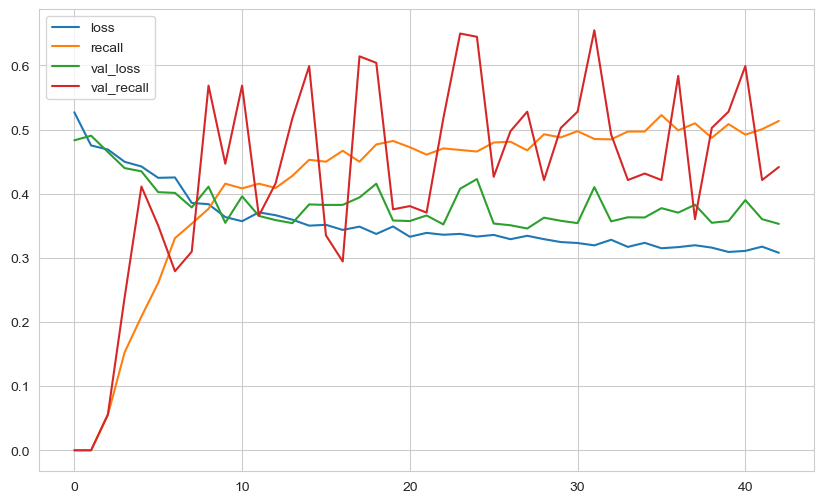

In [235]:
#Plotting the history
loss_df_otuna.plot()
plt.show()

In [236]:
#Seeing the evaluation of the model
eop_model.evaluate(X_test, y_test, verbose=0)

[0.3686048984527588, 0.45588234066963196]

In [237]:
#Seeing the loss and the accuracy of the model
loss, recall = eop_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3686048984527588
recall:  0.45588234066963196


In [238]:
#Making y_pred 
y_pred = otuna_model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[752  44]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       796
           1       0.68      0.46      0.55       204

    accuracy                           0.84      1000
   macro avg       0.78      0.70      0.73      1000
weighted avg       0.83      0.84      0.83      1000



In [239]:
#Seeing the train score and test scores
eval_metric(otuna_model, X_train, y_train, X_test, y_test)

32/32 [==============================] - 0s 2ms/step
Test_Set
[[752  44]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       796
           1       0.68      0.46      0.55       204

    accuracy                           0.84      1000
   macro avg       0.78      0.70      0.73      1000
weighted avg       0.83      0.84      0.83      1000


Train_Set
[[6870  297]
 [ 864  969]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7167
           1       0.77      0.53      0.63      1833

    accuracy                           0.87      9000
   macro avg       0.83      0.74      0.77      9000
weighted avg       0.86      0.87      0.86      9000



32/32 [==============================] - 0s 1ms/step


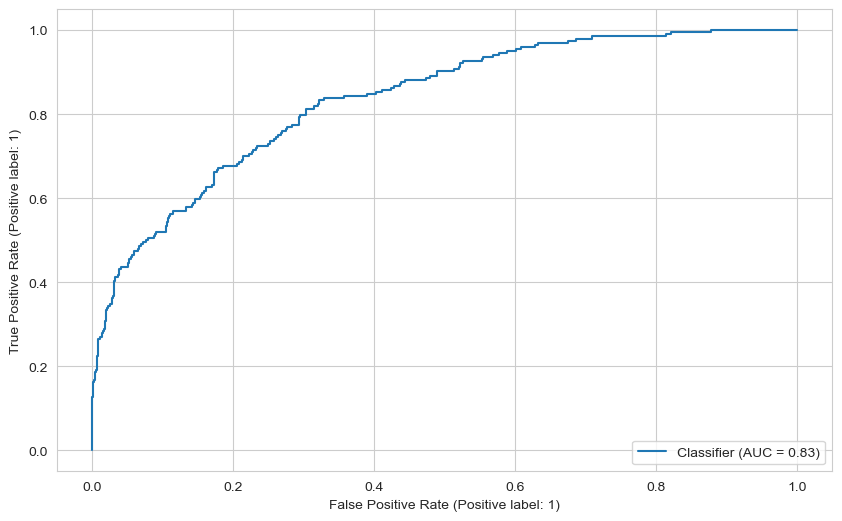

In [240]:
#Seeing the predicted value
y_pred_proba = otuna_model.predict(X_test)

#Graphing the predicted values
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [241]:
#The score of the actual to predicted value
roc_auc_score(y_test, y_pred_proba)

0.8344602916543503

# Final Model and Model Deployment

In [242]:
#Creating the final model with the best scores
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    estudiar.best_params["input_layer_units"],
    estudiar.best_params["hidden_layers"],
    estudiar.best_params["optimizer"],
    estudiar.best_params["learning_rate"],
    estudiar.best_params["w0"],
    estudiar.best_params["w1"],
)


hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3 = (
    estudiar.best_params["hidden_layer_units_0"],
    estudiar.best_params["hidden_layer_units_1"],
    estudiar.best_params["hidden_layer_units_2"],
)

hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             ]

tf.random.set_seed(seed)
# create the model
f_model = Sequential()
f_model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
  f_model.add(Dense(hidden_layer_units[i], activation="relu"))

f_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
f_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
f_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=200,
    callbacks=[early_stop],
    class_weight={0: w0, 1: w1},
    verbose=1,
)

Epoch 1/200
16/16 [==============================] - 1s 16ms/step - loss: 0.4747 - recall: 0.1057 - val_loss: 0.4782 - val_recall: 0.1929
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4435 - recall: 0.2610 - val_loss: 0.4597 - val_recall: 0.1168
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4323 - recall: 0.3172 - val_loss: 0.4552 - val_recall: 0.1675
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4163 - recall: 0.3612 - val_loss: 0.4358 - val_recall: 0.4518
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4020 - recall: 0.3955 - val_loss: 0.4336 - val_recall: 0.4315
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3794 - recall: 0.4523 - val_loss: 0.3780 - val_recall: 0.4264
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3744 - recall: 0.4554 - val_loss: 0.3909 - val_recall: 0.4467
Epoch 8/200
16/16 [=====================

In [243]:
#creating the history of the final model
f_history = f_model.history.history
f_history

{'loss': [0.47473058104515076,
  0.4434526562690735,
  0.43232759833335876,
  0.4163491725921631,
  0.40196493268013,
  0.379353791475296,
  0.37444424629211426,
  0.35165929794311523,
  0.3723191022872925,
  0.3393210768699646,
  0.3375481963157654,
  0.3428439795970917,
  0.3378932774066925,
  0.3353007733821869,
  0.33305999636650085,
  0.32849588990211487,
  0.33164459466934204,
  0.32432791590690613,
  0.32424089312553406,
  0.3261142671108246,
  0.31413301825523376,
  0.3204111158847809,
  0.3172319531440735,
  0.32139483094215393,
  0.3083266615867615,
  0.3188818097114563,
  0.31588509678840637,
  0.31183159351348877,
  0.3103973865509033,
  0.3093952536582947,
  0.3041122555732727,
  0.31148529052734375,
  0.2992969751358032,
  0.30822813510894775,
  0.30440452694892883,
  0.2952204942703247],
 'recall': [0.10574571788311005,
  0.26100245118141174,
  0.31723716855049133,
  0.3612469434738159,
  0.395476758480072,
  0.45232275128364563,
  0.4553789794445038,
  0.481051355600357

In [244]:
#Seeing the train score and test scores
eval_metric(f_model, X_train, y_train, X_test, y_test)

32/32 [==============================] - 0s 1ms/step
Test_Set
[[759  37]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.45      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000


Train_Set
[[6870  297]
 [ 902  931]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7167
           1       0.76      0.51      0.61      1833

    accuracy                           0.87      9000
   macro avg       0.82      0.73      0.76      9000
weighted avg       0.86      0.87      0.86      9000



## Saving Final Model and Scaler

In [245]:
import pickle

pickle.dump(scaler, open("scaler_banco", "wb"))

pickle.dump(one_trans, open('oneHot_banco', 'wb'))

In [246]:
#Saving the model
f_model.save("f_model.h5")

## Loading Model and Scaler


In [247]:
from tensorflow.keras.models import load_model

In [251]:
#Saving oneHotEndcoder
oneHot_banco = pickle.load(open("oneHot_banco", "rb"))
#Saving the scaler
scaler_banco = pickle.load(open("scaler_banco", "rb"))
f_model = load_model("f_model.h5")


## Prediction

In [252]:
#Creating a variable for prediction
banco = df.drop("Exited", axis=1).iloc[0:1, :]
banco

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619    France  Female   42       2    0.000              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1       101348.880

In [254]:
#Seeing the object values of banco
banco.select_dtypes('O')

Geography  Gender
0    France  Female

In [259]:
#Using oneHotEncoder on banco
banco = oneHot_banco.transform(banco)

In [260]:
#Using scaler on banco
banco = scaler_banco.transform(banco)

In [262]:
#Predicting banco value
(f_model.predict(banco) > 0.5).astype("int32")

1/1 [==============================] - 0s 172ms/step


array([[0]])

In [313]:
#Seeing the actual value
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___